# Cervical Cancer Risk Factors

In [ ]:
pip install scikit-learn==1.3.2

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_style("whitegrid")

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, cross_validate, RandomizedSearchCV
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold, SelectPercentile, f_classif, chi2, mutual_info_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.inspection import permutation_importance
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# 1.  Загрузка данных

Признаки:
* **Age**: Возраст пациентки.
* **Number of sexual partners**: Кол-во половых партнёров за всю жизнь.
* **First sexual intercourse**: Возраст первого полового акта.
* **Num of pregnancies**: Кол-во перенесённых беременностей.
* **Smokes**: Курит ли пациентка.
* **Smokes (years)**: Продолжительность курения в годах.
* **Smokes (packs/year)**: Количество выкуриваемых пачек сигарет в год.
* **Hormonal Contraceptives**: Принимает ли пациентка гормональные контрацептивы.
* **Hormonal Contraceptives (years)**: Продолжительность приема гормональных контрацептивов в годах.
* **IUD**: Наличие внутриматочной спирали.
* **IUD (years)**: Продолжительность использования внутриматочной спирали в годах.
* **STDs**: Наличие каких-либо ЗППП.
* **STDs (number)**: Количество ЗППП.
* **STDs:condylomatosis**: ЗППП: кондиломатоз.
* **STDs:cervical condylomatosis**: ЗППП: кондиломатоз шейки матки.
* **STDs:vaginal condylomatosis**: ЗППП: вагинальный кондиломатоз.
* **STDs:vulvo-perineal condylomatosis**: ЗППП: вульво-перинеальный кондиломатоз.
* **STDs:syphilis**: ЗППП: сифилис.
* **STDs:pelvic inflammatory disease**: ЗППП: воспалительные заболевания органов малого таза.
* **STDs:genital herpes**: ЗППП: генитальный герпес.
* **STDs:molluscum contagiosum**: ЗППП: контагиозный моллюск.
* **STDs:AIDS**: ЗППП: СПИД.
* **STDs:HIV**: ЗППП: вирус иммунодефицита человека.
* **STDs:Hepatitis B**: ЗППП: гепатит B.
* **STDs:HPV**: ЗППП: вирус папилломы человека.
* **STDs: Number of diagnosis**: Общее количество поставленных диагнозов ЗППП.
* **STDs: Time since first diagnosis**: Время, прошедшее с момента постановки первого диагноза ЗППП.
* **STDs: Time since last diagnosis**: Время, прошедшее с момента постановки последнего диагноза ЗППП.
* **Dx:Cancer**: Наличие диагноза рака в анамнезе.
* **Dx:CIN**: Наличие дисплазии шейки матки.
* **Dx:HPV**: Наличие диагноза ВПЧ в анамнезе.
* **Dx**: Наличие какого-либо диагноза.

Целевые переменные (наличие рака шейки матки по разным пробам):
* **Hinselmann**: Результат теста Хинзельмана.
* **Schiller**: Результат теста Шиллера.
* **Citology**: Результат цитологии.
* **Biopsy**: Результат биопсии.

##  Загрузка данных

In [ ]:
df = pd.read_csv("risk_factors_cervical_cancer.csv")
display(df.head())

Age Number of sexual partners First sexual intercourse Num of pregnancies  \
0   18                       4.0                     15.0                1.0   
1   15                       1.0                     14.0                1.0   
2   34                       1.0                        ?                1.0   
3   52                       5.0                     16.0                4.0   
4   46                       3.0                     21.0                4.0   

  Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives  \
0    0.0            0.0                 0.0                     0.0   
1    0.0            0.0                 0.0                     0.0   
2    0.0            0.0                 0.0                     0.0   
3    1.0           37.0                37.0                     1.0   
4    0.0            0.0                 0.0                     1.0   

  Hormonal Contraceptives (years)  IUD  ... STDs: Time since first diagnosis  \
0                             0.0  0.0  ...                                ?   
1                             0.0  0.0  ...                                ?   
2                             0.0  0.0  ...                                ?   
3                             3.0  0.0  ...                                ?   
4                            15.0  0.0  ...                                ?   

  STDs: Time since last diagnosis Dx:Cancer Dx:CIN Dx:HPV Dx Hinselmann  \
0                               ?         0      0      0  0          0   
1                               ?         0      0      0  0          0   
2                               ?         0      0      0  0          0   
3                               ?         1      0      1  0          0   
4                               ?         0      0      0  0          0   

  Schiller Citology Biopsy  
0        0        0      0  
1        0        0      0  
2        0        0      0  
3        0        0      0  
4        0        0      0  

[5 rows x 36 columns]

In [ ]:
df[(df['Biopsy'] == 1) | (df['Citology'] == 1) | (df['Hinselmann'] == 1) | (df['Schiller'] == 1)]

Age Number of sexual partners First sexual intercourse  \
6     51                       3.0                     17.0   
22    40                       1.0                     18.0   
23    40                       1.0                     20.0   
34    38                       2.0                     15.0   
41    37                       2.0                     18.0   
..   ...                       ...                      ...   
786   25                       6.0                     17.0   
788   38                       2.0                     19.0   
797   33                       3.0                     19.0   
814   16                       1.0                     12.0   
855   25                       2.0                     17.0   

    Num of pregnancies Smokes Smokes (years) Smokes (packs/year)  \
6                  6.0    1.0           34.0                 3.4   
22                 1.0    0.0            0.0                 0.0   
23                 2.0    0.0            0.0                 0.0   
34                 2.0    0.0            0.0                 0.0   
41                   ?    0.0            0.0                 0.0   
..                 ...    ...            ...                 ...   
786                2.0    0.0            0.0                 0.0   
788                5.0    0.0            0.0                 0.0   
797                3.0    0.0            0.0                 0.0   
814                  ?    0.0            0.0                 0.0   
855                0.0    0.0            0.0                 0.0   

    Hormonal Contraceptives Hormonal Contraceptives (years)  IUD  ...  \
6                       0.0                             0.0  1.0  ...   
22                      1.0                            0.25  0.0  ...   
23                      1.0                            15.0  0.0  ...   
34                      1.0                             0.5  1.0  ...   
41                      0.0                             0.0    ?  ...   
..                      ...                             ...  ...  ...   
786                     1.0                             2.0  0.0  ...   
788                     1.0                            30.0    ?  ...   
797                     1.0                            0.16  1.0  ...   
814                     1.0                            0.42    ?  ...   
855                     1.0                            0.08  0.0  ...   

    STDs: Time since first diagnosis STDs: Time since last diagnosis  \
6                                  ?                               ?   
22                               2.0                             2.0   
23                                 ?                               ?   
34                                 ?                               ?   
41                              15.0                            15.0   
..                               ...                             ...   
786                              4.0                             4.0   
788                                ?                               ?   
797                                ?                               ?   
814                                ?                               ?   
855                                ?                               ?   

    Dx:Cancer Dx:CIN Dx:HPV Dx Hinselmann Schiller Citology Biopsy  
6           0      0      0  0          1        1        0      1  
22          0      0      0  0          0        1        1      1  
23          1      0      1  0          1        1        0      1  
34          0      0      0  0          0        1        0      0  
41          0      1      0  1          0        1        0      1  
..        ...    ...    ... ..        ...      ...      ...    ...  
786         0      0      0  0          0        1        1      1  
788         0      0      0  0          0        0        1      0  
797         1      0      1  1          1        1        0      1  

Вместо 4х целевых переменных создадим одну - Cervical Cancer.

In [ ]:
df['Cervical Cancer'] = np.where((df['Biopsy'] == 1) | (df['Citology'] == 1) | (df['Schiller'] == 1) | (df['Hinselmann'] == 1), 1, 0)

In [ ]:
df[(df['Biopsy'] == 1) | (df['Citology'] == 1) | (df['Hinselmann'] == 1) | (df['Schiller'] == 1)].sample(5)

Age Number of sexual partners First sexual intercourse  \
421   26                       3.0                     15.0   
335   29                       2.0                     18.0   
227   25                       4.0                     15.0   
472   35                       2.0                     17.0   
668   84                       3.0                     20.0   

    Num of pregnancies Smokes Smokes (years) Smokes (packs/year)  \
421                  ?    0.0            0.0                 0.0   
335                4.0    0.0            0.0                 0.0   
227                3.0    1.0            7.0                 0.7   
472                3.0    0.0            0.0                 0.0   
668               11.0    1.0           24.0        0.5132021277   

    Hormonal Contraceptives Hormonal Contraceptives (years)  IUD  ...  \
421                     1.0                            0.33    ?  ...   
335                     0.0                             0.0  0.0  ...   
227                     0.0                             0.0  0.0  ...   
472                     1.0                             1.0  0.0  ...   
668                     0.0                             0.0  0.0  ...   

    STDs: Time since last diagnosis Dx:Cancer Dx:CIN Dx:HPV Dx Hinselmann  \
421                               ?         0      0      0  0          1   
335                               ?         1      0      1  1          0   
227                             5.0         0      0      0  0          0   
472                               ?         0      0      0  0          1   
668                               ?         0      0      0  0          0   

    Schiller Citology Biopsy Cervical Cancer  
421        1        0      1               1  
335        1        1      1               1  
227        1        0      0               1  
472        1        0      1               1  
668        1        0      0               1  

[5 rows x 37 columns]

In [ ]:
df = df.drop(['Hinselmann','Schiller','Citology','Biopsy'], axis=1)
df.sample(5)

Age Number of sexual partners First sexual intercourse  \
725   21                       1.0                     17.0   
466   15                       1.0                     14.0   
673   48                       4.0                     16.0   
159   27                       2.0                     19.0   
809   29                       2.0                     13.0   

    Num of pregnancies Smokes Smokes (years) Smokes (packs/year)  \
725                1.0    0.0            0.0                 0.0   
466                1.0    0.0            0.0                 0.0   
673                4.0    0.0            0.0                 0.0   
159                2.0    0.0            0.0                 0.0   
809                  ?    0.0            0.0                 0.0   

    Hormonal Contraceptives Hormonal Contraceptives (years)  IUD  ...  \
725                     1.0                             5.0  0.0  ...   
466                     0.0                             0.0  0.0  ...   
673                     1.0                            10.0  1.0  ...   
159                     1.0                             7.0  0.0  ...   
809                     0.0                             0.0  1.0  ...   

    STDs:Hepatitis B STDs:HPV STDs: Number of diagnosis  \
725              0.0      0.0                         0   
466              0.0      0.0                         0   
673              0.0      0.0                         0   
159              0.0      0.0                         0   
809              0.0      0.0                         0   

    STDs: Time since first diagnosis STDs: Time since last diagnosis  \
725                                ?                               ?   
466                                ?                               ?   
673                                ?                               ?   
159                                ?                               ?   
809                                ?                               ?   

    Dx:Cancer Dx:CIN Dx:HPV Dx Cervical Cancer  
725         0      0      0  0               0  
466         0      0      0  0               0  
673         0      0      0  0               1  
159         0      0      0  0               0  
809         0      0      0  0               0  

[5 rows x 33 columns]

In [ ]:
df['Cervical Cancer'].value_counts()

Cervical Cancer
0    756
1    102
Name: count, dtype: int64

## Обзор пропусков

In [ ]:
df = df.replace('?', np.nan)

In [ ]:
df.isna().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                      105
STDs:HPV                              105
STDs: Number of diagnosis               0
STDs: Time since first diagnosis      787
STDs: Time since last diagnosis       787
Dx:Cancer                               0
Dx:CIN                                  0
Dx:HPV                                  0
Dx                                      0
Cervical Cancer                         0
dtype: int64

* Time since first/last diagnosis - пропущенные значения заполним 0, т.к. пропуски означают, что диагнозов ЗППП у пациентки не было.
* Пропуски в остальных колонках будем заполнять на основании корреляции признаков.

## Обзор датасэта

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           832 non-null    object
 2   First sexual intercourse            851 non-null    object
 3   Num of pregnancies                  802 non-null    object
 4   Smokes                              845 non-null    object
 5   Smokes (years)                      845 non-null    object
 6   Smokes (packs/year)                 845 non-null    object
 7   Hormonal Contraceptives             750 non-null    object
 8   Hormonal Contraceptives (years)     750 non-null    object
 9   IUD                                 741 non-null    object
 10  IUD (years)                         741 non-null    object
 11  STDs                                753 non-null    object

Типы данных:
* Целочисленные: Age, Number of sexual partners, First sexual intercourse, Num of pregnancies, STDs (number), STDs: Number of diagnosis, STDs: Time since first diagnosis, STDs: Time since last diagnosis
* Вещественные: Smokes (years), Smokes (packs/year), Hormonal Contraceptives (years), IUD (years)
* Категориальные (бинарные): Smokes, Hormonal Contraceptives, IUD, STDs, STDs:condylomatosis, STDs:cervical condylomatosis, STDs:vaginal condylomatosis, STDs:vulvo-perineal condylomatosis, STDs:syphilis, STDs:pelvic inflammatory disease, STDs:genital herpes, STDs:molluscum contagiosum, STDs:AIDS, STDs:HIV, STDs:Hepatitis B, STDs:HPV, Dx:Cancer, Dx:CIN, Dx:HPV, Dx, Cervical Cancer.

In [ ]:
df.to_csv('df.csv', index=False)
df = pd.read_csv('df.csv')
df.shape

(858, 33)

# 2. EDA

In [ ]:
df = pd.read_csv('df.csv')
df.shape

(858, 33)

In [ ]:
df.isna().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                      105
STDs:HPV                              105
STDs: Number of diagnosis               0
STDs: Time since first diagnosis      787
STDs: Time since last diagnosis       787
Dx:Cancer                               0
Dx:CIN                                  0
Dx:HPV                                  0
Dx                                      0
Cervical Cancer                         0
dtype: int64

In [ ]:
num_var = ["Age", "Number of sexual partners", "First sexual intercourse", "Num of pregnancies", "STDs (number)", "STDs: Number of diagnosis", "STDs: Time since first diagnosis", "STDs: Time since last diagnosis", "Smokes (years)", "Smokes (packs/year)", "Hormonal Contraceptives (years)", "IUD (years)"]
cat_var = ["Smokes", "Hormonal Contraceptives", "IUD", "STDs", "STDs:condylomatosis", "STDs:cervical condylomatosis", "STDs:vaginal condylomatosis", "STDs:vulvo-perineal condylomatosis", "STDs:syphilis", "STDs:pelvic inflammatory disease", "STDs:genital herpes", "STDs:molluscum contagiosum", "STDs:AIDS", "STDs:HIV", "STDs:Hepatitis B", "STDs:HPV", "Dx:Cancer", "Dx:CIN", "Dx:HPV", "Dx"]
target = "Cervical Cancer"

In [ ]:
def num_distr(data, var):
  fig, ax = plt.subplots(1, 2, figsize=(12,4))
  sns.histplot(data=data, x=var, kde=True, ax=ax[0])
  sns.boxplot(data=data, x=var, ax=ax[1])
  ax[0].set_title(f"{var} Distribution Histogram")
  ax[1].set_title(f"{var} Distribution Boxplot")
  plt.show()

def cat_distr(data, var):
  if var not in data.columns:
        raise ValueError(f"Столбец '{var}' не найден в DataFrame.")

  counts = data[var].value_counts()
  if counts.empty:
    print(f"Столбец '{var}' пуст или содержит только пропущенные значения.")
    return

  plt.figure(figsize=(12, 6))
  fig, ax = plt.subplots(1, 2, figsize=(12, 6))

  # Круговая диаграмма
  counts.plot(kind='pie', autopct='%1.1f%%', ax=ax[0], startangle=90)
  ax[0].set_title(f'{var} Pie Chart')
  ax[0].set_ylabel('')

  # Столбчатая диаграмма
  sns.countplot(data=data, x=var, ax=ax[1])
  ax[1].set_title(f'{var} Bar Chart')
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')

  for p in ax[1].patches:
      height = p.get_height()
      ax[1].annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                      ha='center', va='bottom', fontsize=11)

  plt.tight_layout()
  plt.show()

## Распределение целевой переменной

<Figure size 1200x600 with 0 Axes>

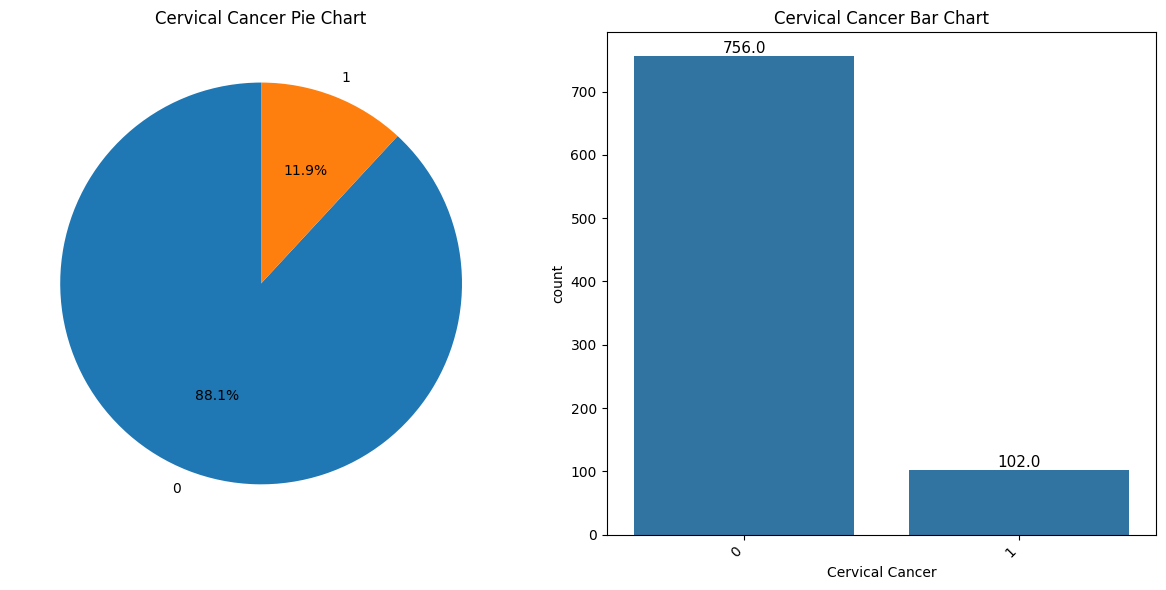

In [ ]:
cat_distr(df, target)

Имеется дисбаланс классов, который следует учесть при подборе и обучении моделей.

## Распределение числовых переменных

### Анализ выбросов и их обработка

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [ ]:
df[num_var].describe()

Age  Number of sexual partners  First sexual intercourse  \
count  858.000000                 832.000000                851.000000   
mean    26.820513                   2.527644                 16.995300   
std      8.497948                   1.667760                  2.803355   
min     13.000000                   1.000000                 10.000000   
25%     20.000000                   2.000000                 15.000000   
50%     25.000000                   2.000000                 17.000000   
75%     32.000000                   3.000000                 18.000000   
max     84.000000                  28.000000                 32.000000   

       Num of pregnancies  STDs (number)  STDs: Number of diagnosis  \
count          802.000000     753.000000                 858.000000   
mean             2.275561       0.176627                   0.087413   
std              1.447414       0.561993                   0.302545   
min              0.000000       0.000000                   0.000000   
25%              1.000000       0.000000                   0.000000   
50%              2.000000       0.000000                   0.000000   
75%              3.000000       0.000000                   0.000000   
max             11.000000       4.000000                   3.000000   

       STDs: Time since first diagnosis  STDs: Time since last diagnosis  \
count                         71.000000                        71.000000   
mean                           6.140845                         5.816901   
std                            5.895024                         5.755271   
min                            1.000000                         1.000000   
25%                            2.000000                         2.000000   
50%                            4.000000                         3.000000   
75%                            8.000000                         7.500000   
max                           22.000000                        22.000000   

       Smokes (years)  Smokes (packs/year)  Hormonal Contraceptives (years)  \
count      845.000000           845.000000                       750.000000   
mean         1.219721             0.453144                         2.256419   
std          4.089017             2.226610                         3.764254   
min          0.000000             0.000000                         0.000000   
25%          0.000000             0.000000                         0.000000   
50%          0.000000             0.000000                         0.500000   
75%          0.000000             0.000000                         3.000000   
max         37.000000            37.000000                        30.000000   

       IUD (years)  
count   741.000000  
mean      0.514804  
std       1.943089  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max      19.000000

Все значения выглядят правдоподобными. Проверим некоторые значения.

In [ ]:
df[df['Number of sexual partners'] > 15]

Age  Number of sexual partners  First sexual intercourse  \
467   16                       28.0                      10.0   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
467                 1.0     1.0             5.0                  5.0   

     Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
467                      0.0                              0.0  0.0  ...   

     STDs:Hepatitis B  STDs:HPV  STDs: Number of diagnosis  \
467               0.0       0.0                          0   

     STDs: Time since first diagnosis  STDs: Time since last diagnosis  \
467                               NaN                              NaN   

     Dx:Cancer  Dx:CIN  Dx:HPV  Dx  Cervical Cancer  
467          0       0       0   0                0  

[1 rows x 33 columns]

...

К сожалению, это может быть правдой.

In [ ]:
df[df['First sexual intercourse'] < 14]

Age  Number of sexual partners  First sexual intercourse  \
90    36                        1.0                      13.0   
96    35                        5.0                      11.0   
111   32                        7.0                      12.0   
115   34                        3.0                      13.0   
131   30                        NaN                      13.0   
142   31                        3.0                      12.0   
147   29                        4.0                      10.0   
202   27                        2.0                      13.0   
223   23                        1.0                      13.0   
249   22                        3.0                      13.0   
290   21                        1.0                      13.0   
353   21                        2.0                      13.0   
355   19                        3.0                      13.0   
372   21                        5.0                      13.0   
410   20                        2.0                      11.0   
423   17                        2.0                      13.0   
467   16                       28.0                      10.0   
468   15                        2.0                      13.0   
480   30                        4.0                      13.0   
544   17                        2.0                      12.0   
554   15                        4.0                      12.0   
615   35                        6.0                      12.0   
652   59                        2.0                      13.0   
672   13                        1.0                      13.0   
677   46                        1.0                      13.0   
702   26                        4.0                      13.0   
735   15                        1.0                      13.0   
746   24                        2.0                      13.0   
750   18                        3.0                      13.0   
767   15                        2.0                      13.0   
773   16                        1.0                      13.0   
806   17                        3.0                      13.0   
809   29                        2.0                      13.0   
810   19                        1.0                      13.0   
814   16                        1.0                      12.0   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
90                  6.0     0.0        0.000000             0.000000   
96                  NaN     1.0       15.000000            15.000000   
111                 2.0     1.0       19.000000             5.700000   
115                 3.0     0.0        0.000000             0.000000   
131                 3.0     1.0       22.000000             3.300000   
142                 3.0     1.0       16.000000            12.000000   
147                 5.0     0.0        0.000000             0.000000   
202                 2.0     1.0        7.000000             1.400000   
223                 2.0     0.0        0.000000             0.000000   
249                 1.0     0.0        0.000000             0.000000   
290                 2.0     1.0       15.000000             0.750000   
353                 2.0     0.0        0.000000             0.000000   
355                 4.0     0.0        0.000000             0.000000   
372                 3.0     1.0        1.266973             0.513202   
410                 3.0     0.0        0.000000             0.000000   
423                 2.0     0.0        0.000000             0.000000   
467                 1.0     1.0        5.000000             5.000000   
468                 1.0     0.0        0.000000             0.000000   
480                 8.0     0.0        0.000000             0.000000   
544                 NaN     0.0        0.000000             0.000000   
554                 1.0     0.0        0.000000             0.000000   
615                 6.0     0.0        0.000000             0.000000   
652     

К сожалению, это тоже может быть правдой.

In [ ]:
df[df['First sexual intercourse'] > 25]

Age  Number of sexual partners  First sexual intercourse  \
7     26                        1.0                      26.0   
10    44                        3.0                      26.0   
19    40                        2.0                      27.0   
29    37                        6.0                      26.0   
75    35                        2.0                      27.0   
80    33                        1.0                      27.0   
89    33                        1.0                      32.0   
93    33                        1.0                      29.0   
128   29                        1.0                      29.0   
138   29                        1.0                      28.0   
211   27                        1.0                      26.0   
312   23                        2.0                      27.0   
487   28                        1.0                      26.0   
492   34                        1.0                      26.0   
500   39                        4.0                      29.0   
563   36                        1.0                      28.0   
585   33                        3.0                      28.0   
607   30                        2.0                      29.0   
676   70                        4.0                      27.0   
681   42                        2.0                      29.0   
777   37                        4.0                      26.0   
824   36                        2.0                      27.0   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
7                   3.0     0.0             0.0                 0.00   
10                  4.0     0.0             0.0                 0.00   
19                  NaN     0.0             0.0                 0.00   
29                  1.0     0.0             0.0                 0.00   
75                  2.0     0.0             0.0                 0.00   
80                  3.0     0.0             0.0                 0.00   
89                  2.0     0.0             0.0                 0.00   
93                  2.0     0.0             0.0                 0.00   
128                 1.0     0.0             0.0                 0.00   
138                 1.0     0.0             0.0                 0.00   
211                 1.0     0.0             0.0                 0.00   
312                 3.0     0.0             0.0                 0.00   
487                 2.0     0.0             0.0                 0.00   
492                 3.0     0.0             0.0                 0.00   
500                 1.0     0.0             0.0                 0.00   
563                 1.0     1.0            16.0                 2.40   
585                 2.0     0.0             0.0                 0.00   
607                 1.0     0.0             0.0                 0.00   
676                 3.0     1.0             3.0                 0.75   
681                 0.0     0.0             0.0                 0.00   
777                 1.0     0.0             0.0                 0.00   
824                 2.0     0.0             0.0                 0.00   

     Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
7                        1.0                             2.00  1.0  ...   
10                       1.0                             2.00  0.0  ...   
19                       0.0                             0.00  1.0  ...   
29                       1.0                             0.25  0.0  ...   
75                       1.0                             1.00  0.0  ...   
80                       1.0                             0.16  0.0  ...   
89                       0.0                             0.00  0.0  ...   
93                       1.0                             0.50  0.0  ...   
128                      0.0                             0.00  0.0  ...   
138                      0.0                             0.00  0.0  ...   
211                      0.

У одного наблюдения возраст меньше, чем возраст первого полового контакта. Это нужно исправить.

In [ ]:
mask = df['Age'] < df['First sexual intercourse']

In [ ]:
df.loc[mask]

Age  Number of sexual partners  First sexual intercourse  \
312   23                        2.0                      27.0   
812   14                        5.0                      16.0   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
312                 3.0     0.0             0.0                  0.0   
812                 NaN     0.0             0.0                  0.0   

     Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
312                      0.0                             0.00  NaN  ...   
812                      1.0                             0.08  0.0  ...   

     STDs:Hepatitis B  STDs:HPV  STDs: Number of diagnosis  \
312               0.0       0.0                          0   
812               0.0       0.0                          0   

     STDs: Time since first diagnosis  STDs: Time since last diagnosis  \
312                               NaN                              NaN   
812                               NaN                              NaN   

     Dx:Cancer  Dx:CIN  Dx:HPV  Dx  Cervical Cancer  
312          0       0       0   0                0  
812          0       0       0   0                0  

[2 rows x 33 columns]

Таких наблюдения два

In [ ]:
df.loc[mask, ['Age', 'First sexual intercourse']] = df.loc[mask, ['First sexual intercourse', 'Age']].values

In [ ]:
df.loc[mask]

Age  Number of sexual partners  First sexual intercourse  \
312   27                        2.0                      23.0   
812   16                        5.0                      14.0   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
312                 3.0     0.0             0.0                  0.0   
812                 NaN     0.0             0.0                  0.0   

     Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
312                      0.0                             0.00  NaN  ...   
812                      1.0                             0.08  0.0  ...   

     STDs:Hepatitis B  STDs:HPV  STDs: Number of diagnosis  \
312               0.0       0.0                          0   
812               0.0       0.0                          0   

     STDs: Time since first diagnosis  STDs: Time since last diagnosis  \
312                               NaN                              NaN   
812                               NaN                              NaN   

     Dx:Cancer  Dx:CIN  Dx:HPV  Dx  Cervical Cancer  
312          0       0       0   0                0  
812          0       0       0   0                0  

[2 rows x 33 columns]

Теперь всё верно

In [ ]:
df[df['Num of pregnancies'] > 8]

Age  Number of sexual partners  First sexual intercourse  \
668   84                        3.0                      20.0   
682   70                        1.0                      16.0   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
668                11.0     1.0            24.0             0.513202   
682                10.0     0.0             0.0             0.000000   

     Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
668                      0.0                              0.0  0.0  ...   
682                      0.0                              0.0  1.0  ...   

     STDs:Hepatitis B  STDs:HPV  STDs: Number of diagnosis  \
668               0.0       0.0                          0   
682               0.0       0.0                          0   

     STDs: Time since first diagnosis  STDs: Time since last diagnosis  \
668                               NaN                              NaN   
682                               NaN                              NaN   

     Dx:Cancer  Dx:CIN  Dx:HPV  Dx  Cervical Cancer  
668          0       0       0   0                1  
682          0       0       0   0                0  

[2 rows x 33 columns]

Вполне правдоподобно

In [ ]:
df[df['STDs (number)'] > 3]

Age  Number of sexual partners  First sexual intercourse  \
407   17                        2.0                      15.0   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
407                 2.0     0.0             0.0                  0.0   

     Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
407                      0.0                              0.0  0.0  ...   

     STDs:Hepatitis B  STDs:HPV  STDs: Number of diagnosis  \
407               0.0       0.0                          3   

     STDs: Time since first diagnosis  STDs: Time since last diagnosis  \
407                               3.0                              1.0   

     Dx:Cancer  Dx:CIN  Dx:HPV  Dx  Cervical Cancer  
407          0       0       0   0                1  

[1 rows x 33 columns]

In [ ]:
df[df['STDs (number)'] > 3].values

array([[17.,  2., 15.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  4.,
         1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  3.,
         3.,  1.,  0.,  0.,  0.,  0.,  1.]])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

У данного наблюдения обнаружены 3 заболевания: кондиломатоз, сифилис, ВИЧ. Но STDs (number) = 4. Возможно, имеется ещё одно заболевание ЗППП, для которого нет признака? Или указание на вид кондиломатоза засчиталось как ещё один диагноз?

In [ ]:
df[df['STDs:condylomatosis'] == 1]['STDs (number)'].value_counts()

STDs (number)
2.0    36
3.0     7
4.0     1
Name: count, dtype: int64

In [ ]:
df[df['STDs:condylomatosis'] == 0]['STDs (number)'].value_counts()

STDs (number)
0.0    674
1.0     34
2.0      1
Name: count, dtype: int64

In [ ]:
df[df['STDs:condylomatosis'] == 1].sample().values

array([[25. ,  4. , 15. ,  3. ,  1. ,  7. ,  0.7,  0. ,  0. ,  0. ,  0. ,
         1. ,  2. ,  1. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  1. ,  5. ,  5. ,  0. ,  0. ,  0. ,  0. ,  1. ]])

In [ ]:
df[df['STDs:condylomatosis'] == 1][['STDs', 'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis',
                                    'STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
                                    'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
                                    'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis', 'Cervical Cancer']]

STDs  STDs (number)  STDs:condylomatosis  STDs:cervical condylomatosis  \
18    1.0            2.0                  1.0                           0.0   
22    1.0            2.0                  1.0                           0.0   
59    1.0            2.0                  1.0                           0.0   
63    1.0            2.0                  1.0                           0.0   
68    1.0            2.0                  1.0                           0.0   
112   1.0            2.0                  1.0                           0.0   
123   1.0            2.0                  1.0                           0.0   
134   1.0            2.0                  1.0                           0.0   
186   1.0            2.0                  1.0                           0.0   
202   1.0            3.0                  1.0                           0.0   
203   1.0            2.0                  1.0                           0.0   
213   1.0            2.0                  1.0                           0.0   
227   1.0            2.0                  1.0                           0.0   
257   1.0            2.0                  1.0                           0.0   
295   1.0            2.0                  1.0                           0.0   
309   1.0            2.0                  1.0                           0.0   
355   1.0            2.0                  1.0                           0.0   
376   1.0            2.0                  1.0                           0.0   
384   1.0            2.0                  1.0                           0.0   
397   1.0            2.0                  1.0                           0.0   
407   1.0            4.0                  1.0                           0.0   
418   1.0            2.0                  1.0                           0.0   
424   1.0            2.0                  1.0                           0.0   
426   1.0            2.0                  1.0                           0.0   
490   1.0            2.0                  1.0                           0.0   
506   1.0            3.0                  1.0                           0.0   
508   1.0            2.0                  1.0                           0.0   
539   1.0            2.0                  1.0                           0.0   
546   1.0            2.0                  1.0                           0.0   
556   1.0            2.0                  1.0                           0.0   
563   1.0            3.0                  1.0                           0.0   
590   1.0            3.0                  1.0                           0.0   
597   1.0            3.0                  1.0                           0.0   
613   1.0            2.0                  1.0                           0.0   
614   1.0            2.0                  1.0                           0.0   
648   1.0            3.0                  1.0                           0.0   
674   1.0            2.0                  1.0                           0.0   
691   1.0            2.0                  1.0                           0.0   
739   1.0            2.0                  1.0                           0.0   
742   1.0            2.0                  1.0                           0.0   
749   1.0            2.0                  1.0                           0.0   
760   1.0            2.0                  1.0                           0.0   
786   1.0            3.0                  1.0                           0.0   
789   1.0            2.0                  1.0                           0.0   

     STDs:vaginal condylomatosis  STDs:vulvo-perineal condylomatosis  \
18                           0.0                                 1.0   
22                           0.0                                 1.0   
59                           0.0                                 1.0   
63                           0.0                                 1.0   
68                           0.0                                 1.0   
112              

Как видим, вид кондиломатоза STDs (number) считает как отдельное заболевание. Нужно это исправить.

In [ ]:
mask = df['STDs:condylomatosis'] == 1
df.loc[mask, 'STDs (number)'] -= 1

In [ ]:
df[df['STDs:condylomatosis'] == 1][['STDs', 'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis',
                                    'STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
                                    'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
                                    'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis', 'Cervical Cancer']]

STDs  STDs (number)  STDs:condylomatosis  STDs:cervical condylomatosis  \
18    1.0            1.0                  1.0                           0.0   
22    1.0            1.0                  1.0                           0.0   
59    1.0            1.0                  1.0                           0.0   
63    1.0            1.0                  1.0                           0.0   
68    1.0            1.0                  1.0                           0.0   
112   1.0            1.0                  1.0                           0.0   
123   1.0            1.0                  1.0                           0.0   
134   1.0            1.0                  1.0                           0.0   
186   1.0            1.0                  1.0                           0.0   
202   1.0            2.0                  1.0                           0.0   
203   1.0            1.0                  1.0                           0.0   
213   1.0            1.0                  1.0                           0.0   
227   1.0            1.0                  1.0                           0.0   
257   1.0            1.0                  1.0                           0.0   
295   1.0            1.0                  1.0                           0.0   
309   1.0            1.0                  1.0                           0.0   
355   1.0            1.0                  1.0                           0.0   
376   1.0            1.0                  1.0                           0.0   
384   1.0            1.0                  1.0                           0.0   
397   1.0            1.0                  1.0                           0.0   
407   1.0            3.0                  1.0                           0.0   
418   1.0            1.0                  1.0                           0.0   
424   1.0            1.0                  1.0                           0.0   
426   1.0            1.0                  1.0                           0.0   
490   1.0            1.0                  1.0                           0.0   
506   1.0            2.0                  1.0                           0.0   
508   1.0            1.0                  1.0                           0.0   
539   1.0            1.0                  1.0                           0.0   
546   1.0            1.0                  1.0                           0.0   
556   1.0            1.0                  1.0                           0.0   
563   1.0            2.0                  1.0                           0.0   
590   1.0            2.0                  1.0                           0.0   
597   1.0            2.0                  1.0                           0.0   
613   1.0            1.0                  1.0                           0.0   
614   1.0            1.0                  1.0                           0.0   
648   1.0            2.0                  1.0                           0.0   
674   1.0            1.0                  1.0                           0.0   
691   1.0            1.0                  1.0                           0.0   
739   1.0            1.0                  1.0                           0.0   
742   1.0            1.0                  1.0                           0.0   
749   1.0            1.0                  1.0                           0.0   
760   1.0            1.0                  1.0                           0.0   
786   1.0            2.0                  1.0                           0.0   
789   1.0            1.0                  1.0                           0.0   

     STDs:vaginal condylomatosis  STDs:vulvo-perineal condylomatosis  \
18                           0.0                                 1.0   
22                           0.0                                 1.0   
59                           0.0                                 1.0   
63                           0.0                                 1.0   
68                           0.0                                 1.0   
112              

Исправлено

In [ ]:
df[df['STDs: Number of diagnosis'] == 0][['STDs', 'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis',
                                    'STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
                                    'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
                                    'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis', 'Cervical Cancer']]

STDs  STDs (number)  STDs:condylomatosis  STDs:cervical condylomatosis  \
0     0.0            0.0                  0.0                           0.0   
1     0.0            0.0                  0.0                           0.0   
2     0.0            0.0                  0.0                           0.0   
3     0.0            0.0                  0.0                           0.0   
4     0.0            0.0                  0.0                           0.0   
..    ...            ...                  ...                           ...   
853   0.0            0.0                  0.0                           0.0   
854   0.0            0.0                  0.0                           0.0   
855   0.0            0.0                  0.0                           0.0   
856   0.0            0.0                  0.0                           0.0   
857   0.0            0.0                  0.0                           0.0   

     STDs:vaginal condylomatosis  STDs:vulvo-perineal condylomatosis  \
0                            0.0                                 0.0   
1                            0.0                                 0.0   
2                            0.0                                 0.0   
3                            0.0                                 0.0   
4                            0.0                                 0.0   
..                           ...                                 ...   
853                          0.0                                 0.0   
854                          0.0                                 0.0   
855                          0.0                                 0.0   
856                          0.0                                 0.0   
857                          0.0                                 0.0   

     STDs:syphilis  STDs:pelvic inflammatory disease  STDs:genital herpes  \
0              0.0                               0.0                  0.0   
1              0.0                               0.0                  0.0   
2              0.0                               0.0                  0.0   
3              0.0                               0.0                  0.0   
4              0.0                               0.0                  0.0   
..             ...                               ...                  ...   
853            0.0                               0.0                  0.0   
854            0.0                               0.0                  0.0   
855            0.0                               0.0                  0.0   
856            0.0                               0.0                  0.0   
857            0.0                               0.0                  0.0   

     STDs:molluscum contagiosum  STDs:AIDS  STDs:HIV  STDs:Hepatitis B  \
0                           0.0        0.0       0.0               0.0   
1                           0.0        0.0       0.0               0.0   
2                           0.0        0.0       0.0               0.0   
3                           0.0        0.0       0.0               0.0   
4                           0.0        0.0       0.0               0.0   
..                          ...        ...       ...               ...   
853                         0.0        0.0       0.0               0.0   
854                         0.0        0.0       0.0               0.0   
855                         0.0        0.0       0.0               0.0   
856                         0.0        0.0       0.0               0.0   
857                         0.0        0.0       0.0               0.0   

     STDs:HPV  STDs: Number of diagnosis  Cervical Cancer  
0         0.0                          0                0  
1         0.0                          0                0  
2         0.0                          0                0  
3         0.0                          0                0  
4         0.0                          0                0  
..        ...    

In [ ]:
df[(df['STDs: Number of diagnosis'] == 0) & df[('STDs')] == 1][['STDs', 'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis',
                                    'STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
                                    'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
                                    'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis', 'STDs: Time since first diagnosis', 'STDs: Time since first diagnosis','Cervical Cancer']]

STDs  STDs (number)  STDs:condylomatosis  STDs:cervical condylomatosis  \
18    1.0            1.0                  1.0                           0.0   
32    1.0            1.0                  0.0                           0.0   
63    1.0            1.0                  1.0                           0.0   
257   1.0            1.0                  1.0                           0.0   
455   1.0            1.0                  0.0                           0.0   
480   1.0            1.0                  0.0                           0.0   
546   1.0            1.0                  1.0                           0.0   
849   1.0            1.0                  0.0                           0.0   

     STDs:vaginal condylomatosis  STDs:vulvo-perineal condylomatosis  \
18                           0.0                                 1.0   
32                           0.0                                 0.0   
63                           0.0                                 1.0   
257                          0.0                                 1.0   
455                          0.0                                 0.0   
480                          0.0                                 0.0   
546                          0.0                                 1.0   
849                          0.0                                 0.0   

     STDs:syphilis  STDs:pelvic inflammatory disease  STDs:genital herpes  \
18             0.0                               0.0                  0.0   
32             1.0                               0.0                  0.0   
63             0.0                               0.0                  0.0   
257            0.0                               0.0                  0.0   
455            1.0                               0.0                  0.0   
480            1.0                               0.0                  0.0   
546            0.0                               0.0                  0.0   
849            0.0                               0.0                  0.0   

     STDs:molluscum contagiosum  STDs:AIDS  STDs:HIV  STDs:Hepatitis B  \
18                          0.0        0.0       0.0               0.0   
32                          0.0        0.0       0.0               0.0   
63                          0.0        0.0       0.0               0.0   
257                         0.0        0.0       0.0               0.0   
455                         0.0        0.0       0.0               0.0   
480                         0.0        0.0       0.0               0.0   
546                         0.0        0.0       0.0               0.0   
849                         0.0        0.0       0.0               0.0   

     STDs:HPV  STDs: Number of diagnosis  STDs: Time since first diagnosis  \
18        0.0                          0                               NaN   
32        0.0                          0                               NaN   
63        0.0                          0                               NaN   
257       0.0                          0                               NaN   
455       0.0                          0                               NaN   
480       0.0                          0                               NaN   
546       0.0                          0                               NaN   
849       1.0                          0                               NaN   

     STDs: Time since first diagnosis  Cervical Cancer  
18                                NaN                0  
32                                NaN                0  
63                                NaN                0  
257                               NaN                1  
455                               NaN                0  
480                               NaN                0  
546                               NaN                0  
849                               NaN                0

Можем видеть, что есть наблюдения, в которых имеются заболевания ЗППП, но STDs:Number of diagnoses = 0. Нужно это исправить.

In [ ]:
mask = (df['STDs'] == 1) & (df['STDs: Number of diagnosis'] == 0)
df.loc[mask, 'STDs: Number of diagnosis'] = 1

In [ ]:
df[(df['STDs: Number of diagnosis'] == 0) & df[('STDs')] == 1]

Empty DataFrame
Columns: [Age, Number of sexual partners, First sexual intercourse, Num of pregnancies, Smokes, Smokes (years), Smokes (packs/year), Hormonal Contraceptives, Hormonal Contraceptives (years), IUD, IUD (years), STDs, STDs (number), STDs:condylomatosis, STDs:cervical condylomatosis, STDs:vaginal condylomatosis, STDs:vulvo-perineal condylomatosis, STDs:syphilis, STDs:pelvic inflammatory disease, STDs:genital herpes, STDs:molluscum contagiosum, STDs:AIDS, STDs:HIV, STDs:Hepatitis B, STDs:HPV, STDs: Number of diagnosis, STDs: Time since first diagnosis, STDs: Time since last diagnosis, Dx:Cancer, Dx:CIN, Dx:HPV, Dx, Cervical Cancer]
Index: []

[0 rows x 33 columns]

Исправлено

In [ ]:
df[df['STDs: Time since first diagnosis'] > 18]

Age  Number of sexual partners  First sexual intercourse  \
21    41                        3.0                      17.0   
59    35                        3.0                      17.0   
376   41                        3.0                      19.0   
394   20                        2.0                      18.0   
648   18                        2.0                      16.0   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
21                  4.0     0.0             0.0                  0.0   
59                  4.0     0.0             0.0                  0.0   
376                 2.0     0.0             0.0                  0.0   
394                 1.0     1.0            13.0                  7.0   
648                 1.0     NaN             NaN                  NaN   

     Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
21                       1.0                             10.0  0.0  ...   
59                       1.0                              7.0  1.0  ...   
376                      1.0                              4.0  1.0  ...   
394                      0.0                              0.0  0.0  ...   
648                      0.0                              0.0  0.0  ...   

     STDs:Hepatitis B  STDs:HPV  STDs: Number of diagnosis  \
21                0.0       0.0                          1   
59                0.0       0.0                          1   
376               0.0       0.0                          1   
394               1.0       0.0                          1   
648               0.0       0.0                          2   

     STDs: Time since first diagnosis  STDs: Time since last diagnosis  \
21                               21.0                             21.0   
59                               19.0                             19.0   
376                              22.0                             22.0   
394                              21.0                             21.0   
648                              19.0                              1.0   

     Dx:Cancer  Dx:CIN  Dx:HPV  Dx  Cervical Cancer  
21           0       0       0   0                0  
59           0       0       0   0                0  
376          0       0       0   0                0  
394          0       0       0   0                0  
648          0       0       0   0                0  

[5 rows x 33 columns]

In [ ]:
df[df['STDs: Time since last diagnosis'] > 18]

Age  Number of sexual partners  First sexual intercourse  \
21    41                        3.0                      17.0   
59    35                        3.0                      17.0   
376   41                        3.0                      19.0   
394   20                        2.0                      18.0   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
21                  4.0     0.0             0.0                  0.0   
59                  4.0     0.0             0.0                  0.0   
376                 2.0     0.0             0.0                  0.0   
394                 1.0     1.0            13.0                  7.0   

     Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
21                       1.0                             10.0  0.0  ...   
59                       1.0                              7.0  1.0  ...   
376                      1.0                              4.0  1.0  ...   
394                      0.0                              0.0  0.0  ...   

     STDs:Hepatitis B  STDs:HPV  STDs: Number of diagnosis  \
21                0.0       0.0                          1   
59                0.0       0.0                          1   
376               0.0       0.0                          1   
394               1.0       0.0                          1   

     STDs: Time since first diagnosis  STDs: Time since last diagnosis  \
21                               21.0                             21.0   
59                               19.0                             19.0   
376                              22.0                             22.0   
394                              21.0                             21.0   

     Dx:Cancer  Dx:CIN  Dx:HPV  Dx  Cervical Cancer  
21           0       0       0   0                0  
59           0       0       0   0                0  
376          0       0       0   0                0  
394          0       0       0   0                0  

[4 rows x 33 columns]

Все цифры правдоподобны, учитывая то, что ВИЧ и гепатит Б могут передаваться при родах.

In [ ]:
df[df['Smokes (years)'] > 21]

Age  Number of sexual partners  First sexual intercourse  \
3     52                        5.0                      16.0   
6     51                        3.0                      17.0   
131   30                        NaN                      13.0   
337   48                        2.0                      16.0   
662   28                        3.0                      16.0   
668   84                        3.0                      20.0   
774   43                        4.0                      16.0   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
3                   4.0     1.0            37.0            37.000000   
6                   6.0     1.0            34.0             3.400000   
131                 3.0     1.0            22.0             3.300000   
337                 7.0     1.0            32.0             8.000000   
662                 5.0     1.0            22.0            22.000000   
668                11.0     1.0            24.0             0.513202   
774                 3.0     1.0            28.0             7.000000   

     Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
3                        1.0                             3.00  0.0  ...   
6                        0.0                             0.00  1.0  ...   
131                      0.0                             0.00  0.0  ...   
337                      1.0                             7.00  0.0  ...   
662                      1.0                             0.25  0.0  ...   
668                      0.0                             0.00  0.0  ...   
774                      0.0                             0.00  1.0  ...   

     STDs:Hepatitis B  STDs:HPV  STDs: Number of diagnosis  \
3                 0.0       0.0                          0   
6                 0.0       0.0                          0   
131               0.0       0.0                          1   
337               0.0       0.0                          0   
662               0.0       0.0                          0   
668               0.0       0.0                          0   
774               0.0       0.0                          0   

     STDs: Time since first diagnosis  STDs: Time since last diagnosis  \
3                                 NaN                              NaN   
6                                 NaN                              NaN   
131                               3.0                              3.0   
337                               NaN                              NaN   
662                               NaN                              NaN   
668                               NaN                              NaN   
774                               NaN                              NaN   

     Dx:Cancer  Dx:CIN  Dx:HPV  Dx  Cervical Cancer  
3            1       0       1   0                0  
6            0       0       0   0                1  
131          0       0       0   0                1  
337          0       0       0   0                0  
662          0       0       0   0                0  
668          0       0       0   0                1  
774          0       0       0   0                0  

[7 rows x 33 columns]

Некоторые курят с 15ти лет - вполне может быть

Можно ли курить с 6-8 лет? Скорее всего нет

In [ ]:
mask = (df['Smokes (years)'] == 22)
df.loc[mask, 'Smokes (years)'] = 13

In [ ]:
df[df['Smokes (years)'] > 21]

Age  Number of sexual partners  First sexual intercourse  \
3     52                        5.0                      16.0   
6     51                        3.0                      17.0   
337   48                        2.0                      16.0   
668   84                        3.0                      20.0   
774   43                        4.0                      16.0   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
3                   4.0     1.0            37.0            37.000000   
6                   6.0     1.0            34.0             3.400000   
337                 7.0     1.0            32.0             8.000000   
668                11.0     1.0            24.0             0.513202   
774                 3.0     1.0            28.0             7.000000   

     Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
3                        1.0                              3.0  0.0  ...   
6                        0.0                              0.0  1.0  ...   
337                      1.0                              7.0  0.0  ...   
668                      0.0                              0.0  0.0  ...   
774                      0.0                              0.0  1.0  ...   

     STDs:Hepatitis B  STDs:HPV  STDs: Number of diagnosis  \
3                 0.0       0.0                          0   
6                 0.0       0.0                          0   
337               0.0       0.0                          0   
668               0.0       0.0                          0   
774               0.0       0.0                          0   

     STDs: Time since first diagnosis  STDs: Time since last diagnosis  \
3                                 NaN                              NaN   
6                                 NaN                              NaN   
337                               NaN                              NaN   
668                               NaN                              NaN   
774                               NaN                              NaN   

     Dx:Cancer  Dx:CIN  Dx:HPV  Dx  Cervical Cancer  
3            1       0       1   0                0  
6            0       0       0   0                1  
337          0       0       0   0                0  
668          0       0       0   0                1  
774          0       0       0   0                0  

[5 rows x 33 columns]

Исправлено

In [ ]:
df[df['Smokes (packs/year)'] > 15]

Age  Number of sexual partners  First sexual intercourse  \
3     52                        5.0                      16.0   
61    35                        3.0                      20.0   
67    36                        4.0                      19.0   
662   28                        3.0                      16.0   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
3                   4.0     1.0            37.0                 37.0   
61                  5.0     1.0            19.0                 19.0   
67                  2.0     1.0            21.0                 21.0   
662                 5.0     1.0            13.0                 22.0   

     Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
3                        1.0                             3.00  0.0  ...   
61                       1.0                             4.00  0.0  ...   
67                       0.0                             0.00  1.0  ...   
662                      1.0                             0.25  0.0  ...   

     STDs:Hepatitis B  STDs:HPV  STDs: Number of diagnosis  \
3                 0.0       0.0                          0   
61                0.0       0.0                          0   
67                0.0       0.0                          0   
662               0.0       0.0                          0   

     STDs: Time since first diagnosis  STDs: Time since last diagnosis  \
3                                 NaN                              NaN   
61                                NaN                              NaN   
67                                NaN                              NaN   
662                               NaN                              NaN   

     Dx:Cancer  Dx:CIN  Dx:HPV  Dx  Cervical Cancer  
3            1       0       1   0                0  
61           0       0       0   0                0  
67           0       0       0   0                0  
662          0       0       0   0                0  

[4 rows x 33 columns]

37 пачек в год - это 3.08 пачки (61.67 сигареты) в месяц - 2 сигареты в день - вполне реальная цифра.

In [ ]:
df[df['Hormonal Contraceptives (years)'] > 19]

Age  Number of sexual partners  First sexual intercourse  \
30    41                        3.0                      17.0   
615   35                        6.0                      12.0   
628   41                        2.0                      15.0   
670   47                        2.0                      17.0   
730   40                        3.0                      17.0   
788   38                        2.0                      19.0   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
30                  3.0     0.0             0.0                  0.0   
615                 6.0     0.0             0.0                  0.0   
628                 6.0     0.0             0.0                  0.0   
670                 3.0     0.0             0.0                  0.0   
730                 2.0     0.0             0.0                  0.0   
788                 5.0     0.0             0.0                  0.0   

     Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
30                       1.0                             22.0  1.0  ...   
615                      1.0                             20.0  0.0  ...   
628                      1.0                             20.0  0.0  ...   
670                      1.0                             20.0  0.0  ...   
730                      1.0                             20.0  1.0  ...   
788                      1.0                             30.0  NaN  ...   

     STDs:Hepatitis B  STDs:HPV  STDs: Number of diagnosis  \
30                0.0       0.0                          0   
615               0.0       0.0                          0   
628               0.0       0.0                          0   
670               0.0       0.0                          0   
730               0.0       0.0                          0   
788               NaN       NaN                          0   

     STDs: Time since first diagnosis  STDs: Time since last diagnosis  \
30                                NaN                              NaN   
615                               NaN                              NaN   
628                               NaN                              NaN   
670                               NaN                              NaN   
730                               NaN                              NaN   
788                               NaN                              NaN   

     Dx:Cancer  Dx:CIN  Dx:HPV  Dx  Cervical Cancer  
30           0       0       0   0                0  
615          0       0       0   0                0  
628          0       0       0   0                0  
670          0       0       0   0                1  
730          0       0       0   0                0  
788          0       0       0   0                1  

[6 rows x 33 columns]

Нельзя пить гормональные контрацептивы с 8ми лет

In [ ]:
mask = (df['Hormonal Contraceptives (years)'] == 30)
df.loc[mask, 'Hormonal Contraceptives (years)'] = 3

In [ ]:
df[df['Hormonal Contraceptives (years)'] > 19]

Age  Number of sexual partners  First sexual intercourse  \
30    41                        3.0                      17.0   
615   35                        6.0                      12.0   
628   41                        2.0                      15.0   
670   47                        2.0                      17.0   
730   40                        3.0                      17.0   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
30                  3.0     0.0             0.0                  0.0   
615                 6.0     0.0             0.0                  0.0   
628                 6.0     0.0             0.0                  0.0   
670                 3.0     0.0             0.0                  0.0   
730                 2.0     0.0             0.0                  0.0   

     Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
30                       1.0                             22.0  1.0  ...   
615                      1.0                             20.0  0.0  ...   
628                      1.0                             20.0  0.0  ...   
670                      1.0                             20.0  0.0  ...   
730                      1.0                             20.0  1.0  ...   

     STDs:HPV  STDs: Number of diagnosis  STDs: Time since first diagnosis  \
30        0.0                          0                               0.0   
615       0.0                          0                               0.0   
628       0.0                          0                               0.0   
670       0.0                          0                               0.0   
730       0.0                          0                               0.0   

     STDs: Time since last diagnosis  Dx:Cancer  Dx:CIN  Dx:HPV  Dx  \
30                               0.0          0       0       0   0   
615                              0.0          0       0       0   0   
628                              0.0          0       0       0   0   
670                              0.0          0       0       0   0   
730                              0.0          0       0       0   0   

     Cervical Cancer  IUD_missing  
30                 0            0  
615                0            0  
628                0            0  
670                1            0  
730                0            0  

[5 rows x 34 columns]

Исправлено

In [ ]:
df[df['IUD (years)'] > 11]

Age  Number of sexual partners  First sexual intercourse  \
34    38                        2.0                      15.0   
48    41                        2.0                      17.0   
115   34                        3.0                      13.0   
139   30                        2.0                      14.0   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
34                  2.0     0.0             0.0                  0.0   
48                  4.0     0.0             0.0                  0.0   
115                 3.0     0.0             0.0                  0.0   
139                 3.0     0.0             0.0                  0.0   

     Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
34                       1.0                              0.5  1.0  ...   
48                       0.0                              0.0  1.0  ...   
115                      0.0                              0.0  1.0  ...   
139                      1.0                              0.5  1.0  ...   

     STDs:Hepatitis B  STDs:HPV  STDs: Number of diagnosis  \
34                0.0       0.0                          0   
48                0.0       0.0                          0   
115               0.0       0.0                          0   
139               0.0       0.0                          0   

     STDs: Time since first diagnosis  STDs: Time since last diagnosis  \
34                                NaN                              NaN   
48                                NaN                              NaN   
115                               NaN                              NaN   
139                               NaN                              NaN   

     Dx:Cancer  Dx:CIN  Dx:HPV  Dx  Cervical Cancer  
34           0       0       0   0                1  
48           0       0       0   0                0  
115          0       0       0   0                0  
139          0       0       0   0                0  

[4 rows x 33 columns]

Значения выглядят правоподобными

In [ ]:
df[num_var].describe()

Age  Number of sexual partners  First sexual intercourse  \
count  858.000000                 832.000000                851.000000   
mean    26.827506                   2.527644                 16.988249   
std      8.493698                   1.667760                  2.791559   
min     13.000000                   1.000000                 10.000000   
25%     20.000000                   2.000000                 15.000000   
50%     25.000000                   2.000000                 17.000000   
75%     32.000000                   3.000000                 18.000000   
max     84.000000                  28.000000                 32.000000   

       Num of pregnancies  STDs (number)  STDs: Number of diagnosis  \
count          802.000000     753.000000                 858.000000   
mean             2.275561       0.118194                   0.096737   
std              1.447414       0.365538                   0.314880   
min              0.000000       0.000000                   0.000000   
25%              1.000000       0.000000                   0.000000   
50%              2.000000       0.000000                   0.000000   
75%              3.000000       0.000000                   0.000000   
max             11.000000       3.000000                   3.000000   

       STDs: Time since first diagnosis  STDs: Time since last diagnosis  \
count                         71.000000                        71.000000   
mean                           6.140845                         5.816901   
std                            5.895024                         5.755271   
min                            1.000000                         1.000000   
25%                            2.000000                         2.000000   
50%                            4.000000                         3.000000   
75%                            8.000000                         7.500000   
max                           22.000000                        22.000000   

       Smokes (years)  Smokes (packs/year)  Hormonal Contraceptives (years)  \
count      845.000000           845.000000                       750.000000   
mean         1.198420             0.453144                         2.247086   
std          4.003147             2.226610                         3.703561   
min          0.000000             0.000000                         0.000000   
25%          0.000000             0.000000                         0.000000   
50%          0.000000             0.000000                         0.500000   
75%          0.000000             0.000000                         3.000000   
max         37.000000            37.000000                        23.000000   

       IUD (years)  
count   741.000000  
mean      0.514804  
std       1.943089  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max      19.000000

Таким образом, мы обработали все ошибки в данных (выбросы)

### Визуализация

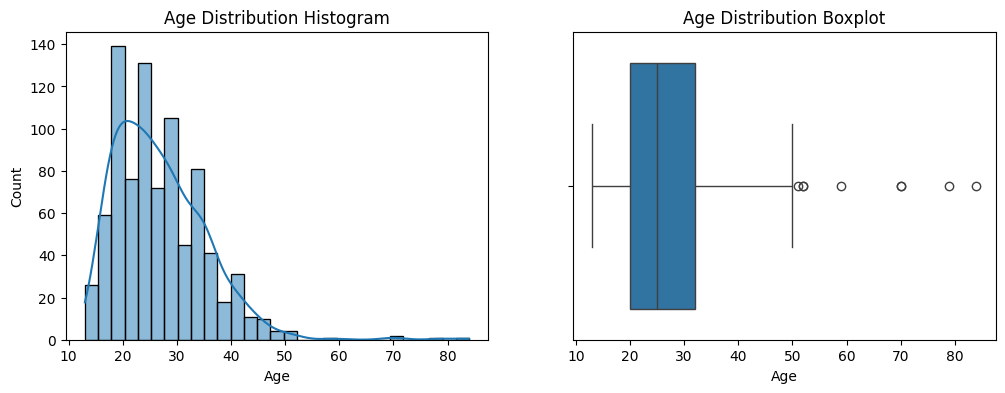

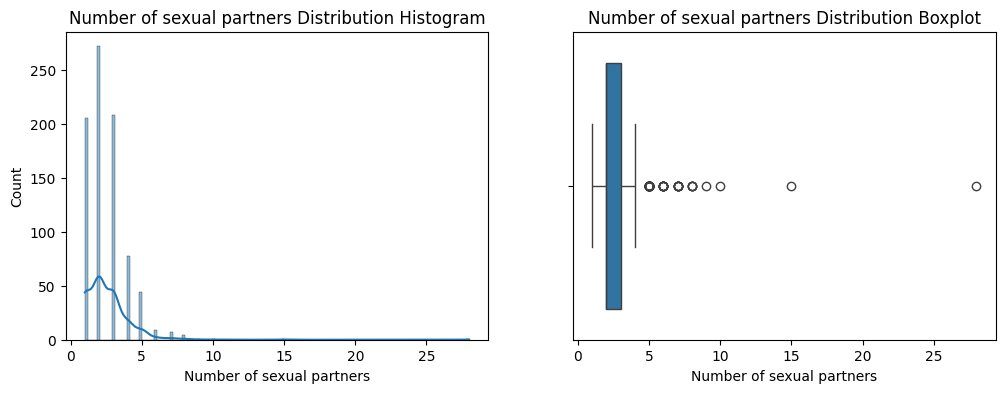

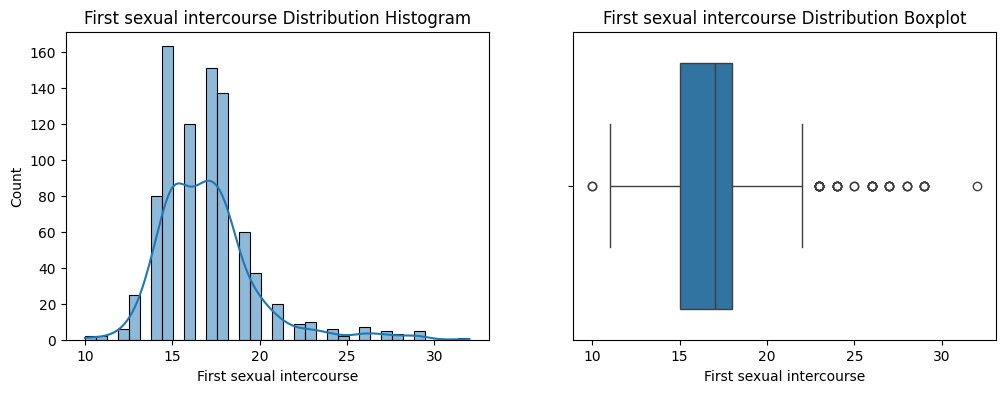

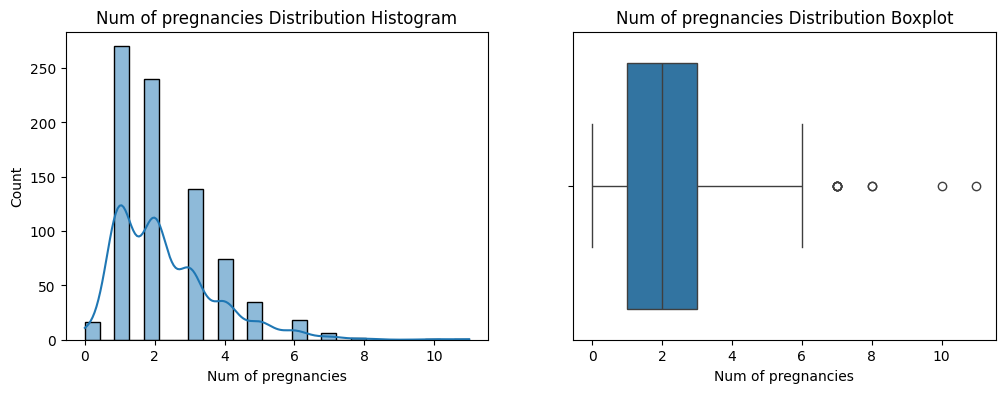

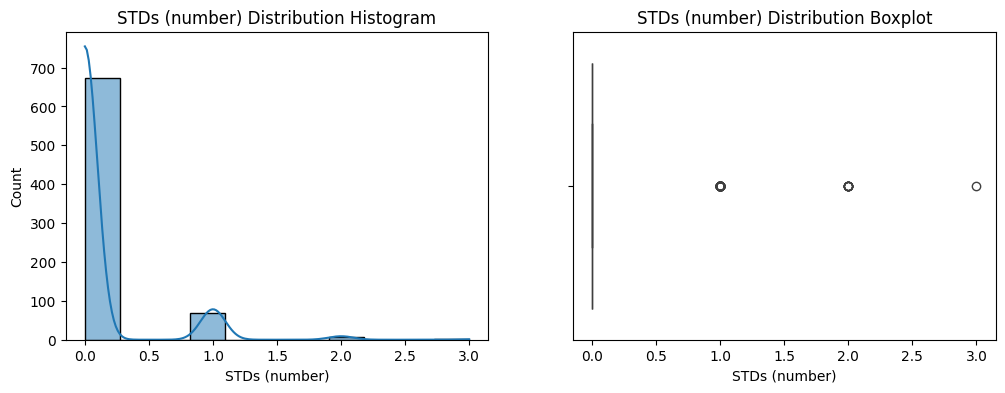

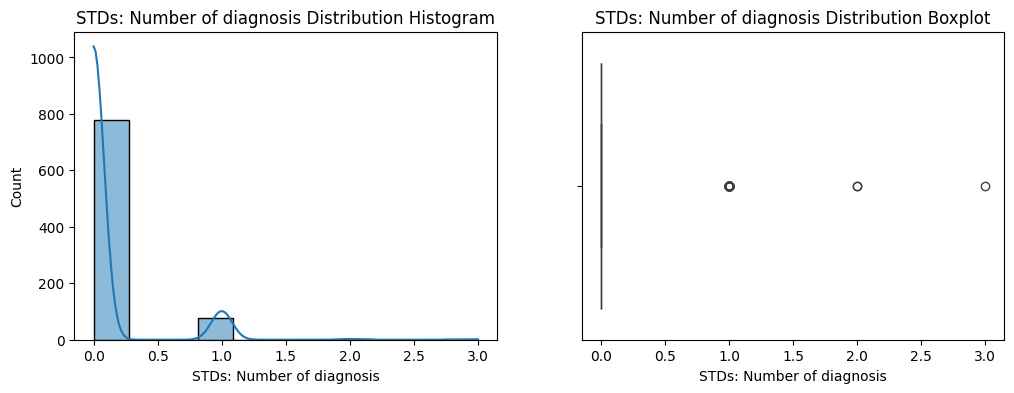

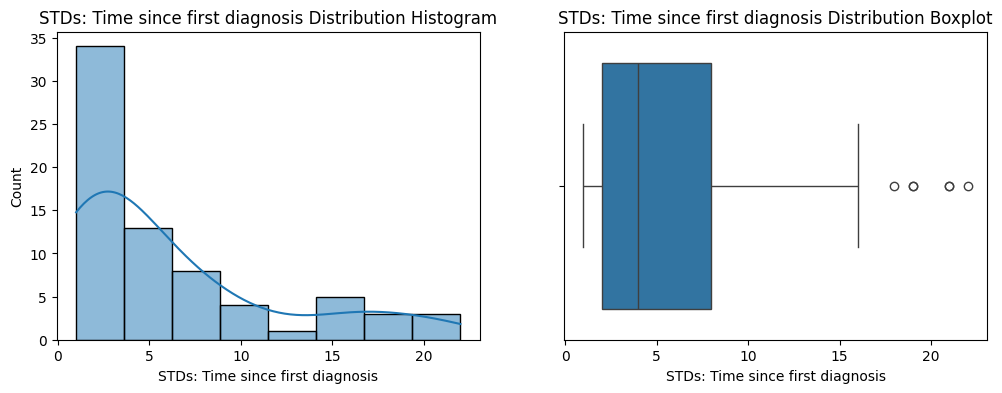

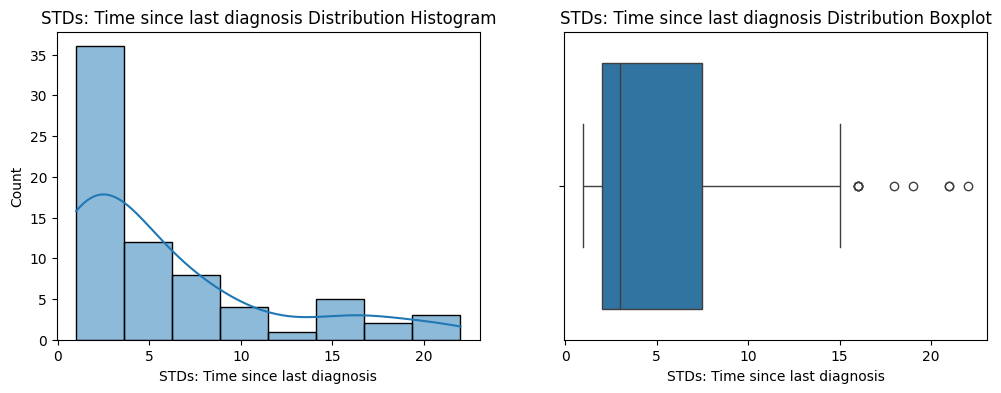

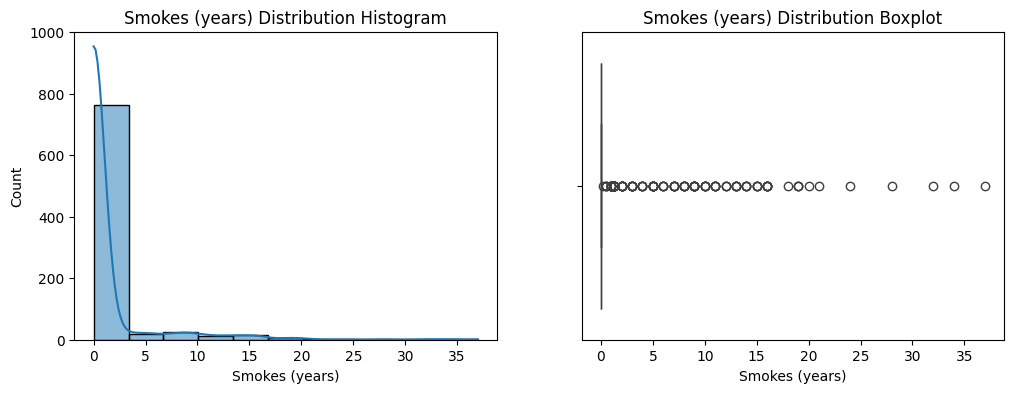

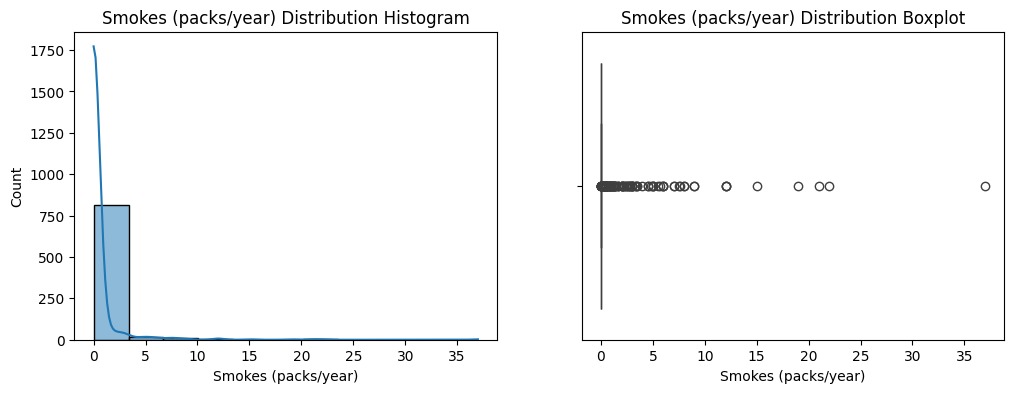

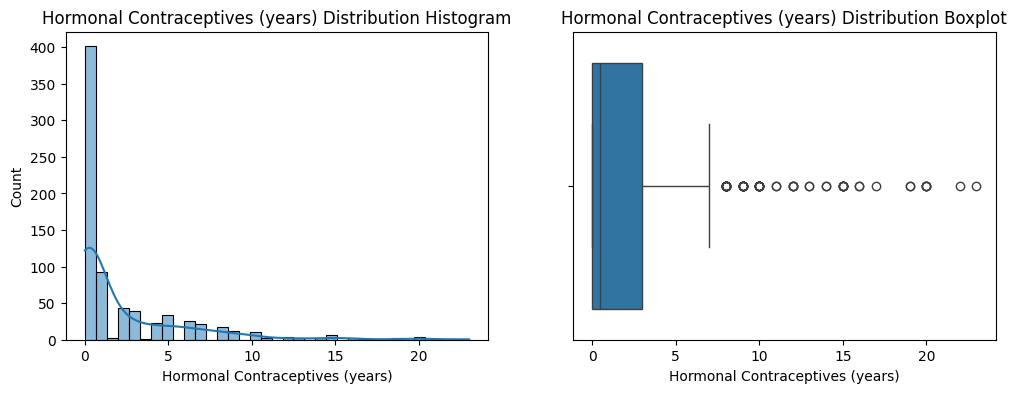

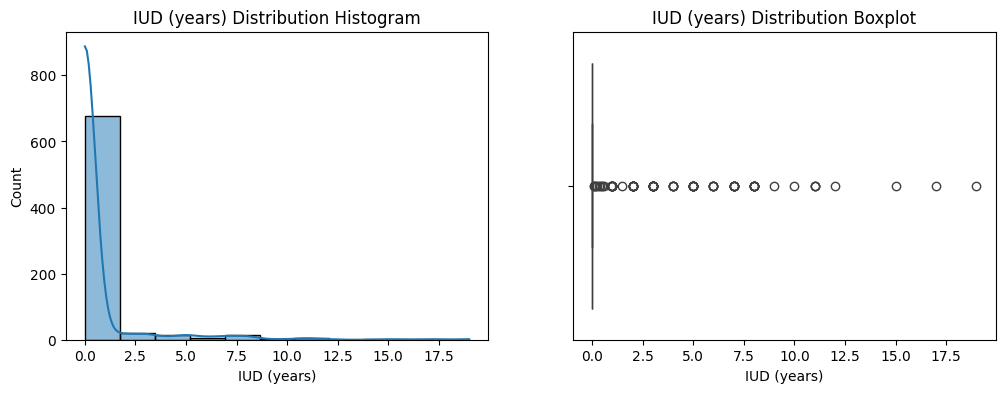

In [ ]:
for var in num_var:
  num_distr(df, var)

Убедились в отсутствии выбросов - все цифры выглядят реальными.

## Распределение категориальных переменных

<Figure size 1200x600 with 0 Axes>

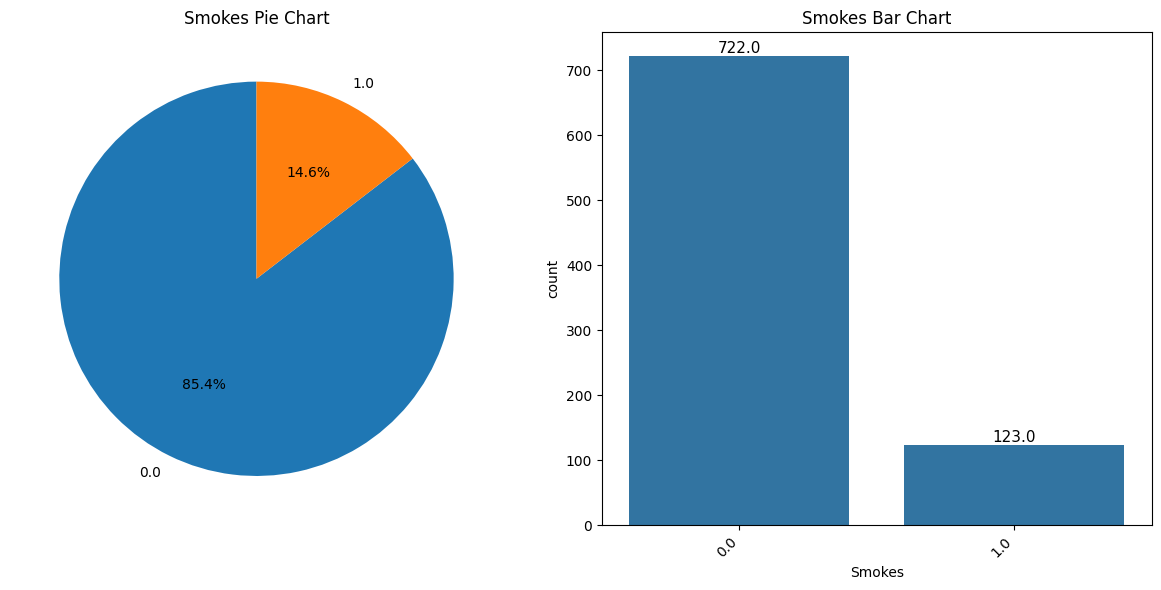

<Figure size 1200x600 with 0 Axes>

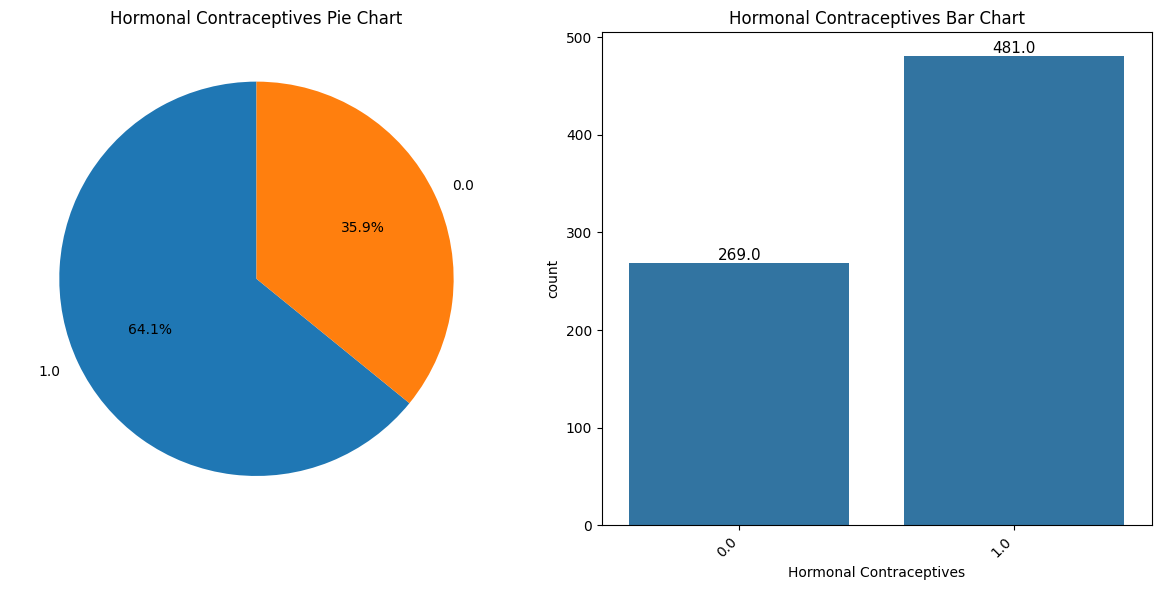

<Figure size 1200x600 with 0 Axes>

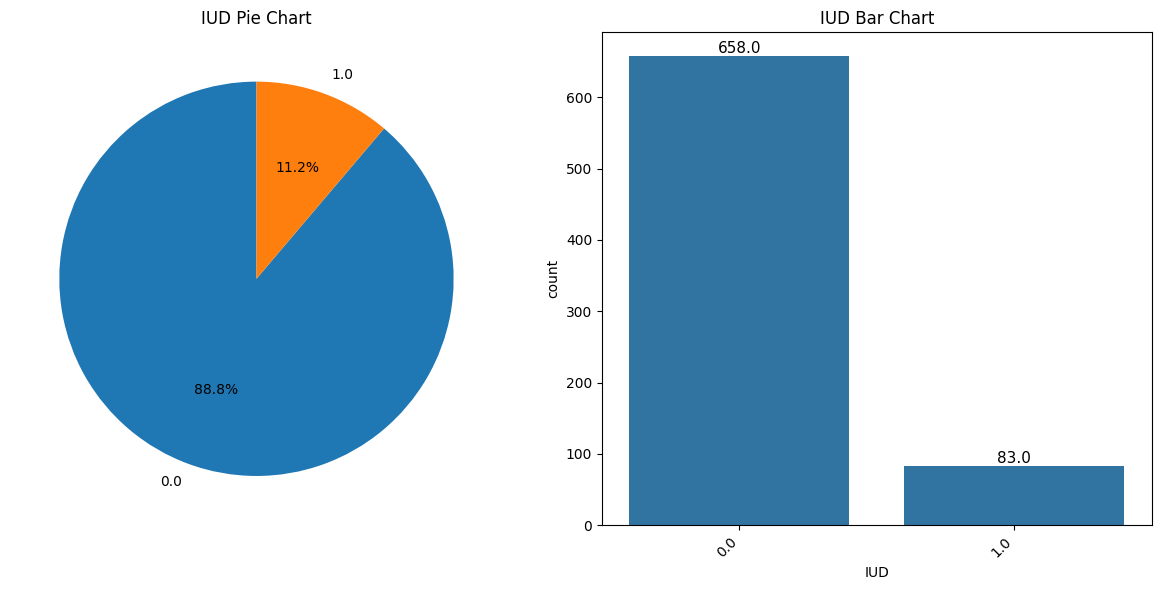

<Figure size 1200x600 with 0 Axes>

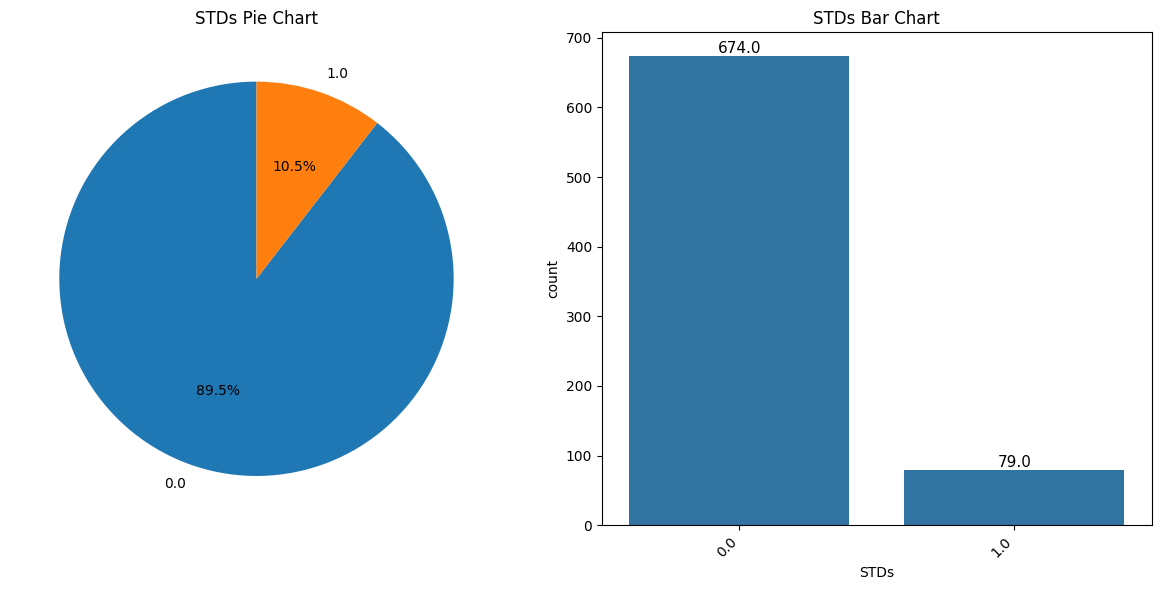

<Figure size 1200x600 with 0 Axes>

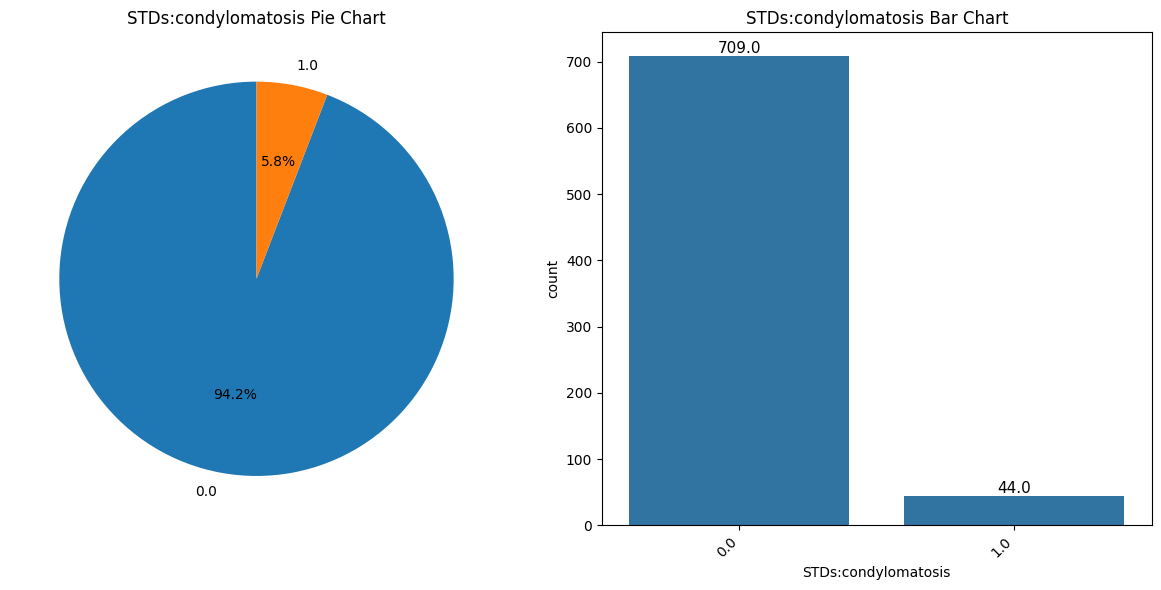

<Figure size 1200x600 with 0 Axes>

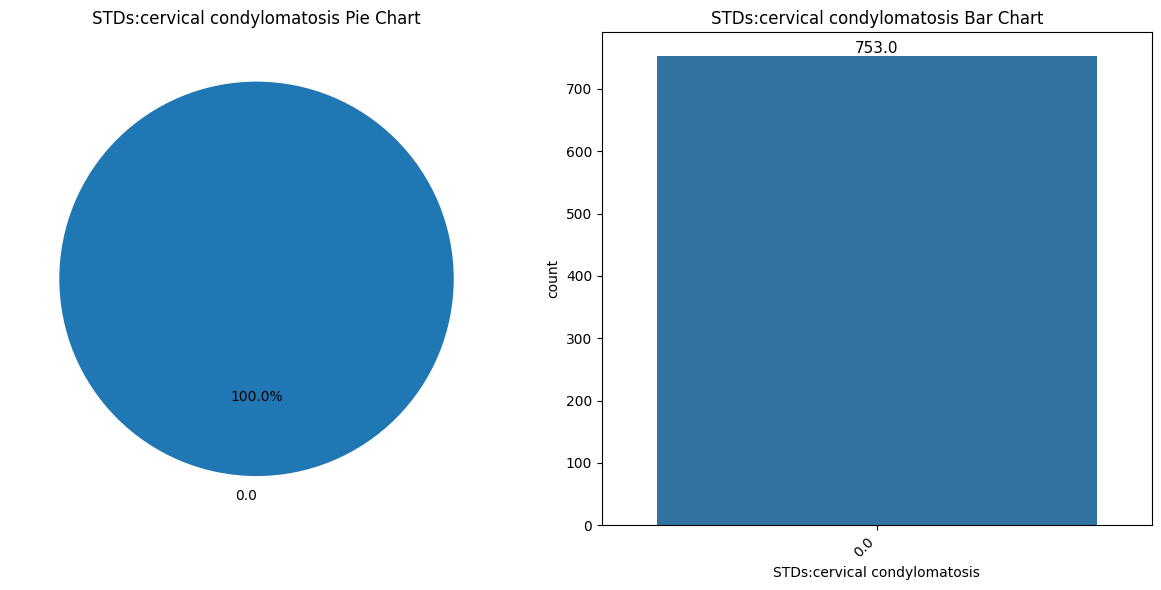

<Figure size 1200x600 with 0 Axes>

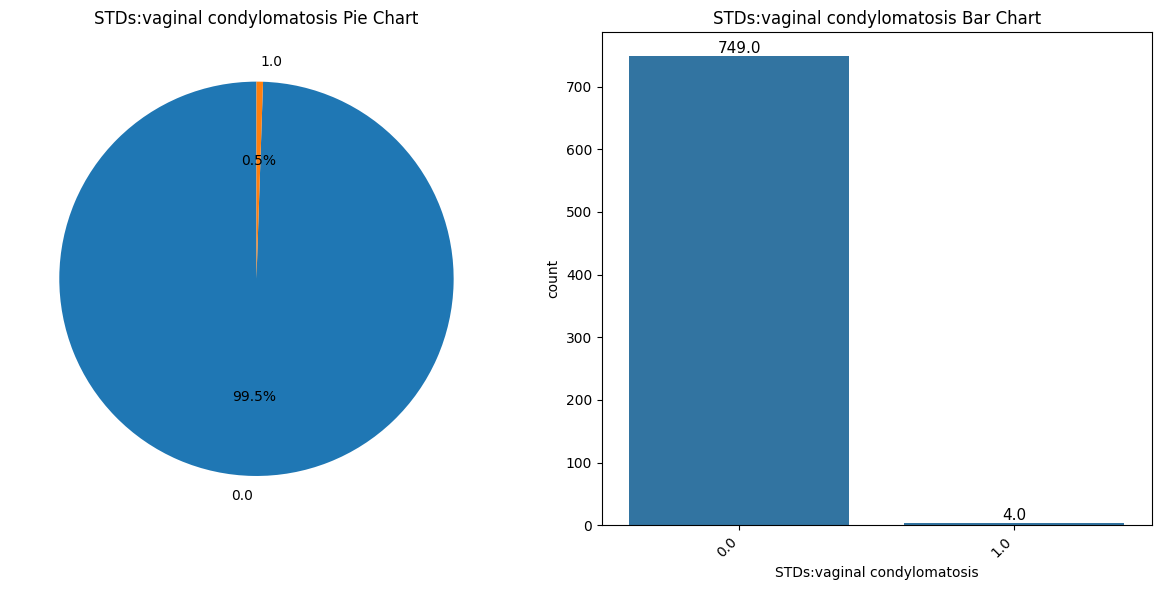

<Figure size 1200x600 with 0 Axes>

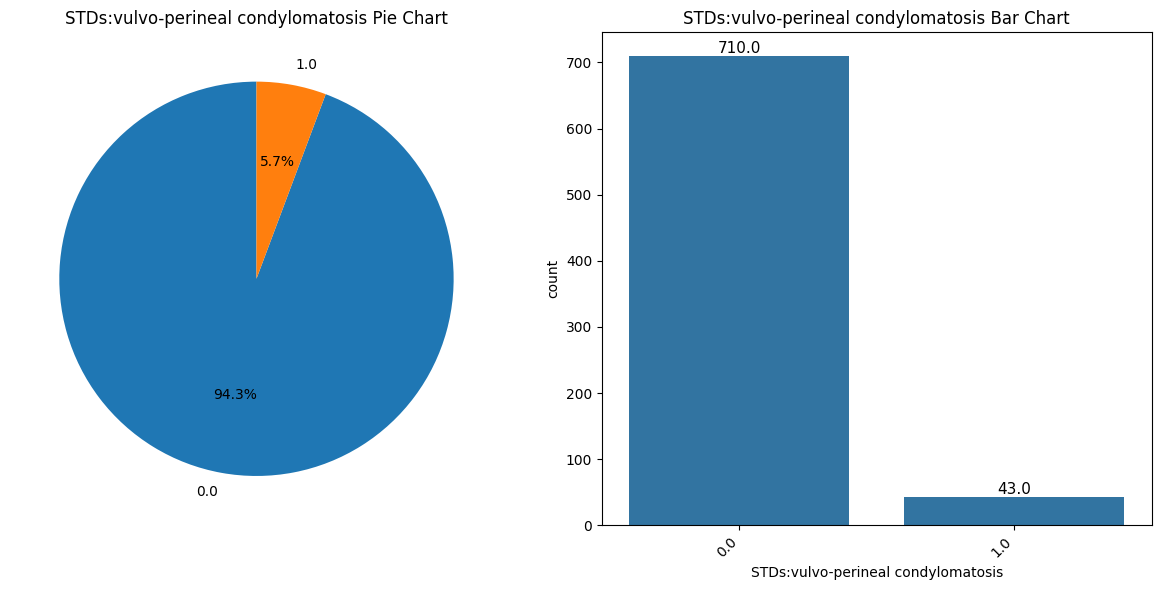

<Figure size 1200x600 with 0 Axes>

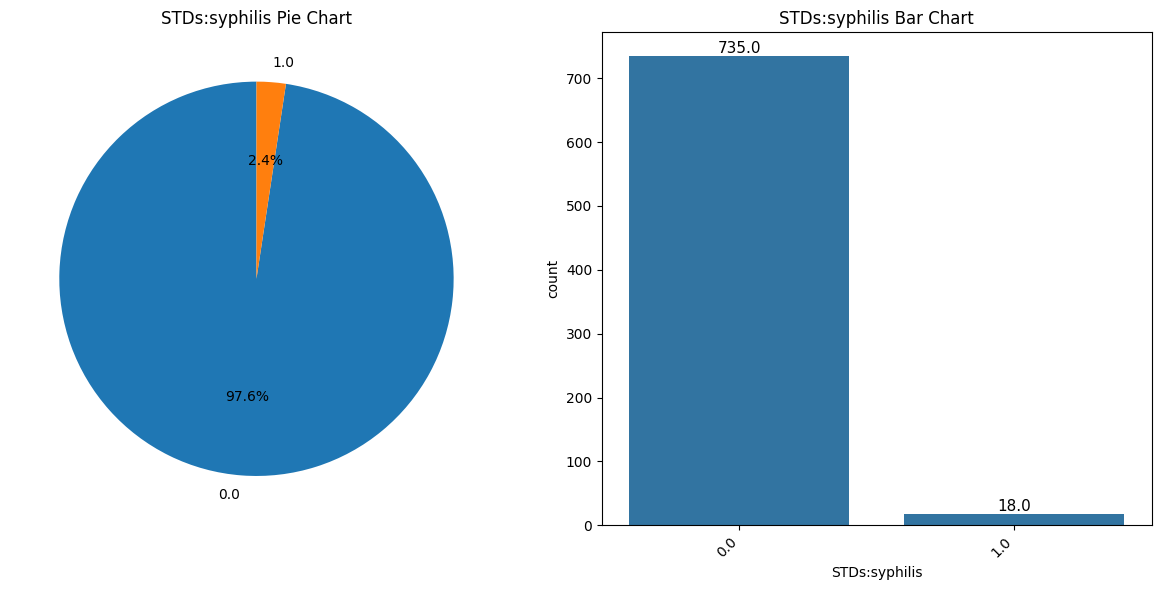

<Figure size 1200x600 with 0 Axes>

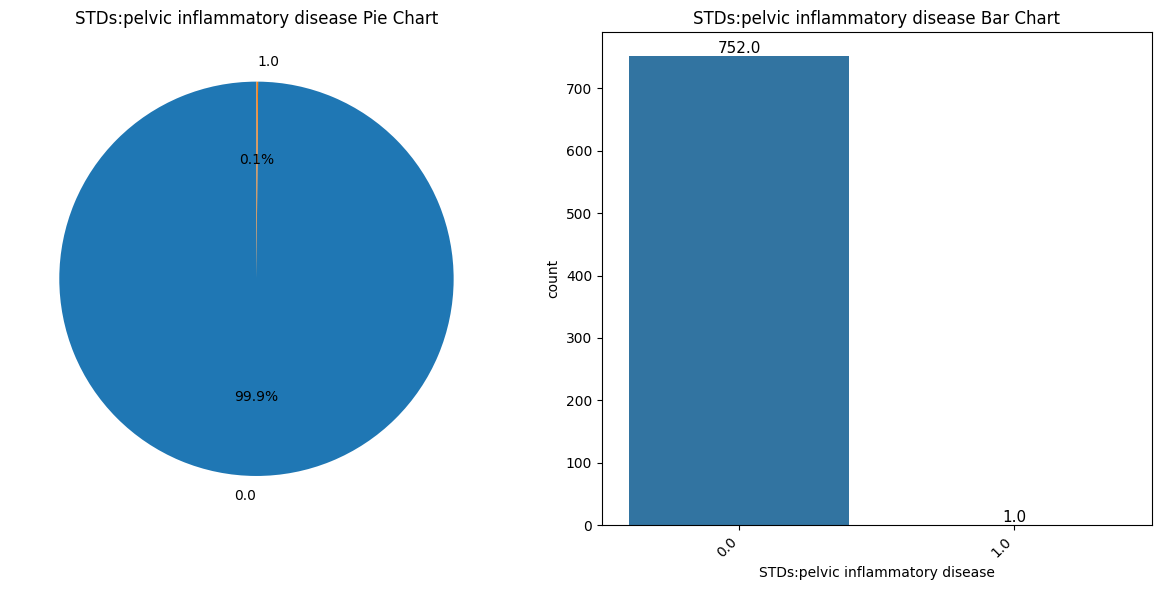

<Figure size 1200x600 with 0 Axes>

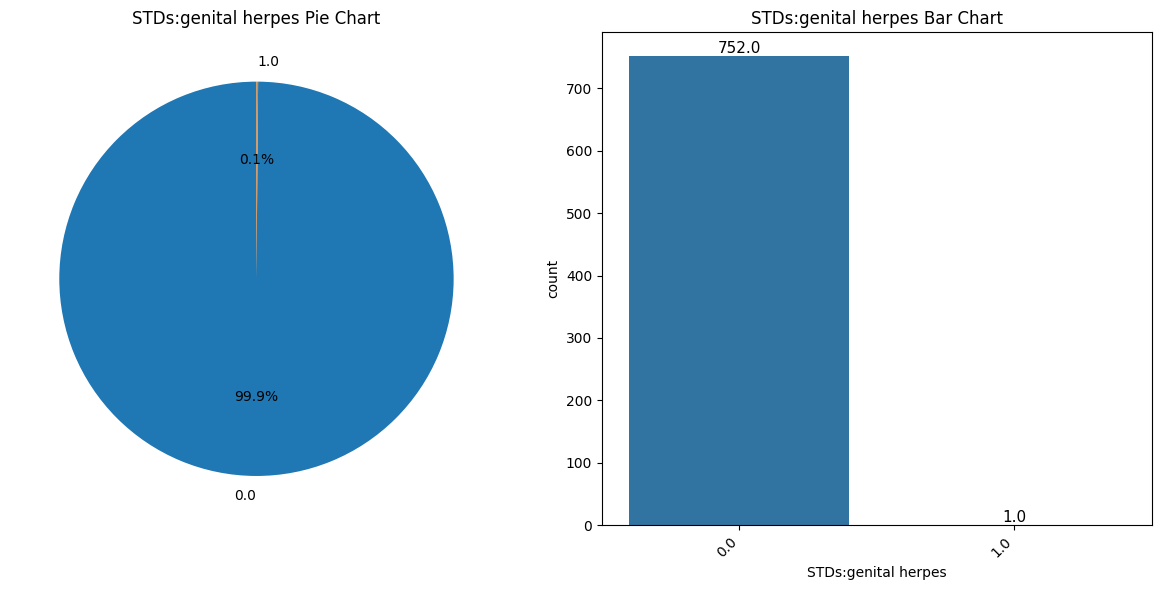

<Figure size 1200x600 with 0 Axes>

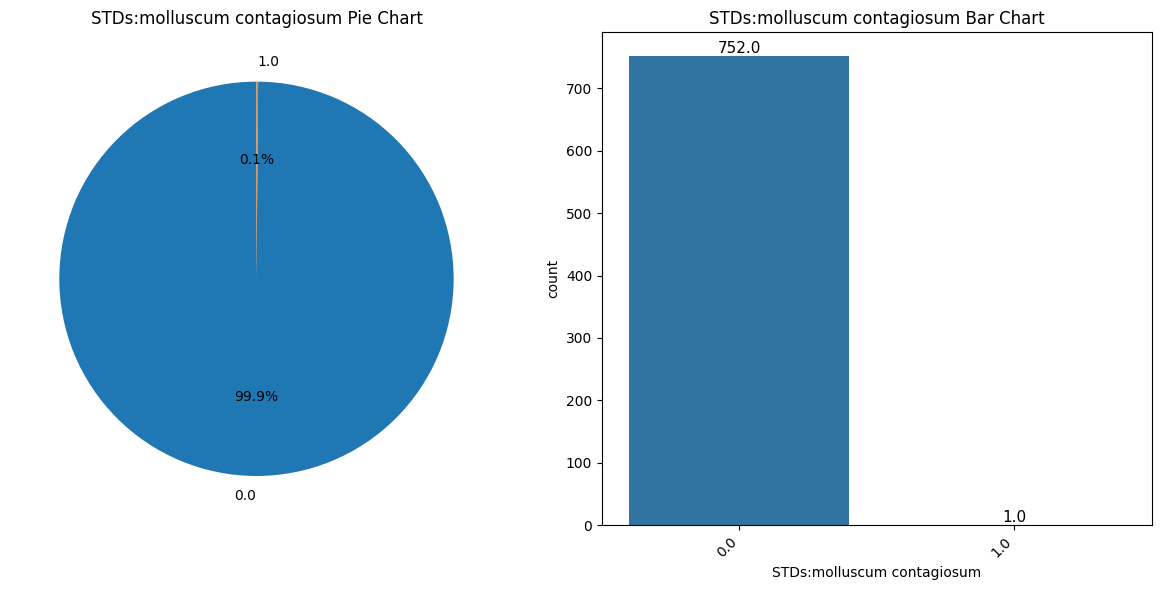

<Figure size 1200x600 with 0 Axes>

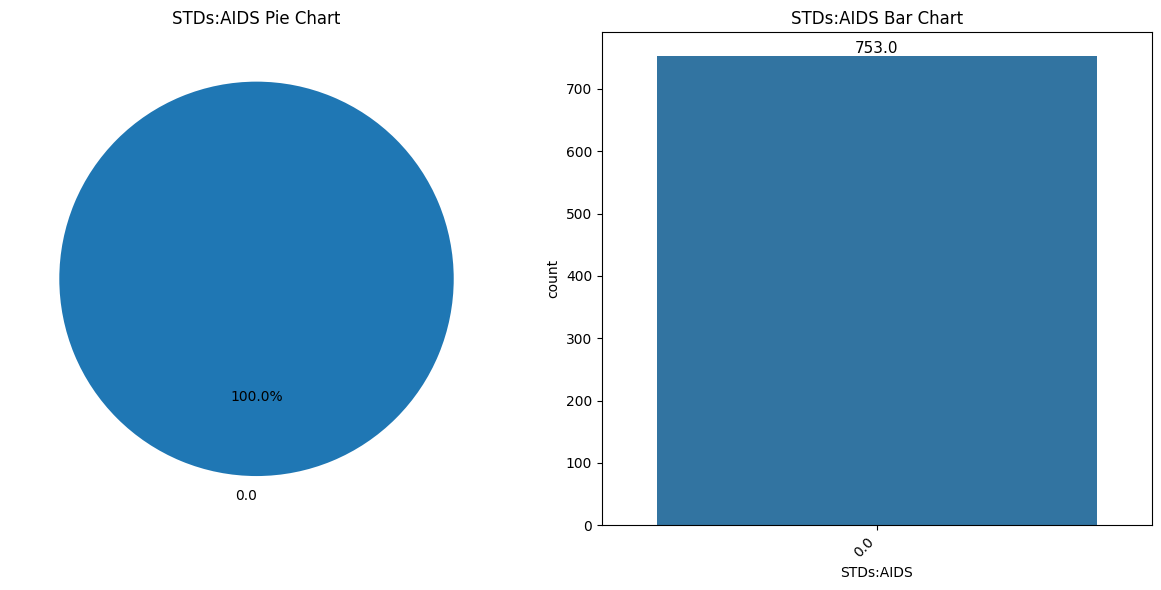

<Figure size 1200x600 with 0 Axes>

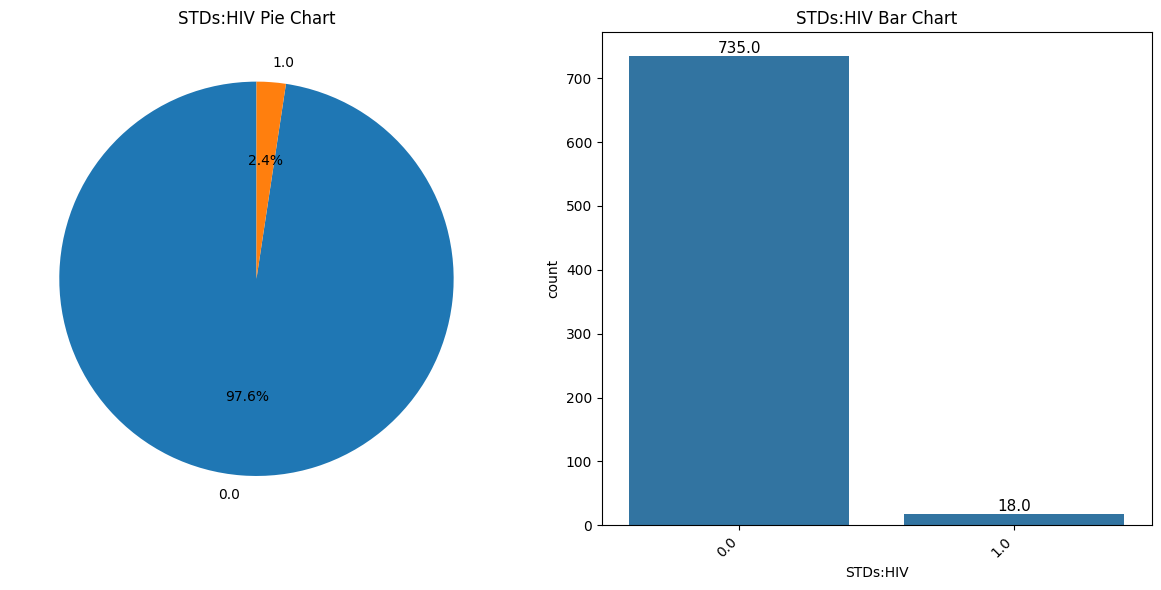

<Figure size 1200x600 with 0 Axes>

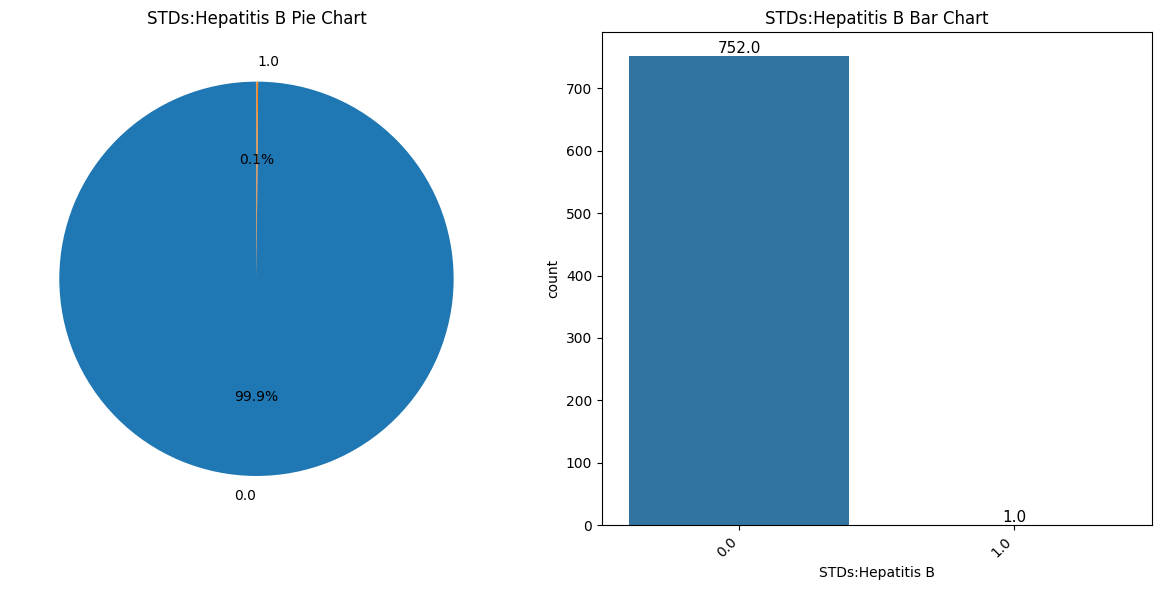

<Figure size 1200x600 with 0 Axes>

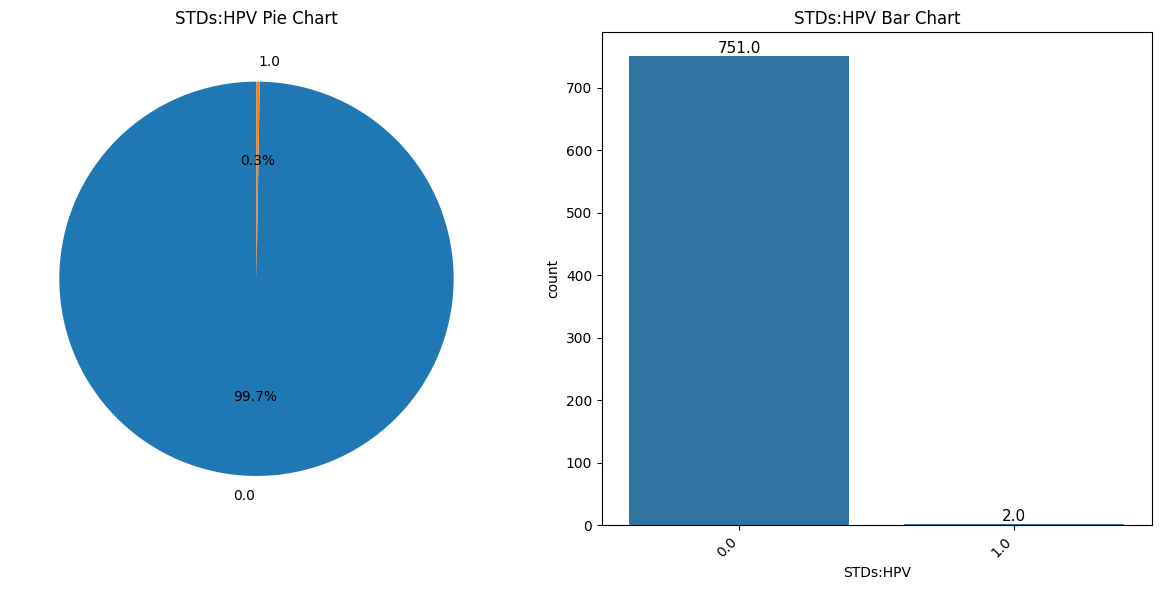

<Figure size 1200x600 with 0 Axes>

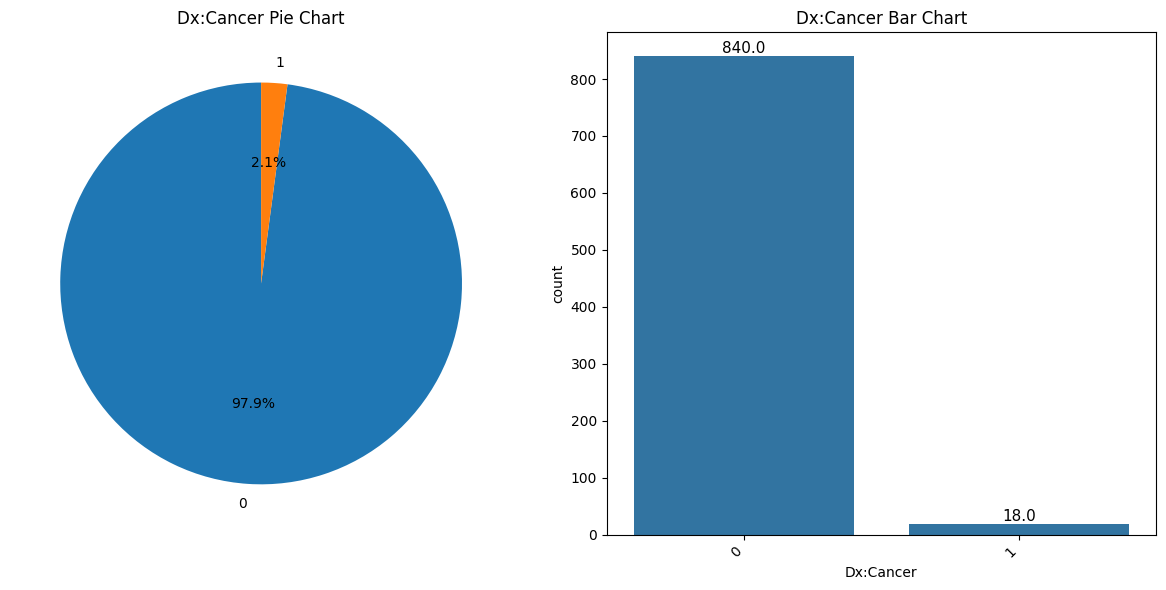

<Figure size 1200x600 with 0 Axes>

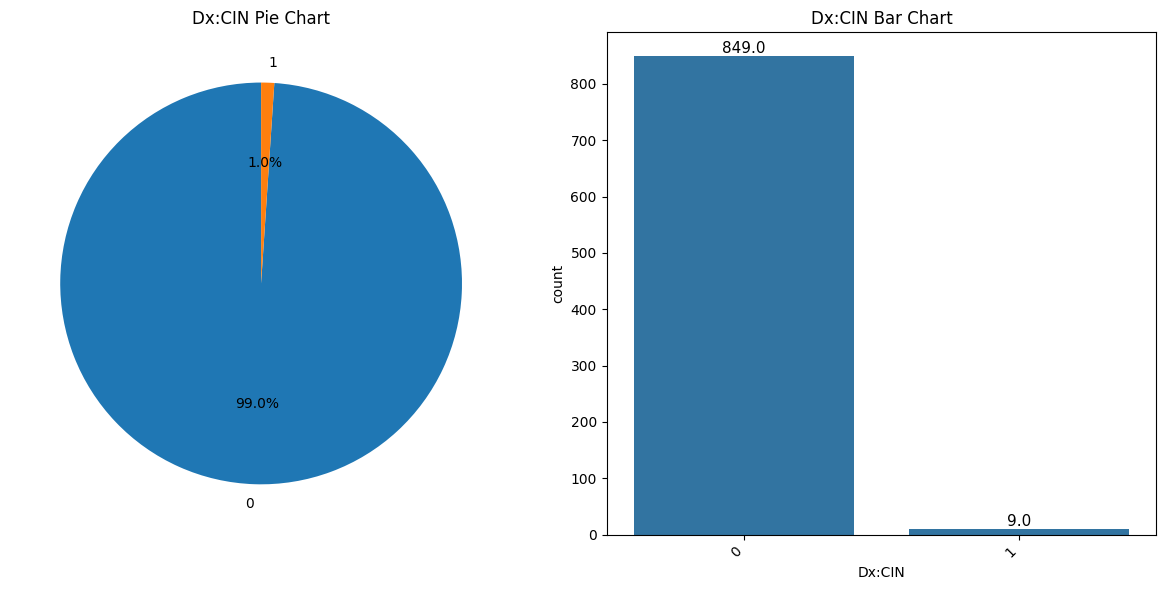

<Figure size 1200x600 with 0 Axes>

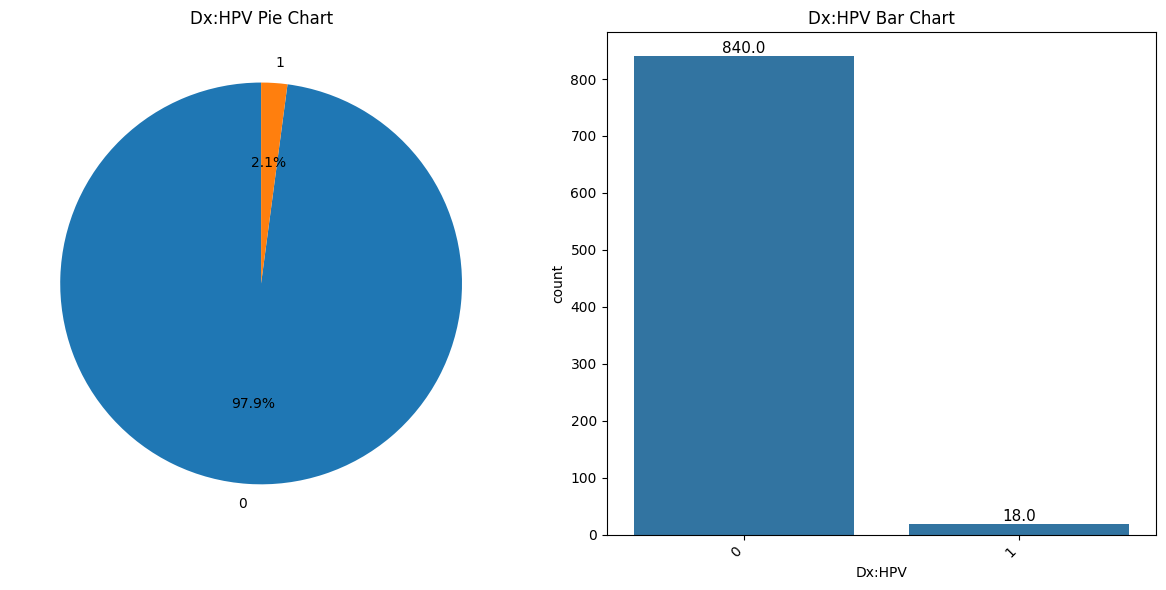

<Figure size 1200x600 with 0 Axes>

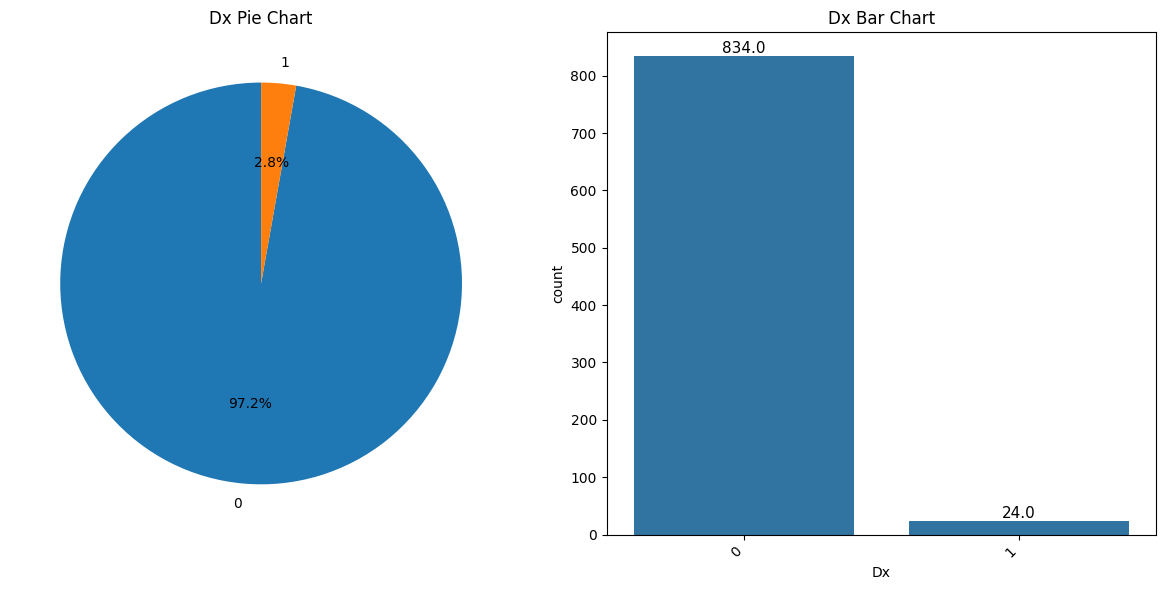

In [ ]:
for var in cat_var:
  cat_distr(df, var)

## Наличие/отсутствие рака шейки матки

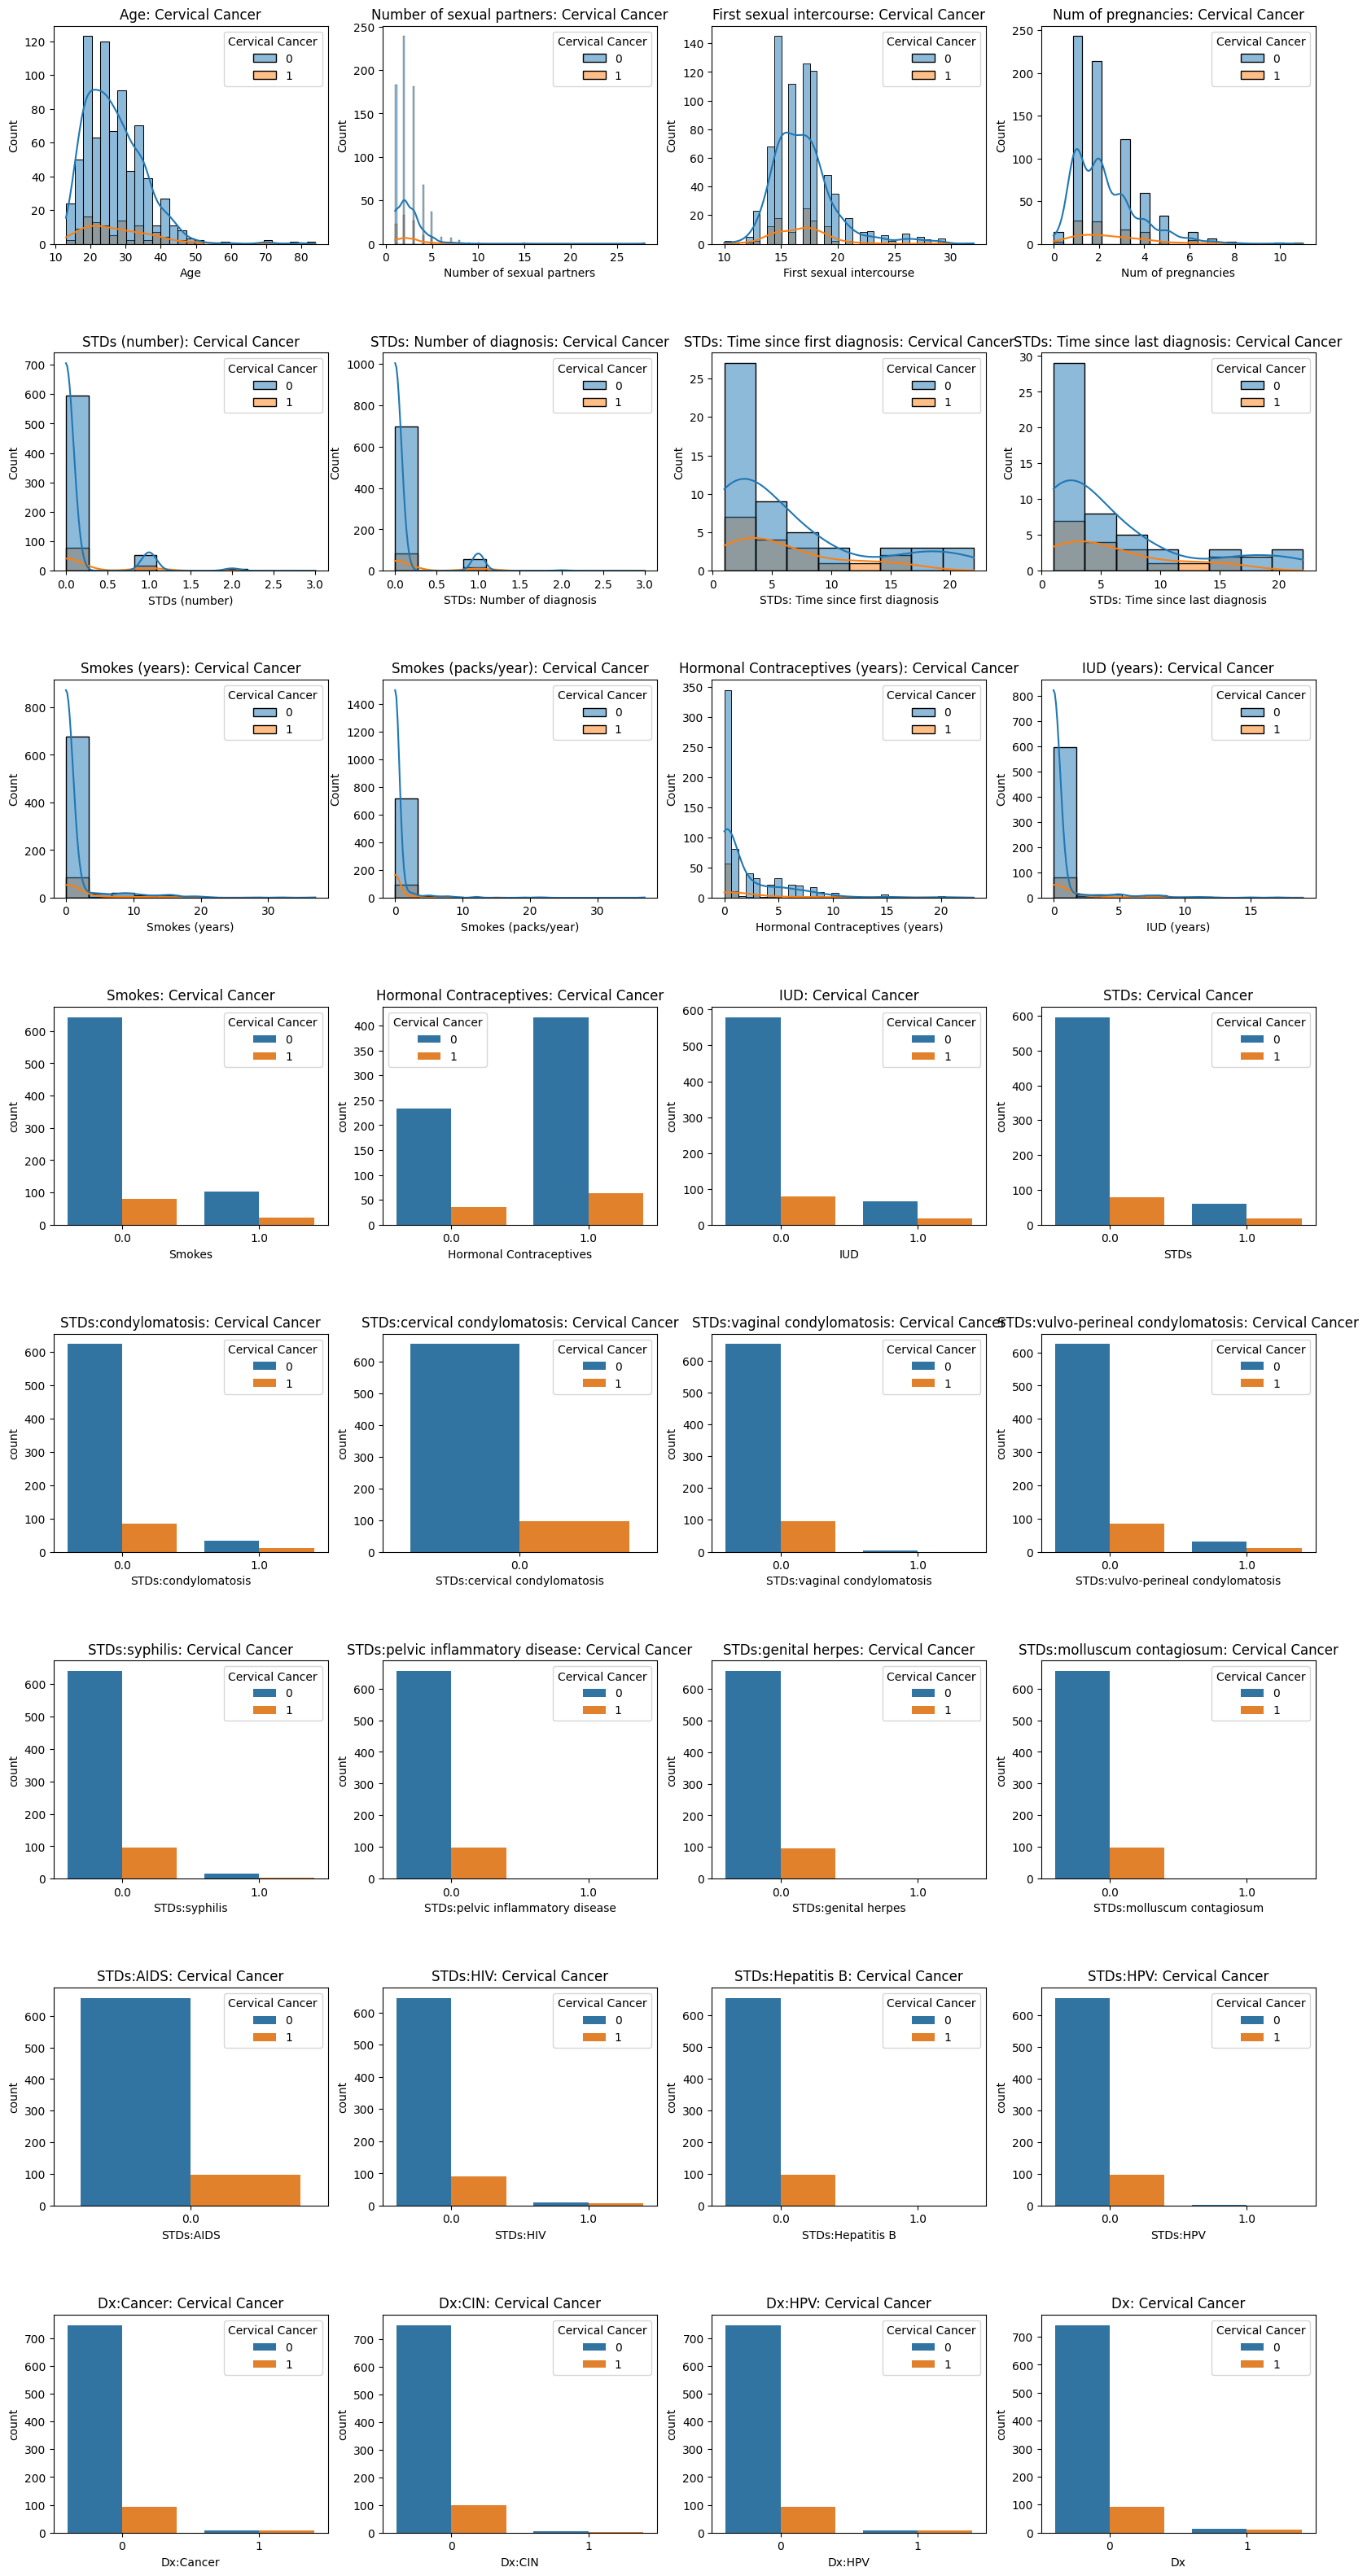

In [ ]:
fig, ax = plt.subplots(8, 4, figsize=(20,40))
ax = ax.flatten()
for i, var in enumerate(num_var + cat_var):
  if i < 12:
    sns.histplot(data=df, x=var, hue=target, kde=True, ax=ax[i])
  else:
    sns.countplot(data=df, x=var, hue=target, ax=ax[i])
  ax[i].set_title(f"{var}: Cervical Cancer")
plt.subplots_adjust(hspace=0.5)
plt.show()

В связи с малым количеством положительных значений каждого признака, оценить зависимости на таких графиках сложно.

Рассмотрим некоторые графики поближе.

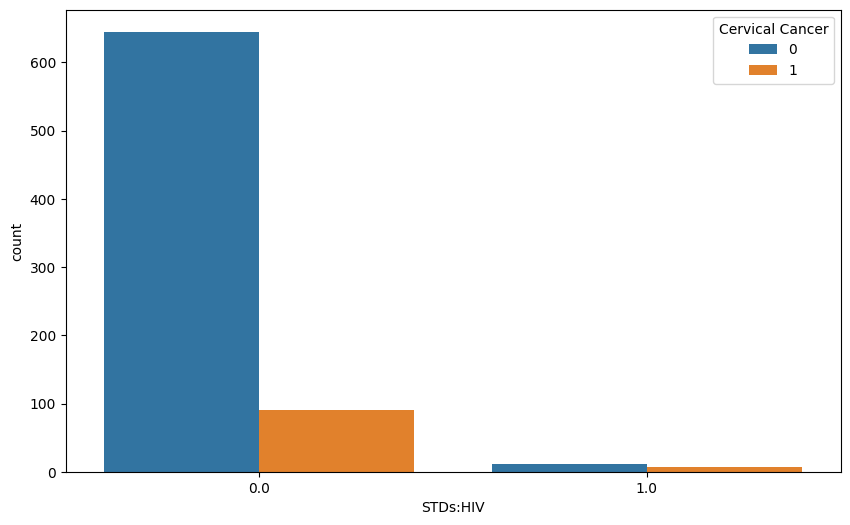

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='STDs:HIV', hue='Cervical Cancer')
plt.show()

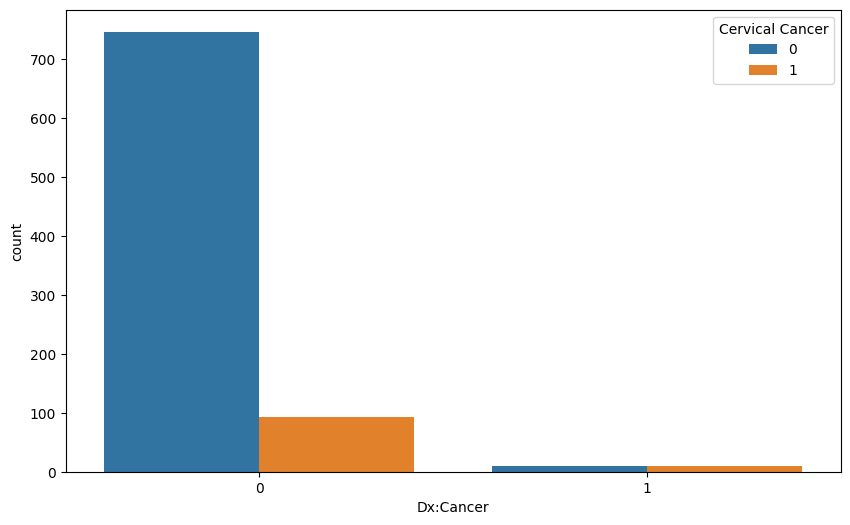

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Dx:Cancer', hue='Cervical Cancer')
plt.show()

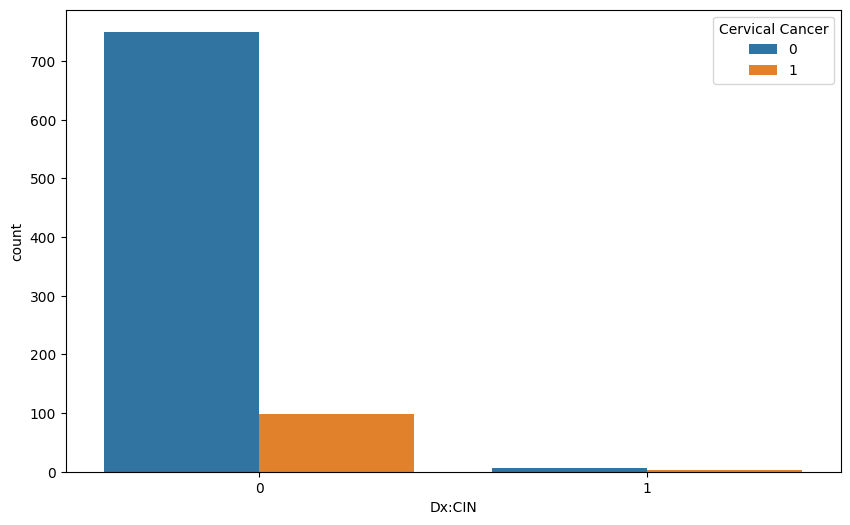

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Dx:CIN', hue='Cervical Cancer')
plt.show()

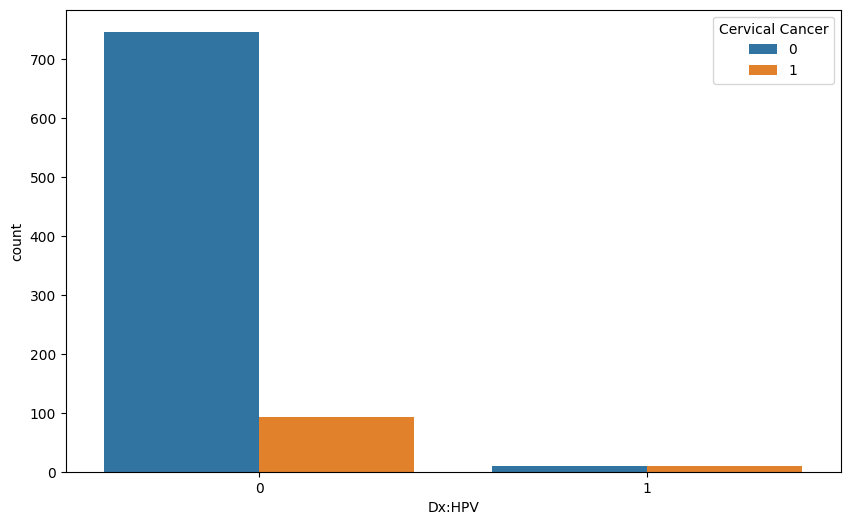

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Dx:HPV', hue='Cervical Cancer')
plt.show()

In [ ]:
df[df['Dx:HPV'] == 1]

Age  Number of sexual partners  First sexual intercourse  \
3     52                        5.0                      16.0   
8     45                        1.0                      20.0   
23    40                        1.0                      20.0   
64    38                        2.0                      15.0   
109   32                        2.0                      17.0   
188   27                        5.0                      19.0   
335   29                        2.0                      18.0   
372   21                        5.0                      13.0   
578   19                        1.0                      18.0   
610   21                        2.0                      18.0   
669   38                        3.0                      22.0   
727   31                        2.0                      19.0   
738   27                        6.0                      17.0   
763   41                        3.0                      18.0   
775   27                        2.0                      14.0   
797   33                        3.0                      19.0   
822   36                        3.0                      20.0   
849   32                        3.0                      18.0   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
3                   4.0     1.0       37.000000            37.000000   
8                   5.0     0.0        0.000000             0.000000   
23                  2.0     0.0        0.000000             0.000000   
64                  4.0     0.0        0.000000             0.000000   
109                 1.0     0.0        0.000000             0.000000   
188                 2.0     0.0        0.000000             0.000000   
335                 4.0     0.0        0.000000             0.000000   
372                 3.0     1.0        1.266973             0.513202   
578                 1.0     0.0        0.000000             0.000000   
610                 3.0     0.0        0.000000             0.000000   
669                 2.0     NaN             NaN                  NaN   
727                 2.0     0.0        0.000000             0.000000   
738                 2.0     0.0        0.000000             0.000000   
763                 5.0     0.0        0.000000             0.000000   
775                 3.0     0.0        0.000000             0.000000   
797                 3.0     0.0        0.000000             0.000000   
822                 2.0     0.0        0.000000             0.000000   
849                 1.0     1.0       11.000000             0.160000   

     Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
3                        1.0                             3.00  0.0  ...   
8                        0.0                             0.00  0.0  ...   
23                       1.0                            15.00  0.0  ...   
64                       1.0                            16.00  0.0  ...   
109                      NaN                              NaN  NaN  ...   
188                      1.0                             3.00  0.0  ...   
335                      0.0                             0.00  0.0  ...   
372                      1.0                             0.75  0.0  ...   
578                      1.0                             1.00  0.0  ...   
610                      0.0                             0.00  1.0  ...   
669                      1.0                             3.00  1.0  ...   
727                      1.0                             9.00  0.0  ...   
738                      0.0                             0.00  0.0  ...   
763                      1.0                             1.00  1.0  ...   
775                      1.0                             1.00  0.0  ...   
797                      1.0                             0.16  1.0  ...   
822                      1.0                             6.00  0.0  ...   
849                      1.0                      

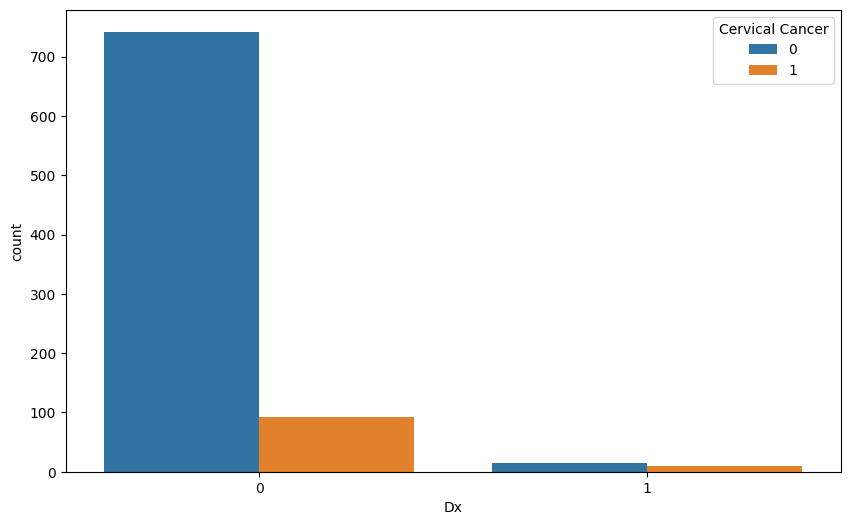

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Dx', hue='Cervical Cancer')
plt.show()

Как видим, в положительных группах этих признаков доля наличия диагноза рака шейки матки выше, чем в отрицательных.

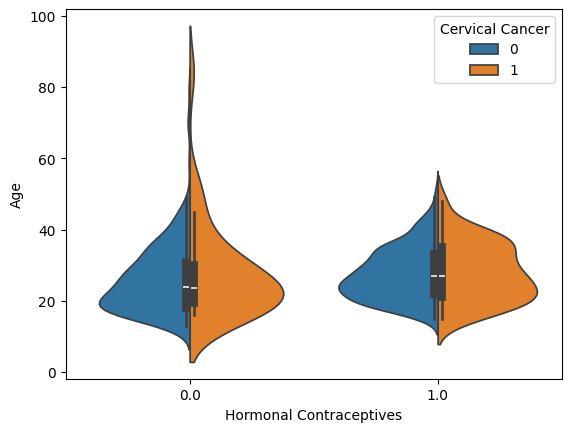

In [ ]:
sns.violinplot(data=df, x='Hormonal Contraceptives', y='Age', hue=target, split=True)
plt.show()

Можно заметить увеличение кол-ва пациенток с раком шейки матки в возрасте 30+ в группе пациенток, принимавших гормональные контрацептивы, по сравнению с кол-вом пациенток 30+, не принимавших гормональные контрацептивы.
Иными словами, кол-во пациенток возраста 30+, с обнаруженным раком шейки матки, больше в группе пациенток, принимавших гормональные контрацептивы.

In [ ]:
df[(df['Age'] >= 30) & (df['Age'] <= 45) & (df['Hormonal Contraceptives'] == 0)]['Cervical Cancer'].value_counts()

Cervical Cancer
0    62
1     8
Name: count, dtype: int64

In [ ]:
df[(df['Age'] >= 30) & (df['Age'] <= 45) & (df['Hormonal Contraceptives'] == 1)]['Cervical Cancer'].value_counts()

Cervical Cancer
0    150
1     24
Name: count, dtype: int64

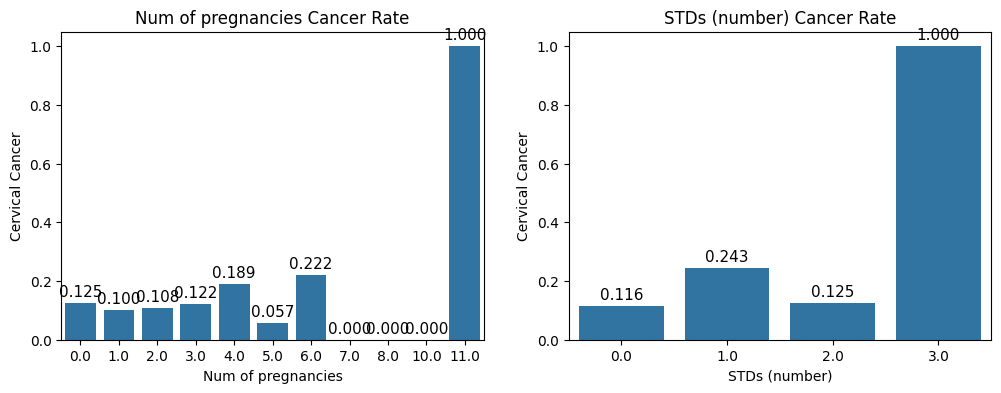

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
for i, var in enumerate(["Num of pregnancies", "STDs (number)"]):
  canc = sns.barplot(data=df, x=var, y=target, ax=ax[i], errorbar=None)
  for bar in canc.patches:
    canc.annotate(format("{:.3f}".format(bar.get_height())),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha="center", va="center",
                 size=11, xytext=(0,8),
                 textcoords="offset points")
  ax[i].set_title(f"{var} Cancer Rate")

Можно предполагать следующие тенденции:
* С увеличением кол-ва беременностей увеличивается кол-во пациенток с раком (кроме наблюдений, где беременности не было).
* С увеличением кол-ва ЗППП увеличивается кол-во пациенток с раком.

Однако, чтобы проверить данные гипотезы, необходимо больше наблюдений с большим кол-вом беременностей и большим кол-вом ЗППП.

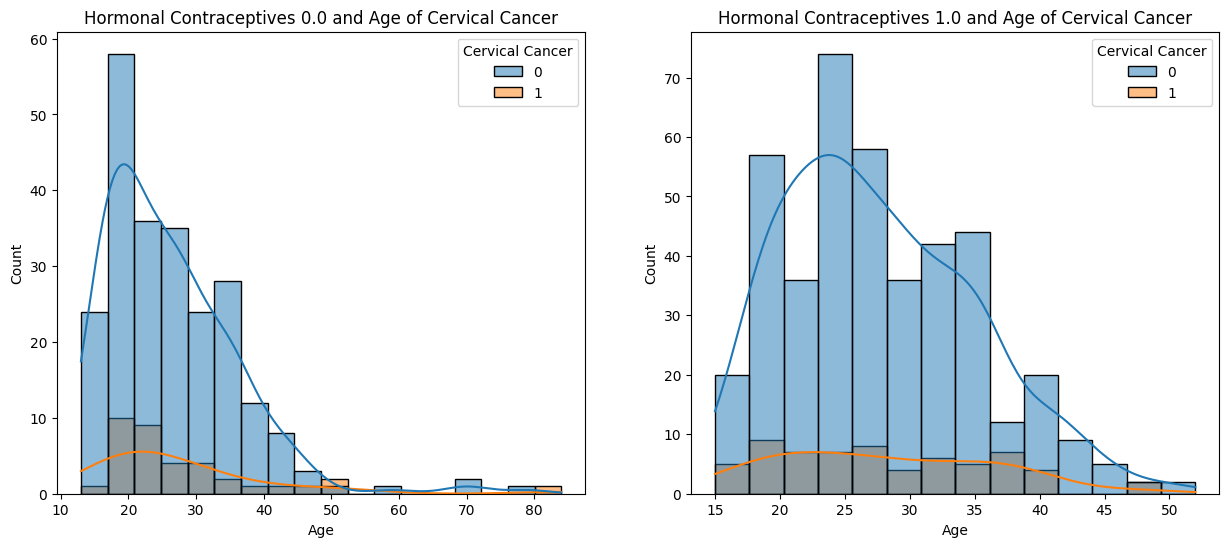

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))
for i, sm in enumerate(sorted(df['Hormonal Contraceptives'].unique())):
  if i < 2:
    sns.histplot(data=df[df['Hormonal Contraceptives']==sm], x="Age", hue=target, kde=True, ax=ax[i])
    ax[i].set_title(f"Hormonal Contraceptives {sm} and Age of Cervical Cancer")

На правом графике больше наблюдений с раком, но там и наблюдений больше. Нужно посмотреть в долях.

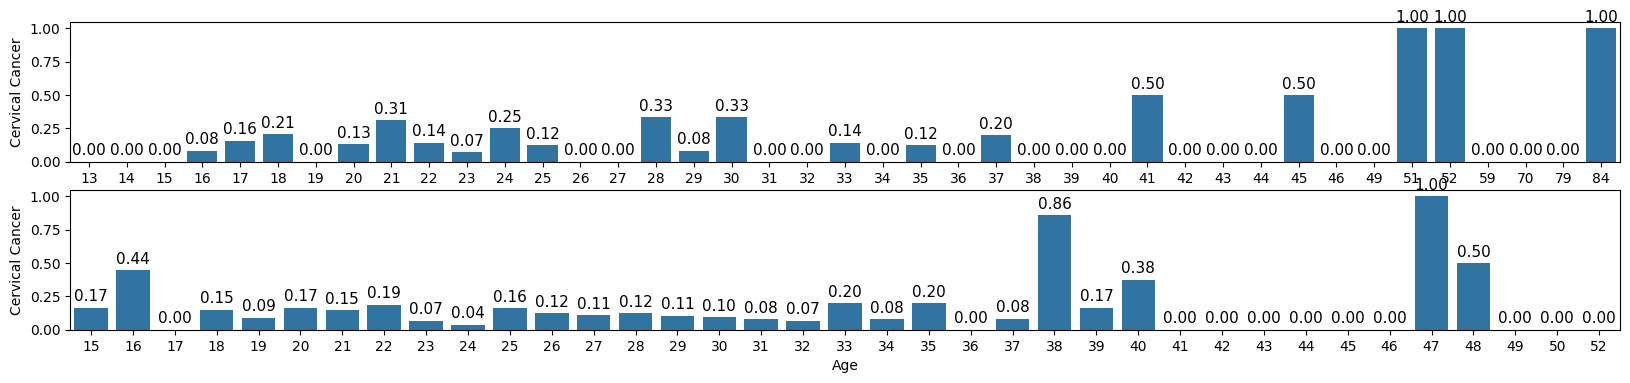

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(20, 4))
for i in ([0,1]):
  canc = sns.barplot(data=df[df["Hormonal Contraceptives"] == i], x="Age", y=target, ax=ax[i], errorbar=None)
  for bar in canc.patches:
    canc.annotate(format("{:.2f}".format(bar.get_height())),
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha="center", va="center",
                 size=11, xytext=(0,8),
                 textcoords="offset points")
  # ax[i].set_title(f"Hormonal Contraceptives == {i} Cancer Rate")

Сложно оценить зависимость от гормональных контрацептивов, так как не видно явных различий между принимающими гормональные контрацептивы и не принимающими.

In [ ]:
df.to_csv('df_after_outliers.csv', index=False)
df = pd.read_csv('df_after_outliers.csv')
df.describe()

Age  Number of sexual partners  First sexual intercourse  \
count  858.000000                 832.000000                851.000000   
mean    26.827506                   2.527644                 16.988249   
std      8.493698                   1.667760                  2.791559   
min     13.000000                   1.000000                 10.000000   
25%     20.000000                   2.000000                 15.000000   
50%     25.000000                   2.000000                 17.000000   
75%     32.000000                   3.000000                 18.000000   
max     84.000000                  28.000000                 32.000000   

       Num of pregnancies      Smokes  Smokes (years)  Smokes (packs/year)  \
count          802.000000  845.000000      845.000000           845.000000   
mean             2.275561    0.145562        1.198420             0.453144   
std              1.447414    0.352876        4.003147             2.226610   
min              0.000000    0.000000        0.000000             0.000000   
25%              1.000000    0.000000        0.000000             0.000000   
50%              2.000000    0.000000        0.000000             0.000000   
75%              3.000000    0.000000        0.000000             0.000000   
max             11.000000    1.000000       37.000000            37.000000   

       Hormonal Contraceptives  Hormonal Contraceptives (years)         IUD  \
count               750.000000                       750.000000  741.000000   
mean                  0.641333                         2.247086    0.112011   
std                   0.479929                         3.703561    0.315593   
min                   0.000000                         0.000000    0.000000   
25%                   0.000000                         0.000000    0.000000   
50%                   1.000000                         0.500000    0.000000   
75%                   1.000000                         3.000000    0.000000   
max                   1.000000                        23.000000    1.000000   

       ...  STDs:Hepatitis B    STDs:HPV  STDs: Number of diagnosis  \
count  ...        753.000000  753.000000                 858.000000   
mean   ...          0.001328    0.002656                   0.096737   
std    ...          0.036442    0.051503                   0.314880   
min    ...          0.000000    0.000000                   0.000000   
25%    ...          0.000000    0.000000                   0.000000   
50%    ...          0.000000    0.000000                   0.000000   
75%    ...          0.000000    0.000000                   0.000000   
max    ...          1.000000    1.000000                   3.000000   

       STDs: Time since first diagnosis  STDs: Time since last diagnosis  \
count                         71.000000                        71.000000   
mean                           6.140845                         5.816901   
std                            5.895024                         5.755271   
min                            1.000000                         1.000000   
25%                            2.000000                         2.000000   
50%                            4.000000                         3.000000   
75%                            8.000000                         7.500000   
max                           22.000000                        22.000000   

        Dx:Cancer      Dx:CIN      Dx:HPV          Dx  Cervical Cancer  
count  858.000000  858.000000  858.000000  858.000000       858.000000  
mean     0.020979    0.010490    0.020979    0.027972         0.118881  
std      0.143398    0.101939    0.143398    0.164989         0.323837  
min      0.000000    0.000000    0.000000    0.000000         0.000000  
25%      0.000000    0.000000    0.000000    0.000000         0.000000  
50%      0.000000    0.000000    0.000000    0.000000         0.000000  
75%      0.000000    0.000000    0.000000    0.000000         0.000000  
max      1.000000    1.

# 3. Обработка данных и Feature Engineering

In [ ]:
df = pd.read_csv('df_after_outliers.csv')
df.describe()

Age  Number of sexual partners  First sexual intercourse  \
count  858.000000                 832.000000                851.000000   
mean    26.827506                   2.527644                 16.988249   
std      8.493698                   1.667760                  2.791559   
min     13.000000                   1.000000                 10.000000   
25%     20.000000                   2.000000                 15.000000   
50%     25.000000                   2.000000                 17.000000   
75%     32.000000                   3.000000                 18.000000   
max     84.000000                  28.000000                 32.000000   

       Num of pregnancies      Smokes  Smokes (years)  Smokes (packs/year)  \
count          802.000000  845.000000      845.000000           845.000000   
mean             2.275561    0.145562        1.198420             0.453144   
std              1.447414    0.352876        4.003147             2.226610   
min              0.000000    0.000000        0.000000             0.000000   
25%              1.000000    0.000000        0.000000             0.000000   
50%              2.000000    0.000000        0.000000             0.000000   
75%              3.000000    0.000000        0.000000             0.000000   
max             11.000000    1.000000       37.000000            37.000000   

       Hormonal Contraceptives  Hormonal Contraceptives (years)         IUD  \
count               750.000000                       750.000000  741.000000   
mean                  0.641333                         2.247086    0.112011   
std                   0.479929                         3.703561    0.315593   
min                   0.000000                         0.000000    0.000000   
25%                   0.000000                         0.000000    0.000000   
50%                   1.000000                         0.500000    0.000000   
75%                   1.000000                         3.000000    0.000000   
max                   1.000000                        23.000000    1.000000   

       ...  STDs:Hepatitis B    STDs:HPV  STDs: Number of diagnosis  \
count  ...        753.000000  753.000000                 858.000000   
mean   ...          0.001328    0.002656                   0.096737   
std    ...          0.036442    0.051503                   0.314880   
min    ...          0.000000    0.000000                   0.000000   
25%    ...          0.000000    0.000000                   0.000000   
50%    ...          0.000000    0.000000                   0.000000   
75%    ...          0.000000    0.000000                   0.000000   
max    ...          1.000000    1.000000                   3.000000   

       STDs: Time since first diagnosis  STDs: Time since last diagnosis  \
count                         71.000000                        71.000000   
mean                           6.140845                         5.816901   
std                            5.895024                         5.755271   
min                            1.000000                         1.000000   
25%                            2.000000                         2.000000   
50%                            4.000000                         3.000000   
75%                            8.000000                         7.500000   
max                           22.000000                        22.000000   

        Dx:Cancer      Dx:CIN      Dx:HPV          Dx  Cervical Cancer  
count  858.000000  858.000000  858.000000  858.000000       858.000000  
mean     0.020979    0.010490    0.020979    0.027972         0.118881  
std      0.143398    0.101939    0.143398    0.164989         0.323837  
min      0.000000    0.000000    0.000000    0.000000         0.000000  
25%      0.000000    0.000000    0.000000    0.000000         0.000000  
50%      0.000000    0.000000    0.000000    0.000000         0.000000  
75%      0.000000    0.000000    0.000000    0.000000         0.000000  
max      1.000000    1.

In [ ]:
def types_casting(df):
  df['Age'] = df['Age'].astype('uint8')
  df['Number of sexual partners'] = df['Number of sexual partners'].astype('uint8')
  df['First sexual intercourse'] = df['First sexual intercourse'].astype('uint8')
  df['Num of pregnancies'] = df['Num of pregnancies'].astype('uint8')
  df['Smokes'] = df['Smokes'].astype('uint8')
  df['Smokes (years)'] = df['Smokes (years)'].astype('float32')
  df['Smokes (packs/year)'] = df['Smokes (packs/year)'].astype('float32')
  df['Hormonal Contraceptives'] = df['Hormonal Contraceptives'].astype('uint8')
  df['Hormonal Contraceptives (years)'] = df['Hormonal Contraceptives (years)'].astype('float32')
  df['IUD'] = df['IUD'].astype("uint8")
  df['IUD (years)'] = df['IUD (years)'].astype("float32")
  df['STDs'] = df['STDs'].astype("uint8")
  df['STDs (number)'] = df['STDs (number)'].astype("uint8")
  df['STDs:condylomatosis'] = df['STDs:condylomatosis'].astype("uint8")
  df['STDs:vaginal condylomatosis'] = df['STDs:vaginal condylomatosis'].astype("uint8")
  df['STDs:vulvo-perineal condylomatosis'] = df['STDs:vulvo-perineal condylomatosis'].astype("uint8")
  df['STDs:syphilis'] = df['STDs:syphilis'].astype("uint8")
  df['STDs:pelvic inflammatory disease'] = df['STDs:pelvic inflammatory disease'].astype("uint8")
  df['STDs:genital herpes'] = df['STDs:genital herpes'].astype("uint8")
  df['STDs:molluscum contagiosum'] = df['STDs:molluscum contagiosum'].astype("uint8")
  df['STDs:HIV'] = df['STDs:HIV'].astype("uint8")
  df['STDs:Hepatitis B'] = df['STDs:Hepatitis B'].astype("uint8")
  df['STDs:HPV'] = df['STDs:HPV'].astype("uint8")
  df['STDs: Number of diagnosis'] = df['STDs: Number of diagnosis'].astype("uint8")
  df['STDs: Time since first diagnosis'] = df['STDs: Time since first diagnosis'].astype("uint8")
  df['STDs: Time since last diagnosis'] = df['STDs: Time since last diagnosis'].astype("uint8")
  df['Dx:Cancer'] = df['Dx:Cancer'].astype("uint8")
  df['Dx:CIN'] = df['Dx:CIN'].astype("uint8")
  df['Dx:HPV'] = df['Dx:HPV'].astype("uint8")
  df['Dx'] = df['Dx'].astype("uint8")
  df['Cervical Cancer'] = df['Cervical Cancer'].astype("uint8")
  df['IUD_missing'] = df['IUD_missing'].astype("uint8")
  df['Age_Smokes'] = df['Age_Smokes'].astype("uint16")
  df['Age_Smokes_Cat'] = df['Age_Smokes_Cat'].astype("uint8")
  return df

In [ ]:
def types_casting2(df):
  df['Age'] = df['Age'].astype('uint8')
  df['Number of sexual partners'] = df['Number of sexual partners'].astype('uint8')
  df['First sexual intercourse'] = df['First sexual intercourse'].astype('uint8')
  df['Num of pregnancies'] = df['Num of pregnancies'].astype('uint8')
  df['Smokes'] = df['Smokes'].astype('uint8')
  df['Smokes (years)'] = df['Smokes (years)'].astype('float32')
  df['Smokes (packs/year)'] = df['Smokes (packs/year)'].astype('float32')
  df['Hormonal Contraceptives'] = df['Hormonal Contraceptives'].astype('uint8')
  df['Hormonal Contraceptives (years)'] = df['Hormonal Contraceptives (years)'].astype('float32')
  df['IUD'] = df['IUD'].astype("uint8")
  df['IUD (years)'] = df['IUD (years)'].astype("float32")
  df['STDs'] = df['STDs'].astype("uint8")
  df['STDs (number)'] = df['STDs (number)'].astype("uint8")
  df['STDs:condylomatosis'] = df['STDs:condylomatosis'].astype("uint8")
  df['STDs:vulvo-perineal condylomatosis'] = df['STDs:vulvo-perineal condylomatosis'].astype("uint8")
  df['STDs:syphilis'] = df['STDs:syphilis'].astype("uint8")
  df['STDs:genital herpes'] = df['STDs:genital herpes'].astype("uint8")
  df['STDs:HIV'] = df['STDs:HIV'].astype("uint8")
  df['STDs: Number of diagnosis'] = df['STDs: Number of diagnosis'].astype("uint8")
  df['STDs: Time since first diagnosis'] = df['STDs: Time since first diagnosis'].astype("uint8")
  df['STDs: Time since last diagnosis'] = df['STDs: Time since last diagnosis'].astype("uint8")
  df['Dx:Cancer'] = df['Dx:Cancer'].astype("uint8")
  df['Dx:CIN'] = df['Dx:CIN'].astype("uint8")
  df['Dx:HPV'] = df['Dx:HPV'].astype("uint8")
  df['Dx'] = df['Dx'].astype("uint8")
  df['Cervical Cancer'] = df['Cervical Cancer'].astype("uint8")
  df['IUD_missing'] = df['IUD_missing'].astype("uint8")
  df['Age_Smokes'] = df['Age_Smokes'].astype("uint16")
  df['Age_Smokes_Cat'] = df['Age_Smokes_Cat'].astype("uint8")
  return df

## Заполнение пропусков

In [ ]:
df.isna().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                      105
STDs:HPV                              105
STDs: Number of diagnosis               0
STDs: Time since first diagnosis      787
STDs: Time since last diagnosis       787
Dx:Cancer                               0
Dx:CIN                                  0
Dx:HPV                                  0
Dx                                      0
Cervical Cancer                         0
dtype: int64

### STDs: Time since first diagnosis и STDs: Time since first diagnosis

In [ ]:
df[(df['STDs: Time since first diagnosis'].isna())]['STDs (number)'].value_counts()

STDs (number)
0.0    674
1.0      8
Name: count, dtype: int64

In [ ]:
df[(df['STDs: Time since first diagnosis'].isna())]['Dx:HPV'].value_counts()

Dx:HPV
0    770
1     17
Name: count, dtype: int64

In [ ]:
df[((df['STDs'] == 1) | (df['Dx:HPV'] == 1)) & (df['STDs: Time since first diagnosis'].isna())]

Age  Number of sexual partners  First sexual intercourse  \
3     52                        5.0                      16.0   
8     45                        1.0                      20.0   
18    42                        2.0                      20.0   
23    40                        1.0                      20.0   
32    37                        3.0                      17.0   
63    33                        1.0                      19.0   
64    38                        2.0                      15.0   
109   32                        2.0                      17.0   
188   27                        5.0                      19.0   
257   22                        3.0                      17.0   
335   29                        2.0                      18.0   
372   21                        5.0                      13.0   
455   18                        1.0                      16.0   
480   30                        4.0                      13.0   
546   21                        1.0                      17.0   
578   19                        1.0                      18.0   
610   21                        2.0                      18.0   
669   38                        3.0                      22.0   
727   31                        2.0                      19.0   
738   27                        6.0                      17.0   
763   41                        3.0                      18.0   
775   27                        2.0                      14.0   
797   33                        3.0                      19.0   
849   32                        3.0                      18.0   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
3                   4.0     1.0       37.000000            37.000000   
8                   5.0     0.0        0.000000             0.000000   
18                  NaN     0.0        0.000000             0.000000   
23                  2.0     0.0        0.000000             0.000000   
32                  5.0     1.0        1.266973             0.513202   
63                  2.0     0.0        0.000000             0.000000   
64                  4.0     0.0        0.000000             0.000000   
109                 1.0     0.0        0.000000             0.000000   
188                 2.0     0.0        0.000000             0.000000   
257                 1.0     0.0        0.000000             0.000000   
335                 4.0     0.0        0.000000             0.000000   
372                 3.0     1.0        1.266973             0.513202   
455                 2.0     0.0        0.000000             0.000000   
480                 8.0     0.0        0.000000             0.000000   
546                 1.0     0.0        0.000000             0.000000   
578                 1.0     0.0        0.000000             0.000000   
610                 3.0     0.0        0.000000             0.000000   
669                 2.0     NaN             NaN                  NaN   
727                 2.0     0.0        0.000000             0.000000   
738                 2.0     0.0        0.000000             0.000000   
763                 5.0     0.0        0.000000             0.000000   
775                 3.0     0.0        0.000000             0.000000   
797                 3.0     0.0        0.000000             0.000000   
849                 1.0     1.0       11.000000             0.160000   

     Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
3                        1.0                             3.00  0.0  ...   
8                        0.0                             0.00  0.0  ...   
18                       1.0                             7.00  1.0  ...   
23                       1.0                            15.00  0.0  ...   
32                       1.0                            10.00  0.0  ...   
63                       1.0                            12.00  1.0  ...   
64                       1.0                         

Там, где диагнозов ЗППП нет и нет диагноза ВПЧ в анамнезе, заполним эти значения нулями

In [ ]:
mask = (df['STDs'] == 0) & (df['Dx:HPV'] == 0) & (df['STDs: Time since first diagnosis'].isnull())
df.loc[mask, 'STDs: Time since first diagnosis'] = 0

In [ ]:
mask = (df['STDs'] == 0) & (df['Dx:HPV'] == 0) & (df['STDs: Time since last diagnosis'].isnull())
df.loc[mask, 'STDs: Time since last diagnosis'] = 0

In [ ]:
df.isna().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                      105
STDs:HPV                              105
STDs: Number of diagnosis               0
STDs: Time since first diagnosis      129
STDs: Time since last diagnosis       129
Dx:Cancer                               0
Dx:CIN                                  0
Dx:HPV                                  0
Dx                                      0
Cervical Cancer                         0
dtype: int64

### Number of sexual partners

Посмотрим корреляцию с другими переменными

In [ ]:
abs(df.corr()["Number of sexual partners"]).sort_values(ascending=False)

Number of sexual partners             1.000000
Smokes                                0.249441
Smokes (years)                        0.188161
Smokes (packs/year)                   0.182067
First sexual intercourse              0.151551
Age                                   0.085917
Num of pregnancies                    0.079081
STDs: Time since last diagnosis       0.067562
STDs: Time since first diagnosis      0.061141
STDs                                  0.056852
STDs:vaginal condylomatosis           0.045098
STDs: Number of diagnosis             0.044806
STDs (number)                         0.040392
STDs:vulvo-perineal condylomatosis    0.038627
STDs:condylomatosis                   0.036416
STDs:genital herpes                   0.033437
STDs:pelvic inflammatory disease      0.032165
STDs:molluscum contagiosum            0.032165
IUD                                   0.031683
STDs:syphilis                         0.028557
Dx:HPV                                0.027273
Dx                                    0.022992
Dx:Cancer                             0.022316
STDs:HIV                              0.021477
Hormonal Contraceptives (years)       0.020693
Dx:CIN                                0.015694
STDs:HPV                              0.014573
STDs:Hepatitis B                      0.011570
Cervical Cancer                       0.009477
Hormonal Contraceptives               0.006738
IUD (years)                           0.004454
STDs:cervical condylomatosis               NaN
STDs:AIDS                                  NaN
Name: Number of sexual partners, dtype: float64

Видна наибольшая корреляция с признаком "Smokes"

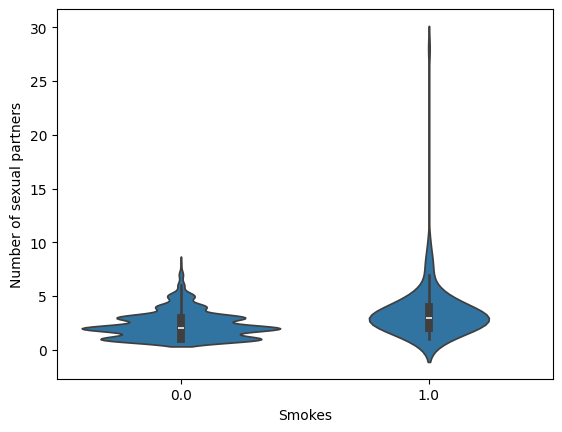

In [ ]:
sns.violinplot(data=df, x="Smokes", y="Number of sexual partners")
plt.show()

In [ ]:
df.groupby("Smokes")["Number of sexual partners"].median()

Smokes
0.0    2.0
1.0    3.0
Name: Number of sexual partners, dtype: float64

Заполним отсутствующие значения медианой в зависимости от признака Smokes

In [ ]:
df.loc[(df["Number of sexual partners"].isna()) & (df["Smokes"] == 0), "Number of sexual partners"] = 2
df.loc[(df["Number of sexual partners"].isna()) & (df["Smokes"] == 1), "Number of sexual partners"] = 3

In [ ]:
df.isna().sum()

Age                                     0
Number of sexual partners               0
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                      105
STDs:HPV                              105
STDs: Number of diagnosis               0
STDs: Time since first diagnosis      129
STDs: Time since last diagnosis       129
Dx:Cancer                               0
Dx:CIN                                  0
Dx:HPV                                  0
Dx                                      0
Cervical Cancer                         0
dtype: int64

По такому же алгоритму заполним остальные пропуски

### First sexual intercourse

In [ ]:
abs(df.corr()["First sexual intercourse"]).sort_values(ascending=False)

First sexual intercourse              1.000000
Age                                   0.374676
Number of sexual partners             0.149785
Smokes                                0.124117
STDs:syphilis                         0.106371
STDs:vaginal condylomatosis           0.075693
Dx:Cancer                             0.067944
Num of pregnancies                    0.061946
Smokes (packs/year)                   0.056480
Smokes (years)                        0.054812
Dx:HPV                                0.044527
Dx                                    0.036336
STDs:HPV                              0.035135
STDs:vulvo-perineal condylomatosis    0.033500
Dx:CIN                                0.032504
STDs:condylomatosis                   0.028957
Cervical Cancer                       0.026975
IUD (years)                           0.026229
STDs:genital herpes                   0.024828
IUD                                   0.022091
Hormonal Contraceptives               0.021355
STDs:molluscum contagiosum            0.013999
STDs:HIV                              0.013794
STDs                                  0.013005
STDs:Hepatitis B                      0.011885
STDs: Time since last diagnosis       0.010730
STDs: Number of diagnosis             0.010701
Hormonal Contraceptives (years)       0.008503
STDs (number)                         0.006800
STDs: Time since first diagnosis      0.004776
STDs:pelvic inflammatory disease      0.001057
STDs:cervical condylomatosis               NaN
STDs:AIDS                                  NaN
Name: First sexual intercourse, dtype: float64

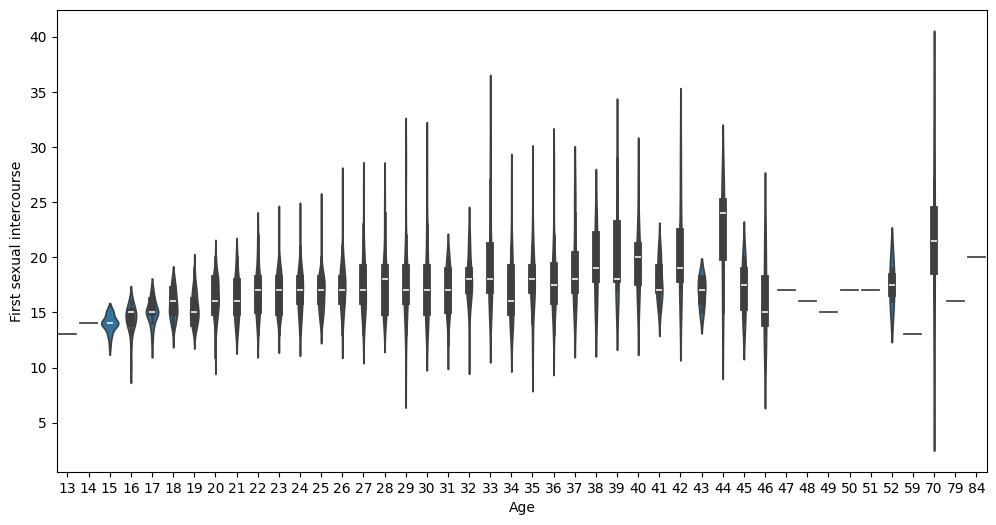

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x="Age", y="First sexual intercourse")
plt.show()

In [ ]:
df[df["Age"] < 16]["First sexual intercourse"].median()
df[(df["Age"] > 15)&(df["Age"] < 21)]["First sexual intercourse"].median()
df[(df["Age"] > 20) & (df["Age"] < 26)]["First sexual intercourse"].median()
df[(df["Age"] > 25)&(df["Age"] < 31)]["First sexual intercourse"].median()
df[(df["Age"] > 30) & (df["Age"] < 36)]["First sexual intercourse"].median()
df[(df["Age"] > 35) & (df["Age"] < 41)]["First sexual intercourse"].median()
df[(df["Age"] > 40)&(df["Age"] < 46)]["First sexual intercourse"].median()
df[(df["Age"] > 45)&(df["Age"] < 51)]["First sexual intercourse"].median()
df[(df["Age"] > 50)&(df["Age"] < 56)]["First sexual intercourse"].median()
df[(df["Age"] > 55)&(df["Age"] < 61)]["First sexual intercourse"].median()
df[(df["Age"] > 60)&(df["Age"] < 66)]["First sexual intercourse"].median()
df[(df["Age"] > 65)&(df["Age"] < 71)]["First sexual intercourse"].median()
df[(df["Age"] > 70)&(df["Age"] < 76)]["First sexual intercourse"].median()
df[(df["Age"] > 75)&(df["Age"] < 81)]["First sexual intercourse"].median()
df[(df["Age"] > 80)]["First sexual intercourse"].median()

18.0

In [ ]:
df.loc[(df["First sexual intercourse"].isna())]

Age  Number of sexual partners  First sexual intercourse  \
2     34                        1.0                       NaN   
71    34                        2.0                       NaN   
182   25                        3.0                       NaN   
221   25                        2.0                       NaN   
833   34                        1.0                       NaN   
836   37                        3.0                       NaN   
837   31                        9.0                       NaN   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
2                   1.0     0.0             0.0                  0.0   
71                  3.0     0.0             0.0                  0.0   
182                 4.0     0.0             0.0                  0.0   
221                 2.0     0.0             0.0                  0.0   
833                 0.0     0.0             0.0                  0.0   
836                 0.0     0.0             0.0                  0.0   
837                 1.0     1.0            11.0                  5.5   

     Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
2                        0.0                             0.00  0.0  ...   
71                       NaN                              NaN  NaN  ...   
182                      1.0                             0.25  0.0  ...   
221                      1.0                             3.00  0.0  ...   
833                      0.0                             0.00  0.0  ...   
836                      1.0                             0.25  0.0  ...   
837                      1.0                             0.25  0.0  ...   

     STDs:Hepatitis B  STDs:HPV  STDs: Number of diagnosis  \
2                 0.0       0.0                          0   
71                NaN       NaN                          0   
182               0.0       0.0                          0   
221               0.0       0.0                          0   
833               0.0       0.0                          0   
836               0.0       0.0                          0   
837               0.0       0.0                          0   

     STDs: Time since first diagnosis  STDs: Time since last diagnosis  \
2                                 0.0                              0.0   
71                                NaN                              NaN   
182                               0.0                              0.0   
221                               0.0                              0.0   
833                               0.0                              0.0   
836                               0.0                              0.0   
837                               0.0                              0.0   

     Dx:Cancer  Dx:CIN  Dx:HPV  Dx  Cervical Cancer  
2            0       0       0   0                0  
71           0       0       0   0                0  
182          0       0       0   0                0  
221          0       0       0   0                0  
833          0       0       0   0                0  
836          0       0       0   0                0  
837          0       0       0   0                0  

[7 rows x 33 columns]

In [ ]:
df.loc[(df["First sexual intercourse"].isna()) & (df["Age"] > 20) & (df["Age"] < 26), "First sexual intercourse"] = 17.0
df.loc[(df["First sexual intercourse"].isna()) & (df["Age"] > 30) & (df["Age"] < 36), "First sexual intercourse"] = 18.0
df.loc[(df["First sexual intercourse"].isna()) & (df["Age"] > 35) & (df["Age"] < 41), "First sexual intercourse"] = 18.0

In [ ]:
df.isna().sum()

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                      105
STDs:HPV                              105
STDs: Number of diagnosis               0
STDs: Time since first diagnosis      129
STDs: Time since last diagnosis       129
Dx:Cancer                               0
Dx:CIN                                  0
Dx:HPV                                  0
Dx                                      0
Cervical Cancer                         0
dtype: int64

### Num of pregnancies

In [ ]:
abs(df.corr()["Num of pregnancies"]).sort_values(ascending=False)

Num of pregnancies                    1.000000
Age                                   0.549224
Hormonal Contraceptives (years)       0.223729
IUD                                   0.219104
Smokes (years)                        0.177716
Hormonal Contraceptives               0.156730
IUD (years)                           0.154987
STDs:syphilis                         0.148510
Smokes (packs/year)                   0.100904
STDs: Time since last diagnosis       0.089885
Smokes                                0.084171
Number of sexual partners             0.078860
STDs: Time since first diagnosis      0.076623
First sexual intercourse              0.063562
STDs:pelvic inflammatory disease      0.059383
Cervical Cancer                       0.052156
STDs                                  0.047554
Dx:HPV                                0.046788
STDs: Number of diagnosis             0.043964
STDs:molluscum contagiosum            0.043122
STDs:condylomatosis                   0.041242
STDs:vulvo-perineal condylomatosis    0.040401
Dx:Cancer                             0.035149
STDs:Hepatitis B                      0.033757
STDs:genital herpes                   0.033757
STDs:HPV                              0.029640
STDs (number)                         0.028717
Dx                                    0.021336
Dx:CIN                                0.010985
STDs:HIV                              0.010098
STDs:vaginal condylomatosis           0.003456
STDs:cervical condylomatosis               NaN
STDs:AIDS                                  NaN
Name: Num of pregnancies, dtype: float64

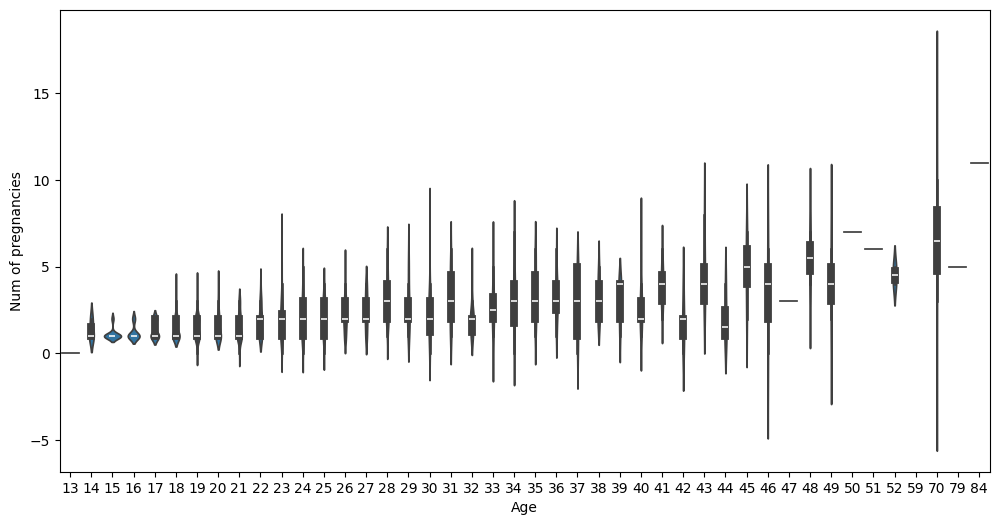

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x="Age", y="Num of pregnancies")
plt.show()

In [ ]:
df.groupby("Age")["Num of pregnancies"].median()

Age
13     0.0
14     1.0
15     1.0
16     1.0
17     1.0
18     1.0
19     1.0
20     1.0
21     1.0
22     2.0
23     2.0
24     2.0
25     2.0
26     2.0
27     2.0
28     3.0
29     2.0
30     2.0
31     3.0
32     2.0
33     2.5
34     3.0
35     3.0
36     3.0
37     3.0
38     3.0
39     4.0
40     2.0
41     4.0
42     2.0
43     4.0
44     1.5
45     5.0
46     4.0
47     3.0
48     5.5
49     4.0
50     7.0
51     6.0
52     4.5
59     NaN
70     6.5
79     5.0
84    11.0
Name: Num of pregnancies, dtype: float64

In [ ]:
df[df["Age"] < 16]["Num of pregnancies"].median()

df[(df["Age"] > 15)&(df["Age"] < 21)]["Num of pregnancies"].median()
df[(df["Age"] > 15)&(df["Age"] < 26)]["Num of pregnancies"].median()

df[(df["Age"] > 25)&(df["Age"] < 31)]["Num of pregnancies"].median()
df[(df["Age"] > 25)&(df["Age"] < 36)]["Num of pregnancies"].median()

df[(df["Age"] > 35)&(df["Age"] < 41)]["Num of pregnancies"].median()
df[(df["Age"] > 35)&(df["Age"] < 46)]["Num of pregnancies"].median()

df[(df["Age"] > 45)&(df["Age"] < 51)]["Num of pregnancies"].median()
df[(df["Age"] > 45)&(df["Age"] < 56)]["Num of pregnancies"].median()

df[(df["Age"] > 55)&(df["Age"] < 61)]["Num of pregnancies"].median()
df[(df["Age"] > 55)&(df["Age"] < 66)]["Num of pregnancies"].median()
df[(df["Age"] > 55)&(df["Age"] < 71)]["Num of pregnancies"].median()
df[(df["Age"] > 55)&(df["Age"] < 76)]["Num of pregnancies"].median()
df[(df["Age"] > 55)&(df["Age"] < 81)]["Num of pregnancies"].median()
df[(df["Age"] > 55)]["Num of pregnancies"].median()

5.0

In [ ]:
df.loc[(df["Num of pregnancies"].isna()) & (df["Age"] < 16), "Num of pregnancies"] = 0.0
df.loc[(df["Num of pregnancies"].isna()) & (df["Age"] > 15) & (df["Age"] < 26), "Num of pregnancies"] = 1.0
df.loc[(df["Num of pregnancies"].isna()) & (df["Age"] > 25) & (df["Age"] < 36), "Num of pregnancies"] = 2.0
df.loc[(df["Num of pregnancies"].isna()) & (df["Age"] > 35) & (df["Age"] < 46), "Num of pregnancies"] = 3.0
df.loc[(df["Num of pregnancies"].isna()) & (df["Age"] > 45) & (df["Age"] < 56), "Num of pregnancies"] = 4.0
df.loc[(df["Num of pregnancies"].isna()) & (df["Age"] > 55), "Num of pregnancies"] = 5.0

In [ ]:
df.isna().sum()

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                      0
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                      105
STDs:HPV                              105
STDs: Number of diagnosis               0
STDs: Time since first diagnosis      129
STDs: Time since last diagnosis       129
Dx:Cancer                               0
Dx:CIN                                  0
Dx:HPV                                  0
Dx                                      0
Cervical Cancer                         0
dtype: int64

### Smokes

In [ ]:
abs(df.corr()["Smokes"]).sort_values(ascending=False)

Smokes                                1.000000
Smokes (years)                        0.725739
Smokes (packs/year)                   0.493361
Number of sexual partners             0.252237
STDs (number)                         0.136585
STDs                                  0.127200
First sexual intercourse              0.123235
STDs: Time since last diagnosis       0.110384
STDs: Time since first diagnosis      0.108957
STDs: Number of diagnosis             0.103863
STDs:syphilis                         0.091060
STDs:Hepatitis B                      0.089502
Num of pregnancies                    0.084516
STDs:vaginal condylomatosis           0.074596
Dx                                    0.069042
STDs:vulvo-perineal condylomatosis    0.068758
Cervical Cancer                       0.066942
STDs:condylomatosis                   0.065592
STDs:HIV                              0.065422
IUD                                   0.056232
Age                                   0.055823
STDs:HPV                              0.052676
Hormonal Contraceptives (years)       0.049406
Dx:CIN                                0.042825
IUD (years)                           0.036055
STDs:pelvic inflammatory disease      0.015058
STDs:molluscum contagiosum            0.015058
STDs:genital herpes                   0.015058
Dx:HPV                                0.012558
Dx:Cancer                             0.011342
Hormonal Contraceptives               0.002298
STDs:cervical condylomatosis               NaN
STDs:AIDS                                  NaN
Name: Smokes, dtype: float64

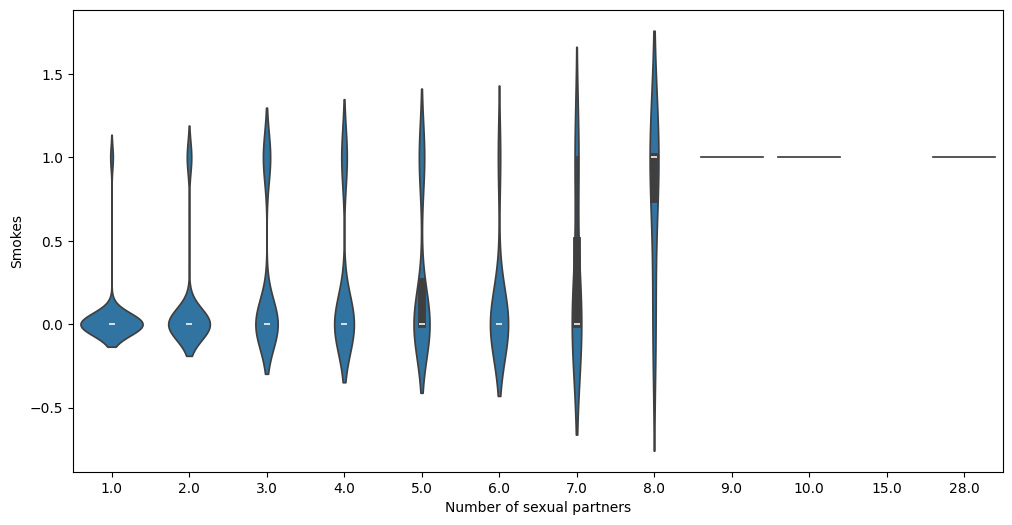

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x="Number of sexual partners", y="Smokes")
plt.show()

In [ ]:
df.groupby("Number of sexual partners")["Smokes"].median()

Number of sexual partners
1.0     0.0
2.0     0.0
3.0     0.0
4.0     0.0
5.0     0.0
6.0     0.0
7.0     0.0
8.0     1.0
9.0     1.0
10.0    1.0
15.0    NaN
28.0    1.0
Name: Smokes, dtype: float64

In [ ]:
df.loc[(df["Smokes"].isna()) & (df["Number of sexual partners"] < 8), "Smokes"] = 0.0
df.loc[(df["Smokes"].isna()) & (df["Number of sexual partners"] > 7), "Smokes"] = 1.0

In [ ]:
df.isna().sum()

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                      0
Smokes                                  0
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                      105
STDs:HPV                              105
STDs: Number of diagnosis               0
STDs: Time since first diagnosis      129
STDs: Time since last diagnosis       129
Dx:Cancer                               0
Dx:CIN                                  0
Dx:HPV                                  0
Dx                                      0
Cervical Cancer                         0
dtype: int64

### Smokes (years)

In [ ]:
df.loc[(df["Smokes (years)"].isna()) & (df["Smokes"] == 0), "Smokes (years)"] = 0.0

In [ ]:
df.isna().sum()

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                      0
Smokes                                  0
Smokes (years)                          1
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                      105
STDs:HPV                              105
STDs: Number of diagnosis               0
STDs: Time since first diagnosis      129
STDs: Time since last diagnosis       129
Dx:Cancer                               0
Dx:CIN                                  0
Dx:HPV                                  0
Dx                                      0
Cervical Cancer                         0
dtype: int64

In [ ]:
abs(df.corr()["Smokes (years)"]).sort_values(ascending=False)

Smokes (years)                        1.000000
Smokes                                0.726148
Smokes (packs/year)                   0.710465
Age                                   0.221395
Number of sexual partners             0.190841
Num of pregnancies                    0.177884
STDs:vaginal condylomatosis           0.123935
STDs: Time since last diagnosis       0.123818
STDs: Time since first diagnosis      0.115367
STDs (number)                         0.111952
STDs:Hepatitis B                      0.107241
STDs                                  0.090164
STDs:HIV                              0.077073
STDs: Number of diagnosis             0.073915
Cervical Cancer                       0.065728
Hormonal Contraceptives (years)       0.057604
Dx:HPV                                0.057312
STDs:HPV                              0.055396
Dx:Cancer                             0.054719
First sexual intercourse              0.053789
STDs:vulvo-perineal condylomatosis    0.052367
Dx                                    0.050456
STDs:condylomatosis                   0.050097
IUD (years)                           0.041685
Dx:CIN                                0.030623
IUD                                   0.030460
STDs:syphilis                         0.015452
STDs:pelvic inflammatory disease      0.010792
STDs:genital herpes                   0.010792
STDs:molluscum contagiosum            0.010792
Hormonal Contraceptives               0.008746
STDs:cervical condylomatosis               NaN
STDs:AIDS                                  NaN
Name: Smokes (years), dtype: float64

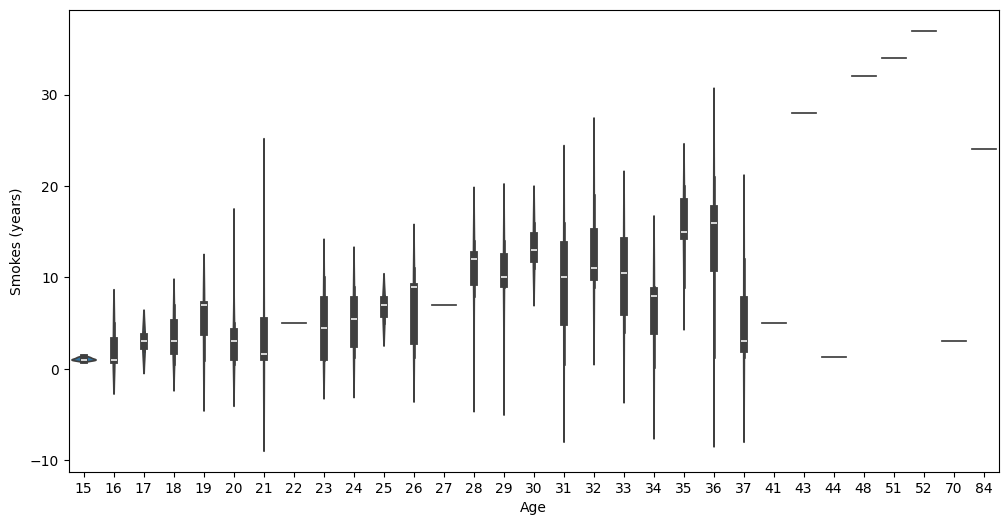

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df[df["Smokes"] == 1.0], x="Age", y="Smokes (years)")
plt.show()

In [ ]:
df[df["Smokes"] == 1.0].groupby("Age")["Smokes (years)"].median()

Age
15     1.000000
16     1.000000
17     3.000000
18     3.000000
19     7.000000
20     3.000000
21     1.633486
22     5.000000
23     4.500000
24     5.500000
25     7.000000
26     9.000000
27     7.000000
28    12.000000
29    10.000000
30    13.000000
31    10.000000
32    11.000000
33    10.500000
34     8.000000
35    15.000000
36    16.000000
37     3.000000
41     5.000000
43    28.000000
44     1.266973
48    32.000000
51    34.000000
52    37.000000
70     3.000000
84    24.000000
Name: Smokes (years), dtype: float64

In [ ]:
df[df["Smokes (years)"].isna()]

Age  Number of sexual partners  First sexual intercourse  \
186   25                       15.0                      16.0   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
186                 2.0     1.0             NaN                  NaN   

     Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
186                      0.0                              0.0  0.0  ...   

     STDs:Hepatitis B  STDs:HPV  STDs: Number of diagnosis  \
186               0.0       0.0                          1   

     STDs: Time since first diagnosis  STDs: Time since last diagnosis  \
186                               6.0                              6.0   

     Dx:Cancer  Dx:CIN  Dx:HPV  Dx  Cervical Cancer  
186          0       0       0   0                0  

[1 rows x 33 columns]

In [ ]:
df[(df["Smokes"] == 1.0) & (df["Age"] > 20) & (df["Age"] < 26)]["Smokes (years)"].median()

5.0

In [ ]:
df.loc[(df["Smokes (years)"].isna()) & (df["Age"] > 20) & (df["Age"] < 26), "Smokes (years)"] = 5.0

In [ ]:
df.isna().sum()

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                      0
Smokes                                  0
Smokes (years)                          0
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                      105
STDs:HPV                              105
STDs: Number of diagnosis               0
STDs: Time since first diagnosis      129
STDs: Time since last diagnosis       129
Dx:Cancer                               0
Dx:CIN                                  0
Dx:HPV                                  0
Dx                                      0
Cervical Cancer                         0
dtype: int64

### Smokes (packs/year)

In [ ]:
df.loc[(df["Smokes (packs/year)"].isna()) & (df["Smokes"] == 0), "Smokes (packs/year)"] = 0.0

In [ ]:
df.isna().sum()

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                      0
Smokes                                  0
Smokes (years)                          0
Smokes (packs/year)                     1
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                      105
STDs:HPV                              105
STDs: Number of diagnosis               0
STDs: Time since first diagnosis      129
STDs: Time since last diagnosis       129
Dx:Cancer                               0
Dx:CIN                                  0
Dx:HPV                                  0
Dx                                      0
Cervical Cancer                         0
dtype: int64

In [ ]:
abs(df.corr()["Smokes (packs/year)"]).sort_values(ascending=False)

Smokes (packs/year)                   1.000000
Smokes (years)                        0.710667
Smokes                                0.493806
Number of sexual partners             0.184004
Age                                   0.131716
Dx:HPV                                0.109088
Dx:Cancer                             0.107198
STDs:Hepatitis B                      0.104377
Num of pregnancies                    0.102166
STDs: Time since last diagnosis       0.075378
STDs: Time since first diagnosis      0.069746
First sexual intercourse              0.055409
STDs:HIV                              0.054944
STDs:vaginal condylomatosis           0.042890
Hormonal Contraceptives (years)       0.042751
STDs (number)                         0.042347
Dx                                    0.034312
STDs                                  0.029568
STDs: Number of diagnosis             0.024679
Dx:CIN                                0.020825
IUD (years)                           0.015940
STDs:vulvo-perineal condylomatosis    0.008979
STDs:HPV                              0.008553
STDs:condylomatosis                   0.007731
Cervical Cancer                       0.007607
STDs:pelvic inflammatory disease      0.007320
STDs:molluscum contagiosum            0.007320
STDs:genital herpes                   0.007320
IUD                                   0.007236
Hormonal Contraceptives               0.006859
STDs:syphilis                         0.004734
STDs:cervical condylomatosis               NaN
STDs:AIDS                                  NaN
Name: Smokes (packs/year), dtype: float64

In [ ]:
df[df["Smokes"] == 1.0].groupby("Number of sexual partners")["Smokes (packs/year)"].median()

Number of sexual partners
1.0     0.500000
2.0     0.950000
3.0     1.300000
4.0     1.000000
5.0     1.200000
6.0     1.600000
7.0     5.350000
8.0     2.800000
9.0     5.500000
10.0    0.513202
15.0         NaN
28.0    5.000000
Name: Smokes (packs/year), dtype: float64

In [ ]:
df[df["Smokes (packs/year)"].isna()]

Age  Number of sexual partners  First sexual intercourse  \
186   25                       15.0                      16.0   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
186                 2.0     1.0             5.0                  NaN   

     Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
186                      0.0                              0.0  0.0  ...   

     STDs:Hepatitis B  STDs:HPV  STDs: Number of diagnosis  \
186               0.0       0.0                          1   

     STDs: Time since first diagnosis  STDs: Time since last diagnosis  \
186                               6.0                              6.0   

     Dx:Cancer  Dx:CIN  Dx:HPV  Dx  Cervical Cancer  
186          0       0       0   0                0  

[1 rows x 33 columns]

In [ ]:
df[df['Number of sexual partners'] >= 9]

Age  Number of sexual partners  First sexual intercourse  \
186   25                       15.0                      16.0   
193   26                       10.0                      16.0   
467   16                       28.0                      10.0   
837   31                        9.0                      18.0   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
186                 2.0     1.0             5.0                  NaN   
193                 1.0     1.0             9.0             0.513202   
467                 1.0     1.0             5.0             5.000000   
837                 1.0     1.0            11.0             5.500000   

     Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
186                      0.0                             0.00  0.0  ...   
193                      NaN                              NaN  NaN  ...   
467                      0.0                             0.00  0.0  ...   
837                      1.0                             0.25  0.0  ...   

     STDs:Hepatitis B  STDs:HPV  STDs: Number of diagnosis  \
186               0.0       0.0                          1   
193               NaN       NaN                          0   
467               0.0       0.0                          0   
837               0.0       0.0                          0   

     STDs: Time since first diagnosis  STDs: Time since last diagnosis  \
186                               6.0                              6.0   
193                               NaN                              NaN   
467                               0.0                              0.0   
837                               0.0                              0.0   

     Dx:Cancer  Dx:CIN  Dx:HPV  Dx  Cervical Cancer  
186          0       0       0   0                0  
193          0       0       0   0                0  
467          0       0       0   0                0  
837          0       0       0   0                0  

[4 rows x 33 columns]

In [ ]:
df[(df["Smokes"] == 1.0) & (df['Number of sexual partners'] >= 9)]["Smokes (packs/year)"].median() #5

5.0

In [ ]:
df.loc[(df["Smokes (packs/year)"].isna()) & (df['Number of sexual partners'] >= 9), "Smokes (packs/year)"] = 5.0

In [ ]:
df.iloc[186]

Age                                   25.0
Number of sexual partners             15.0
First sexual intercourse              16.0
Num of pregnancies                     2.0
Smokes                                 1.0
Smokes (years)                         5.0
Smokes (packs/year)                    5.0
Hormonal Contraceptives                0.0
Hormonal Contraceptives (years)        0.0
IUD                                    0.0
IUD (years)                            0.0
STDs                                   1.0
STDs (number)                          1.0
STDs:condylomatosis                    1.0
STDs:cervical condylomatosis           0.0
STDs:vaginal condylomatosis            0.0
STDs:vulvo-perineal condylomatosis     1.0
STDs:syphilis                          0.0
STDs:pelvic inflammatory disease       0.0
STDs:genital herpes                    0.0
STDs:molluscum contagiosum             0.0
STDs:AIDS                              0.0
STDs:HIV                               0.0
STDs:Hepatitis B                       0.0
STDs:HPV                               0.0
STDs: Number of diagnosis              1.0
STDs: Time since first diagnosis       6.0
STDs: Time since last diagnosis        6.0
Dx:Cancer                              0.0
Dx:CIN                                 0.0
Dx:HPV                                 0.0
Dx                                     0.0
Cervical Cancer                        0.0
Name: 186, dtype: float64

In [ ]:
df.isna().sum()

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                      0
Smokes                                  0
Smokes (years)                          0
Smokes (packs/year)                     0
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                      105
STDs:HPV                              105
STDs: Number of diagnosis               0
STDs: Time since first diagnosis      129
STDs: Time since last diagnosis       129
Dx:Cancer                               0
Dx:CIN                                  0
Dx:HPV                                  0
Dx                                      0
Cervical Cancer                         0
dtype: int64

### Hormonal Contraceptives

In [ ]:
abs(df.corr()["Hormonal Contraceptives"]).sort_values(ascending=False)

Hormonal Contraceptives               1.000000
Hormonal Contraceptives (years)       0.454039
Num of pregnancies                    0.140746
STDs:HIV                              0.081297
Age                                   0.068056
STDs:vaginal condylomatosis           0.059489
STDs (number)                         0.054267
STDs:Hepatitis B                      0.048818
STDs:molluscum contagiosum            0.048818
STDs: Number of diagnosis             0.046079
STDs:HPV                              0.039227
Dx:HPV                                0.039175
IUD (years)                           0.034021
IUD                                   0.034004
STDs                                  0.033588
STDs:pelvic inflammatory disease      0.027719
STDs:genital herpes                   0.027719
Dx:Cancer                             0.026447
First sexual intercourse              0.020693
STDs:vulvo-perineal condylomatosis    0.014150
STDs: Time since first diagnosis      0.010463
Smokes (years)                        0.010389
STDs:condylomatosis                   0.009590
Number of sexual partners             0.006457
Smokes                                0.004950
STDs:syphilis                         0.003971
Dx:CIN                                0.003536
Smokes (packs/year)                   0.003323
STDs: Time since last diagnosis       0.002708
Dx                                    0.001801
Cervical Cancer                       0.001090
STDs:cervical condylomatosis               NaN
STDs:AIDS                                  NaN
Name: Hormonal Contraceptives, dtype: float64

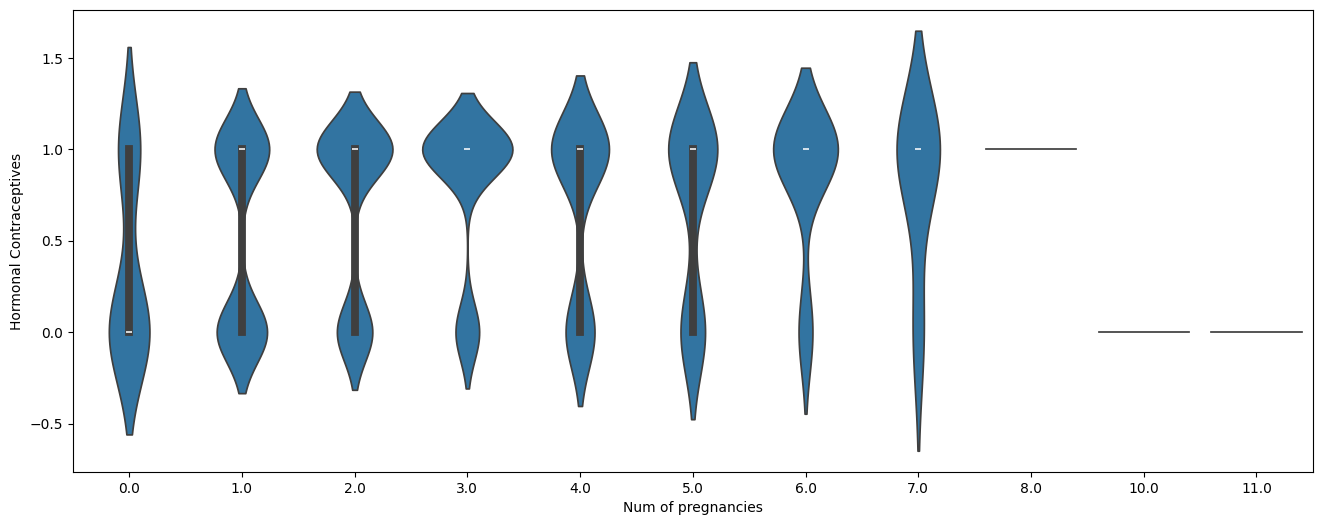

In [ ]:
plt.figure(figsize=(16, 6))
sns.violinplot(data=df, x="Num of pregnancies", y="Hormonal Contraceptives")
plt.show()

In [ ]:
df.groupby("Num of pregnancies")["Hormonal Contraceptives"].median()

Num of pregnancies
0.0     0.0
1.0     1.0
2.0     1.0
3.0     1.0
4.0     1.0
5.0     1.0
6.0     1.0
7.0     1.0
8.0     1.0
10.0    0.0
11.0    0.0
Name: Hormonal Contraceptives, dtype: float64

In [ ]:
df[(df["Num of pregnancies"] < 1)]["Hormonal Contraceptives"].median() #0.0
df[(df["Num of pregnancies"] > 0) & (df["Num of pregnancies"] < 9)]["Hormonal Contraceptives"].median() #1.0
df[(df["Num of pregnancies"] > 8)]["Hormonal Contraceptives"].median() #0.0

0.0

In [ ]:
df.loc[(df["Hormonal Contraceptives"].isna()) & (df["Num of pregnancies"] < 1), "Hormonal Contraceptives"] = 0.0
df.loc[(df["Hormonal Contraceptives"].isna()) & (df["Num of pregnancies"] > 0) & (df["Num of pregnancies"] < 9), "Hormonal Contraceptives"] = 1.0
df.loc[(df["Hormonal Contraceptives"].isna()) & (df["Num of pregnancies"] > 8), "Hormonal Contraceptives"] = 0.0

In [ ]:
df.isna().sum()

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                      0
Smokes                                  0
Smokes (years)                          0
Smokes (packs/year)                     0
Hormonal Contraceptives                 0
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                      105
STDs:HPV                              105
STDs: Number of diagnosis               0
STDs: Time since first diagnosis      129
STDs: Time since last diagnosis       129
Dx:Cancer                               0
Dx:CIN                                  0
Dx:HPV                                  0
Dx                                      0
Cervical Cancer                         0
dtype: int64

### Hormonal Contraceptives (years)

In [ ]:
df.loc[(df["Hormonal Contraceptives (years)"].isna()) & (df["Hormonal Contraceptives"] == 0), "Hormonal Contraceptives (years)"] = 0.0

In [ ]:
df.isna().sum()

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                      0
Smokes                                  0
Smokes (years)                          0
Smokes (packs/year)                     0
Hormonal Contraceptives                 0
Hormonal Contraceptives (years)       107
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                      105
STDs:HPV                              105
STDs: Number of diagnosis               0
STDs: Time since first diagnosis      129
STDs: Time since last diagnosis       129
Dx:Cancer                               0
Dx:CIN                                  0
Dx:HPV                                  0
Dx                                      0
Cervical Cancer                         0
dtype: int64

In [ ]:
abs(df.corr()["Hormonal Contraceptives (years)"]).sort_values(ascending=False)

Hormonal Contraceptives (years)       1.000000
Hormonal Contraceptives               0.454468
Age                                   0.291742
Num of pregnancies                    0.229086
IUD                                   0.099262
Cervical Cancer                       0.085971
Dx:HPV                                0.064755
Smokes (years)                        0.057026
Dx:Cancer                             0.056116
STDs:HPV                              0.054322
Smokes                                0.048113
STDs: Time since last diagnosis       0.045768
Smokes (packs/year)                   0.041190
STDs:vaginal condylomatosis           0.039753
STDs:HIV                              0.039242
STDs: Time since first diagnosis      0.036925
STDs:molluscum contagiosum            0.022367
STDs:Hepatitis B                      0.022367
Number of sexual partners             0.021998
STDs:genital herpes                   0.019836
STDs (number)                         0.015887
STDs:pelvic inflammatory disease      0.014773
Dx                                    0.013084
STDs: Number of diagnosis             0.010874
STDs:vulvo-perineal condylomatosis    0.010437
First sexual intercourse              0.008411
STDs:condylomatosis                   0.008376
STDs:syphilis                         0.004234
Dx:CIN                                0.003672
STDs                                  0.000911
IUD (years)                           0.000703
STDs:cervical condylomatosis               NaN
STDs:AIDS                                  NaN
Name: Hormonal Contraceptives (years), dtype: float64

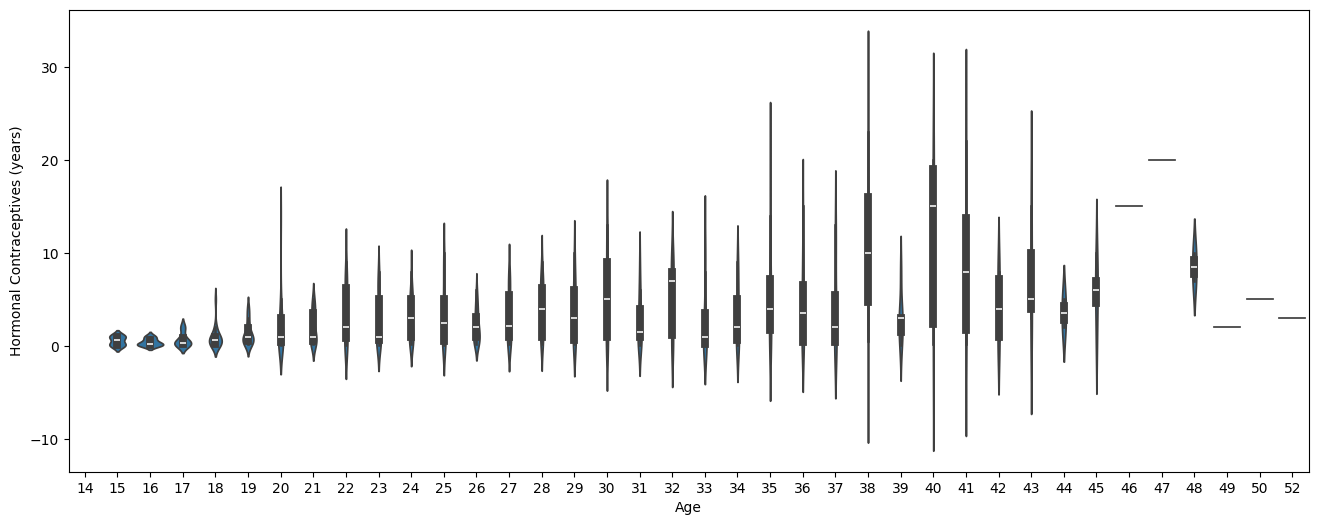

In [ ]:
plt.figure(figsize=(16, 6))
sns.violinplot(data=df[df["Hormonal Contraceptives"] == 1.0], x="Age", y="Hormonal Contraceptives (years)")
plt.show()

In [ ]:
df[df["Hormonal Contraceptives"] == 1.0].groupby("Age")["Hormonal Contraceptives (years)"].median()

Age
14        NaN
15     0.5800
16     0.2500
17     0.2900
18     0.5800
19     1.0000
20     1.0000
21     1.0000
22     2.0000
23     1.0000
24     3.0000
25     2.5000
26     2.0000
27     2.1411
28     4.0000
29     3.0000
30     5.0000
31     1.5000
32     7.0000
33     1.0000
34     2.0000
35     4.0000
36     3.5000
37     2.0000
38    10.0000
39     3.0000
40    15.0000
41     8.0000
42     4.0000
43     5.0000
44     3.5000
45     6.0000
46    15.0000
47    20.0000
48     8.5000
49     2.0000
50     5.0000
52     3.0000
Name: Hormonal Contraceptives (years), dtype: float64

In [ ]:
df[(df["Hormonal Contraceptives"] == 1.0) & (df["Age"] < 16)]["Hormonal Contraceptives (years)"].median() #0.58

df[(df["Hormonal Contraceptives"] == 1.0) & (df["Age"] > 15)&(df["Age"] < 21)]["Hormonal Contraceptives (years)"].median() #0.66
df[(df["Hormonal Contraceptives"] == 1.0) & (df["Age"] > 20)&(df["Age"] < 26)]["Hormonal Contraceptives (years)"].median() #2.0

df[(df["Hormonal Contraceptives"] == 1.0) & (df["Age"] > 25)&(df["Age"] < 31)]["Hormonal Contraceptives (years)"].median() #3.0
df[(df["Hormonal Contraceptives"] == 1.0) & (df["Age"] > 30)&(df["Age"] < 36)]["Hormonal Contraceptives (years)"].median() #2.0
df[(df["Hormonal Contraceptives"] == 1.0) & (df["Age"] > 35)&(df["Age"] < 41)]["Hormonal Contraceptives (years)"].median() #3.0

df[(df["Hormonal Contraceptives"] == 1.0) & (df["Age"] > 40)]["Hormonal Contraceptives (years)"].median() #6.0

6.0

In [ ]:
df[(df["Hormonal Contraceptives (years)"].isna()) & (df["Age"] > 46)]

Empty DataFrame
Columns: [Age, Number of sexual partners, First sexual intercourse, Num of pregnancies, Smokes, Smokes (years), Smokes (packs/year), Hormonal Contraceptives, Hormonal Contraceptives (years), IUD, IUD (years), STDs, STDs (number), STDs:condylomatosis, STDs:cervical condylomatosis, STDs:vaginal condylomatosis, STDs:vulvo-perineal condylomatosis, STDs:syphilis, STDs:pelvic inflammatory disease, STDs:genital herpes, STDs:molluscum contagiosum, STDs:AIDS, STDs:HIV, STDs:Hepatitis B, STDs:HPV, STDs: Number of diagnosis, STDs: Time since first diagnosis, STDs: Time since last diagnosis, Dx:Cancer, Dx:CIN, Dx:HPV, Dx, Cervical Cancer]
Index: []

[0 rows x 33 columns]

In [ ]:
df.loc[(df["Hormonal Contraceptives (years)"].isna()) & (df["Age"] < 16), "Hormonal Contraceptives (years)"] = 0.58
df.loc[(df["Hormonal Contraceptives (years)"].isna()) & (df["Age"] > 15) & (df["Age"] < 21), "Hormonal Contraceptives (years)"] = 0.66
df.loc[(df["Hormonal Contraceptives (years)"].isna()) & (df["Age"] > 20) & (df["Age"] < 26), "Hormonal Contraceptives (years)"] = 2.0
df.loc[(df["Hormonal Contraceptives (years)"].isna()) & (df["Age"] > 25) & (df["Age"] < 31), "Hormonal Contraceptives (years)"] = 3.0
df.loc[(df["Hormonal Contraceptives (years)"].isna()) & (df["Age"] > 30) & (df["Age"] < 36), "Hormonal Contraceptives (years)"] = 2.0
df.loc[(df["Hormonal Contraceptives (years)"].isna()) & (df["Age"] > 35) & (df["Age"] < 41), "Hormonal Contraceptives (years)"] = 3.0
df.loc[(df["Hormonal Contraceptives (years)"].isna()) & (df["Age"] > 40) & (df["Age"] < 46), "Hormonal Contraceptives (years)"] = 6.0

In [ ]:
df.isna().sum()

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                      0
Smokes                                  0
Smokes (years)                          0
Smokes (packs/year)                     0
Hormonal Contraceptives                 0
Hormonal Contraceptives (years)         0
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                      105
STDs:HPV                              105
STDs: Number of diagnosis               0
STDs: Time since first diagnosis      129
STDs: Time since last diagnosis       129
Dx:Cancer                               0
Dx:CIN                                  0
Dx:HPV                                  0
Dx                                      0
Cervical Cancer                         0
dtype: int64

### IUD

In [ ]:
abs(df.corr()["IUD"]).sort_values(ascending=False)

IUD                                   1.000000
IUD (years)                           0.746478
Age                                   0.280954
Num of pregnancies                    0.229159
Dx                                    0.152086
Dx:Cancer                             0.110728
Hormonal Contraceptives (years)       0.099469
STDs: Time since last diagnosis       0.084995
Cervical Cancer                       0.079601
STDs:condylomatosis                   0.079059
STDs: Time since first diagnosis      0.077077
Dx:CIN                                0.063405
STDs:vulvo-perineal condylomatosis    0.063343
Dx:HPV                                0.059900
Smokes                                0.058419
STDs                                  0.056257
STDs: Number of diagnosis             0.045932
Hormonal Contraceptives               0.033851
Number of sexual partners             0.033433
STDs (number)                         0.033080
STDs:vaginal condylomatosis           0.032103
Smokes (years)                        0.029989
STDs:syphilis                         0.023617
First sexual intercourse              0.022673
STDs:HPV                              0.018583
STDs:pelvic inflammatory disease      0.013131
STDs:molluscum contagiosum            0.013131
STDs:Hepatitis B                      0.013131
STDs:genital herpes                   0.013131
STDs:HIV                              0.009445
Smokes (packs/year)                   0.006270
STDs:cervical condylomatosis               NaN
STDs:AIDS                                  NaN
Name: IUD, dtype: float64

In [ ]:
df.groupby("Age")["IUD"].median()

Age
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    1.0
39    0.0
40    0.0
41    0.0
42    0.0
43    0.0
44    0.0
45    0.0
46    0.0
47    0.0
48    0.5
49    0.0
50    0.0
51    1.0
52    0.5
59    1.0
70    0.5
79    0.0
84    0.0
Name: IUD, dtype: float64

In [ ]:
df[(df["Age"] < 16)]["Hormonal Contraceptives (years)"].median() #0

df[(df["Age"] > 15)&(df["Age"] < 21)]["IUD"].median() #0
df[(df["Age"] > 20)&(df["Age"] < 26)]["IUD"].median() #0

df[(df["Age"] > 25)&(df["Age"] < 31)]["IUD"].median() #0
df[(df["Age"] > 30)&(df["Age"] < 36)]["IUD"].median() #0
df[(df["Age"] > 35)&(df["Age"] < 41)]["IUD"].median() #0

df[(df["Age"] > 40)&(df["Age"] < 46)]["IUD"].median() #0

0.0

Так как в данном случае заполнение на основе корреляции с признаком Age означает заполнение всех пропусков нулями, попробуем другой подход.
Заполним пропуски модой, и создадим признак IUD missing, означающий, что значение пропущено

In [ ]:
df['IUD_missing'] = np.where(df['IUD'].isnull(), 1, 0)

In [ ]:
df[df['IUD'].isnull()]

Age  Number of sexual partners  First sexual intercourse  \
9     44                        3.0                      15.0   
41    37                        2.0                      18.0   
71    34                        2.0                      18.0   
74    35                        2.0                      17.0   
90    36                        1.0                      13.0   
..   ...                        ...                       ...   
792   23                        3.0                      15.0   
794   20                        2.0                      16.0   
807   36                        2.0                      18.0   
814   16                        1.0                      12.0   
816   21                        2.0                      19.0   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
9                   3.0     1.0        1.266973                 2.80   
41                  3.0     0.0        0.000000                 0.00   
71                  3.0     0.0        0.000000                 0.00   
74                  2.0     1.0       15.000000                 0.32   
90                  6.0     0.0        0.000000                 0.00   
..                  ...     ...             ...                  ...   
792                 1.0     1.0        5.000000                 0.75   
794                 1.0     0.0        0.000000                 0.00   
807                 3.0     1.0       19.000000                 7.60   
814                 1.0     0.0        0.000000                 0.00   
816                 1.0     0.0        0.000000                 0.00   

     Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
9                        0.0                             0.00  NaN  ...   
41                       0.0                             0.00  NaN  ...   
71                       1.0                             2.00  NaN  ...   
74                       1.0                             2.00  NaN  ...   
90                       1.0                             3.00  NaN  ...   
..                       ...                              ...  ...  ...   
792                      1.0                             2.00  NaN  ...   
794                      1.0                             0.66  NaN  ...   
807                      1.0                             8.00  NaN  ...   
814                      1.0                             0.42  NaN  ...   
816                      1.0                             0.50  NaN  ...   

     STDs:HPV  STDs: Number of diagnosis  STDs: Time since first diagnosis  \
9         0.0                          0                               0.0   
41        0.0                          1                              15.0   
71        NaN                          0                               NaN   
74        NaN                          0                               NaN   
90        NaN                          0                               NaN   
..        ...                        ...                               ...   
792       NaN                          0                               NaN   
794       NaN                          0                               NaN   
807       NaN                          0                               NaN   
814       NaN                          0                               NaN   
816       NaN                          0                               NaN   

     STDs: Time since last diagnosis  Dx:Cancer  Dx:CIN  Dx:HPV  Dx  \
9                                0.0          0       0       0   0   
41                              15.0          0       1       0   1   
71                               NaN          0       0       0   0   
74                               NaN          0       0       0   0   
90                               NaN          0       0       0   0   
..                               ...        ...     ...     ...  ..   
792                     

In [ ]:
df['IUD_missing'].value_counts()

IUD_missing
0    741
1    117
Name: count, dtype: int64

In [ ]:
mode_iud = df['IUD'].mode()[0]
mode_iud

0.0

In [ ]:
df['IUD'].fillna(mode_iud, inplace=True)

In [ ]:
df['IUD'].value_counts()

IUD
0.0    775
1.0     83
Name: count, dtype: int64

In [ ]:
df.isna().sum()

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                      0
Smokes                                  0
Smokes (years)                          0
Smokes (packs/year)                     0
Hormonal Contraceptives                 0
Hormonal Contraceptives (years)         0
IUD                                     0
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                      105
STDs:HPV                              105
STDs: Number of diagnosis               0
STDs: Time since first diagnosis      129
STDs: Time since last diagnosis       129
Dx:Cancer                               0
Dx:CIN                                  0
Dx:HPV                                  0
Dx                                      0
Cervical Cancer                         0
IUD_missing                             0
dtype: int64

### IUD (years)

Так как мы уже создали признак IUD missing, означающий отсутствие информации о наличии спирали, то просто заполним пропуски нулями.

In [ ]:
df['IUD (years)'] = df['IUD (years)'].fillna(0)

In [ ]:
df['IUD (years)'].value_counts()

IUD (years)
0.00     775
3.00      11
2.00      10
5.00       9
1.00       8
8.00       7
7.00       7
6.00       5
4.00       5
11.00      3
0.08       2
0.50       2
0.33       1
9.00       1
0.41       1
0.16       1
0.91       1
1.50       1
10.00      1
12.00      1
15.00      1
0.25       1
17.00      1
19.00      1
0.58       1
0.17       1
Name: count, dtype: int64

In [ ]:
df.isna().sum()

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                      0
Smokes                                  0
Smokes (years)                          0
Smokes (packs/year)                     0
Hormonal Contraceptives                 0
Hormonal Contraceptives (years)         0
IUD                                     0
IUD (years)                             0
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                      105
STDs:HPV                              105
STDs: Number of diagnosis               0
STDs: Time since first diagnosis      129
STDs: Time since last diagnosis       129
Dx:Cancer                               0
Dx:CIN                                  0
Dx:HPV                                  0
Dx                                      0
Cervical Cancer                         0
IUD_missing                             0
dtype: int64

### Признаки ЗППП

In [ ]:
df[(df["STDs"].isna()) & (df["STDs: Number of diagnosis"] > 0)]

Empty DataFrame
Columns: [Age, Number of sexual partners, First sexual intercourse, Num of pregnancies, Smokes, Smokes (years), Smokes (packs/year), Hormonal Contraceptives, Hormonal Contraceptives (years), IUD, IUD (years), STDs, STDs (number), STDs:condylomatosis, STDs:cervical condylomatosis, STDs:vaginal condylomatosis, STDs:vulvo-perineal condylomatosis, STDs:syphilis, STDs:pelvic inflammatory disease, STDs:genital herpes, STDs:molluscum contagiosum, STDs:AIDS, STDs:HIV, STDs:Hepatitis B, STDs:HPV, STDs: Number of diagnosis, STDs: Time since first diagnosis, STDs: Time since last diagnosis, Dx:Cancer, Dx:CIN, Dx:HPV, Dx, Cervical Cancer, IUD_missing]
Index: []

[0 rows x 34 columns]

Есть основания полагать, что отсутствие значений означает отсутсвие заболеваний, так как у всех пропущенных значений в столбце STDs: Number of diagnosis указан 0.

Но посмотрим всё же на корреляцию признаков.

In [ ]:
abs(df.corr()["STDs"]).sort_values(ascending=False)

STDs                                  1.000000
STDs: Number of diagnosis             0.964811
STDs (number)                         0.945078
STDs:condylomatosis                   0.727645
STDs:vulvo-perineal condylomatosis    0.718822
STDs: Time since first diagnosis      0.705943
STDs: Time since last diagnosis       0.695170
STDs:HIV                              0.457098
STDs:syphilis                         0.457098
STDs:vaginal condylomatosis           0.213455
IUD_missing                           0.159912
STDs:HPV                              0.150734
Smokes                                0.131916
Cervical Cancer                       0.114143
STDs:pelvic inflammatory disease      0.106514
STDs:molluscum contagiosum            0.106514
STDs:Hepatitis B                      0.106514
STDs:genital herpes                   0.106514
Smokes (years)                        0.093277
Number of sexual partners             0.059388
Num of pregnancies                    0.056436
IUD                                   0.045557
Smokes (packs/year)                   0.037012
Hormonal Contraceptives               0.016082
First sexual intercourse              0.013561
IUD (years)                           0.011937
Dx                                    0.010401
Age                                   0.010160
Dx:CIN                                0.006792
Dx:HPV                                0.003165
Dx:Cancer                             0.003165
Hormonal Contraceptives (years)       0.003129
STDs:cervical condylomatosis               NaN
STDs:AIDS                                  NaN
Name: STDs, dtype: float64

Видим, что признак STDs имеет сильную корреляцию с признаками STDs (number)	и STDs: Number of diagnosis. Но признак STDs (number) имеет те же пропуски, что и STDs. А вот признак STDs: Number of diagnosis пропусков не имеет, и на его основе можно заполнить пропуски в STDs.

In [ ]:
df.groupby("STDs: Number of diagnosis")["STDs"].median()

STDs: Number of diagnosis
0    0.0
1    1.0
2    1.0
3    1.0
Name: STDs, dtype: float64

In [ ]:
df[(df["STDs"].isna())]["STDs: Number of diagnosis"].value_counts()

STDs: Number of diagnosis
0    105
Name: count, dtype: int64

Видим, что у всех пропущенных значений STDs: Number of diagnoses = 0, следовательно ЗППП у них нет. Заполним пропуски нулями.

In [ ]:
df['STDs'] = df['STDs'].fillna(df['STDs: Number of diagnosis'].apply(lambda x: 1 if x > 0 else 0))

In [ ]:
df.isna().sum()

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                      0
Smokes                                  0
Smokes (years)                          0
Smokes (packs/year)                     0
Hormonal Contraceptives                 0
Hormonal Contraceptives (years)         0
IUD                                     0
IUD (years)                             0
STDs                                    0
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                      105
STDs:HPV                              105
STDs: Number of diagnosis               0
STDs: Time since first diagnosis      129
STDs: Time since last diagnosis       129
Dx:Cancer                               0
Dx:CIN                                  0
Dx:HPV                                  0
Dx                                      0
Cervical Cancer                         0
IUD_missing                             0
dtype: int64

In [ ]:
df[df["STDs (number)"].isna()]["STDs"].value_counts()

STDs
0.0    105
Name: count, dtype: int64

Видим, что все пропуски заполнились нулями, как и предполагалось.
Тогда и остальные пропуски следует заполнить нулями, так как STDs == 0 означает, что ЗППП у пациентки нет.

In [ ]:
df['STDs (number)'] = df['STDs (number)'].fillna(0)
df['STDs:condylomatosis'] = df['STDs:condylomatosis'].fillna(0)
df['STDs:cervical condylomatosis'] = df['STDs:cervical condylomatosis'].fillna(0)
df['STDs:vaginal condylomatosis'] = df['STDs:vaginal condylomatosis'].fillna(0)
df['STDs:vulvo-perineal condylomatosis'] = df['STDs:vulvo-perineal condylomatosis'].fillna(0)
df['STDs:syphilis'] = df['STDs:syphilis'].fillna(0)
df['STDs:pelvic inflammatory disease'] = df['STDs:pelvic inflammatory disease'].fillna(0)
df['STDs:genital herpes'] = df['STDs:genital herpes'].fillna(0)
df['STDs:molluscum contagiosum'] = df['STDs:molluscum contagiosum'].fillna(0)
df['STDs:AIDS'] = df['STDs:AIDS'].fillna(0)
df['STDs:HIV'] = df['STDs:HIV'].fillna(0)
df['STDs:Hepatitis B'] = df['STDs:Hepatitis B'].fillna(0)

In [ ]:
df.isna().sum()

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                      0
Smokes                                  0
Smokes (years)                          0
Smokes (packs/year)                     0
Hormonal Contraceptives                 0
Hormonal Contraceptives (years)         0
IUD                                     0
IUD (years)                             0
STDs                                    0
STDs (number)                           0
STDs:condylomatosis                     0
STDs:cervical condylomatosis            0
STDs:vaginal condylomatosis             0
STDs:vulvo-perineal condylomatosis      0
STDs:syphilis                           0
STDs:pelvic inflammatory disease        0
STDs:genital herpes                     0
STDs:molluscum contagiosum              0
STDs:AIDS                               0
STDs:HIV                                0
STDs:Hepatitis B                        0
STDs:HPV                              105
STDs: Number of diagnosis               0
STDs: Time since first diagnosis      129
STDs: Time since last diagnosis       129
Dx:Cancer                               0
Dx:CIN                                  0
Dx:HPV                                  0
Dx                                      0
Cervical Cancer                         0
IUD_missing                             0
dtype: int64

In [ ]:
df[df["STDs:HPV"].isna()]["STDs:Hepatitis B"].value_counts()

STDs:Hepatitis B
0.0    105
Name: count, dtype: int64

Столбец STDs:HPV нужно проверить отдельно, так как существует столбец Dx:HPV, означающий наличие ВПЧ в анамнезе.

In [ ]:
df[df["Dx:HPV"] == 1]["STDs:HPV"].value_counts()

STDs:HPV
0.0    16
1.0     2
Name: count, dtype: int64

In [ ]:
abs(df.corr()["STDs:HPV"]).sort_values(ascending=False)

STDs:HPV                              1.000000
Dx:Cancer                             0.329763
Dx:HPV                                0.329763
STDs: Time since last diagnosis       0.230559
STDs: Time since first diagnosis      0.221328
STDs                                  0.150734
Dx                                    0.140786
STDs: Number of diagnosis             0.137600
STDs (number)                         0.124573
Smokes (years)                        0.055298
Hormonal Contraceptives (years)       0.054322
Smokes                                0.052499
Age                                   0.040258
Hormonal Contraceptives               0.038472
First sexual intercourse              0.035040
Num of pregnancies                    0.027797
Cervical Cancer                       0.019844
IUD                                   0.018163
Number of sexual partners             0.014822
IUD (years)                           0.013565
STDs:condylomatosis                   0.012856
STDs:vulvo-perineal condylomatosis    0.012700
Smokes (packs/year)                   0.008666
STDs:HIV                              0.008076
STDs:syphilis                         0.008076
IUD_missing                           0.007604
Dx:CIN                                0.005348
STDs:vaginal condylomatosis           0.003771
STDs:Hepatitis B                      0.001882
STDs:genital herpes                   0.001882
STDs:molluscum contagiosum            0.001882
STDs:pelvic inflammatory disease      0.001882
STDs:cervical condylomatosis               NaN
STDs:AIDS                                  NaN
Name: STDs:HPV, dtype: float64

Как видим, STDs:HPV коррелирует с Dx:HPV.

In [ ]:
df.groupby("Dx:HPV")["STDs:HPV"].median()

Dx:HPV
0    0.0
1    0.0
Name: STDs:HPV, dtype: float64

In [ ]:
df.groupby("Dx:HPV")["STDs:HPV"].mean()

Dx:HPV
0    0.000000
1    0.111111
Name: STDs:HPV, dtype: float64

In [ ]:
df[df["STDs:HPV"].isna()]["Dx:HPV"].value_counts()

Dx:HPV
0    105
Name: count, dtype: int64

Так как у пропущенных значений Dx:HPV == 0, то заполним их нулями.

In [ ]:
df["STDs:HPV"].value_counts()

STDs:HPV
0.0    751
1.0      2
Name: count, dtype: int64

In [ ]:
df['STDs:HPV'] = df['STDs:HPV'].fillna(0)

In [ ]:
df["STDs:HPV"].value_counts()

STDs:HPV
0.0    856
1.0      2
Name: count, dtype: int64

In [ ]:
df.isna().sum()

Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                      0
Smokes                                  0
Smokes (years)                          0
Smokes (packs/year)                     0
Hormonal Contraceptives                 0
Hormonal Contraceptives (years)         0
IUD                                     0
IUD (years)                             0
STDs                                    0
STDs (number)                           0
STDs:condylomatosis                     0
STDs:cervical condylomatosis            0
STDs:vaginal condylomatosis             0
STDs:vulvo-perineal condylomatosis      0
STDs:syphilis                           0
STDs:pelvic inflammatory disease        0
STDs:genital herpes                     0
STDs:molluscum contagiosum              0
STDs:AIDS                               0
STDs:HIV                                0
STDs:Hepatitis B                        0
STDs:HPV                                0
STDs: Number of diagnosis               0
STDs: Time since first diagnosis      129
STDs: Time since last diagnosis       129
Dx:Cancer                               0
Dx:CIN                                  0
Dx:HPV                                  0
Dx                                      0
Cervical Cancer                         0
IUD_missing                             0
dtype: int64

### STDs: Time since first diagnosis и STDs: Time since first diagnosis

In [ ]:
df[((df['STDs'] == 1) | (df['Dx:HPV'] == 1)) & (df['STDs: Time since first diagnosis'].isna())]

Age  Number of sexual partners  First sexual intercourse  \
3     52                        5.0                      16.0   
8     45                        1.0                      20.0   
18    42                        2.0                      20.0   
23    40                        1.0                      20.0   
32    37                        3.0                      17.0   
63    33                        1.0                      19.0   
64    38                        2.0                      15.0   
109   32                        2.0                      17.0   
188   27                        5.0                      19.0   
257   22                        3.0                      17.0   
335   29                        2.0                      18.0   
372   21                        5.0                      13.0   
455   18                        1.0                      16.0   
480   30                        4.0                      13.0   
546   21                        1.0                      17.0   
578   19                        1.0                      18.0   
610   21                        2.0                      18.0   
669   38                        3.0                      22.0   
727   31                        2.0                      19.0   
738   27                        6.0                      17.0   
763   41                        3.0                      18.0   
775   27                        2.0                      14.0   
797   33                        3.0                      19.0   
849   32                        3.0                      18.0   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
3                   4.0     1.0       37.000000            37.000000   
8                   5.0     0.0        0.000000             0.000000   
18                  3.0     0.0        0.000000             0.000000   
23                  2.0     0.0        0.000000             0.000000   
32                  5.0     1.0        1.266973             0.513202   
63                  2.0     0.0        0.000000             0.000000   
64                  4.0     0.0        0.000000             0.000000   
109                 1.0     0.0        0.000000             0.000000   
188                 2.0     0.0        0.000000             0.000000   
257                 1.0     0.0        0.000000             0.000000   
335                 4.0     0.0        0.000000             0.000000   
372                 3.0     1.0        1.266973             0.513202   
455                 2.0     0.0        0.000000             0.000000   
480                 8.0     0.0        0.000000             0.000000   
546                 1.0     0.0        0.000000             0.000000   
578                 1.0     0.0        0.000000             0.000000   
610                 3.0     0.0        0.000000             0.000000   
669                 2.0     0.0        0.000000             0.000000   
727                 2.0     0.0        0.000000             0.000000   
738                 2.0     0.0        0.000000             0.000000   
763                 5.0     0.0        0.000000             0.000000   
775                 3.0     0.0        0.000000             0.000000   
797                 3.0     0.0        0.000000             0.000000   
849                 1.0     1.0       11.000000             0.160000   

     Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
3                        1.0                             3.00  0.0  ...   
8                        0.0                             0.00  0.0  ...   
18                       1.0                             7.00  1.0  ...   
23                       1.0                            15.00  0.0  ...   
32                       1.0                            10.00  0.0  ...   
63                       1.0                            12.00  1.0  ...   
64                       1.0                         

Там, где диагнозов ЗППП нет и нет диагноза ВПЧ в анамнезе, заполним эти значения нулями

In [ ]:
mask = (df['STDs'] == 0) & (df['Dx:HPV'] == 0) & (df['STDs: Time since first diagnosis'].isnull())
df.loc[mask, 'STDs: Time since first diagnosis'] = 0

In [ ]:
mask = (df['STDs'] == 0) & (df['Dx:HPV'] == 0) & (df['STDs: Time since last diagnosis'].isnull())
df.loc[mask, 'STDs: Time since last diagnosis'] = 0

In [ ]:
df.isna().sum()

Age                                    0
Number of sexual partners              0
First sexual intercourse               0
Num of pregnancies                     0
Smokes                                 0
Smokes (years)                         0
Smokes (packs/year)                    0
Hormonal Contraceptives                0
Hormonal Contraceptives (years)        0
IUD                                    0
IUD (years)                            0
STDs                                   0
STDs (number)                          0
STDs:condylomatosis                    0
STDs:cervical condylomatosis           0
STDs:vaginal condylomatosis            0
STDs:vulvo-perineal condylomatosis     0
STDs:syphilis                          0
STDs:pelvic inflammatory disease       0
STDs:genital herpes                    0
STDs:molluscum contagiosum             0
STDs:AIDS                              0
STDs:HIV                               0
STDs:Hepatitis B                       0
STDs:HPV                               0
STDs: Number of diagnosis              0
STDs: Time since first diagnosis      24
STDs: Time since last diagnosis       24
Dx:Cancer                              0
Dx:CIN                                 0
Dx:HPV                                 0
Dx                                     0
Cervical Cancer                        0
IUD_missing                            0
dtype: int64

In [ ]:
df[df['STDs: Time since first diagnosis'].isna()][['STDs', 'Dx:HPV']]

STDs  Dx:HPV
3     0.0       1
8     0.0       1
18    1.0       0
23    0.0       1
32    1.0       0
63    1.0       0
64    0.0       1
109   0.0       1
188   0.0       1
257   1.0       0
335   0.0       1
372   0.0       1
455   1.0       0
480   1.0       0
546   1.0       0
578   0.0       1
610   0.0       1
669   0.0       1
727   0.0       1
738   0.0       1
763   0.0       1
775   0.0       1
797   0.0       1
849   1.0       1

In [ ]:
abs(df.corr()["STDs: Time since first diagnosis"]).sort_values(ascending=False)

STDs: Time since first diagnosis      1.000000
STDs: Time since last diagnosis       0.964941
STDs                                  0.708328
STDs: Number of diagnosis             0.690489
STDs (number)                         0.678874
STDs:HIV                              0.465820
STDs:vulvo-perineal condylomatosis    0.461503
STDs:condylomatosis                   0.459410
STDs:Hepatitis B                      0.293244
STDs:syphilis                         0.272808
Dx:HPV                                0.221642
STDs:HPV                              0.221642
STDs:pelvic inflammatory disease      0.150039
Dx:Cancer                             0.119464
Smokes (years)                        0.110698
Dx                                    0.102901
Smokes                                0.099217
Cervical Cancer                       0.091600
Age                                   0.089846
Num of pregnancies                    0.084152
IUD                                   0.078314
Smokes (packs/year)                   0.073486
STDs:vaginal condylomatosis           0.063905
Number of sexual partners             0.060188
Dx:CIN                                0.049381
Hormonal Contraceptives (years)       0.037718
IUD (years)                           0.034715
IUD_missing                           0.033232
Hormonal Contraceptives               0.023425
First sexual intercourse              0.011334
STDs:genital herpes                   0.006834
STDs:molluscum contagiosum            0.006834
STDs:cervical condylomatosis               NaN
STDs:AIDS                                  NaN
Name: STDs: Time since first diagnosis, dtype: float64

In [ ]:
df[((df['STDs'] == 1) | (df['Dx:HPV'] == 1))].groupby("Smokes (years)")["STDs: Time since first diagnosis"].median()

Smokes (years)
0.000000      3.0
1.266973      4.0
2.000000      2.0
4.000000      1.0
5.000000      6.0
7.000000      5.0
9.000000     11.5
11.000000     NaN
12.000000     2.0
13.000000    12.0
14.000000    13.0
16.000000     4.0
37.000000     NaN
Name: STDs: Time since first diagnosis, dtype: float64

In [ ]:
df[((df['STDs'] == 1) | (df['Dx:HPV'] == 1)) & (df['Smokes (years)'] == 0)]["STDs: Time since first diagnosis"].median() #3.0
df[((df['STDs'] == 1) | (df['Dx:HPV'] == 1)) & (df['Smokes (years)'] > 0) & (df['Smokes (years)'] < 3)]["STDs: Time since first diagnosis"].median() #3.0
df[((df['STDs'] == 1) | (df['Dx:HPV'] == 1)) & (df['Smokes (years)'] >=3) & (df['Smokes (years)'] < 8)]["STDs: Time since first diagnosis"].median() #5.0
df[((df['STDs'] == 1) | (df['Dx:HPV'] == 1)) & (df['Smokes (years)'] >=8) & (df['Smokes (years)'] < 13)]["STDs: Time since first diagnosis"].median() #7.0
df[((df['STDs'] == 1) | (df['Dx:HPV'] == 1)) & (df['Smokes (years)'] >=13)]["STDs: Time since first diagnosis"].median() #10.0

10.0

In [ ]:
df.loc[(df['STDs: Time since first diagnosis'].isna()) & (df['Smokes (years)'] == 0), "STDs: Time since first diagnosis"] = 3.0
df.loc[(df['STDs: Time since first diagnosis'].isna()) & (df['Smokes (years)'] > 0) & (df['Smokes (years)'] < 3), "STDs: Time since first diagnosis"] = 3.0
df.loc[(df['STDs: Time since first diagnosis'].isna()) & (df['Smokes (years)'] >= 3) & (df['Smokes (years)'] < 8), "STDs: Time since first diagnosis"] = 5.0
df.loc[(df['STDs: Time since first diagnosis'].isna()) & (df['Smokes (years)'] >= 8) & (df['Smokes (years)'] < 13), "STDs: Time since first diagnosis"] = 7.0
df.loc[(df['STDs: Time since first diagnosis'].isna()) & (df['Smokes (years)'] >= 13), "STDs: Time since first diagnosis"] = 10.0

In [ ]:
df.isna().sum()

Age                                    0
Number of sexual partners              0
First sexual intercourse               0
Num of pregnancies                     0
Smokes                                 0
Smokes (years)                         0
Smokes (packs/year)                    0
Hormonal Contraceptives                0
Hormonal Contraceptives (years)        0
IUD                                    0
IUD (years)                            0
STDs                                   0
STDs (number)                          0
STDs:condylomatosis                    0
STDs:cervical condylomatosis           0
STDs:vaginal condylomatosis            0
STDs:vulvo-perineal condylomatosis     0
STDs:syphilis                          0
STDs:pelvic inflammatory disease       0
STDs:genital herpes                    0
STDs:molluscum contagiosum             0
STDs:AIDS                              0
STDs:HIV                               0
STDs:Hepatitis B                       0
STDs:HPV                               0
STDs: Number of diagnosis              0
STDs: Time since first diagnosis       0
STDs: Time since last diagnosis       24
Dx:Cancer                              0
Dx:CIN                                 0
Dx:HPV                                 0
Dx                                     0
Cervical Cancer                        0
IUD_missing                            0
dtype: int64

In [ ]:
abs(df.corr()["STDs: Time since last diagnosis"]).sort_values(ascending=False)

STDs: Time since last diagnosis       1.000000
STDs: Time since first diagnosis      0.964941
STDs                                  0.697590
STDs: Number of diagnosis             0.640631
STDs (number)                         0.635995
STDs:vulvo-perineal condylomatosis    0.426312
STDs:condylomatosis                   0.424843
STDs:HIV                              0.404516
STDs:Hepatitis B                      0.305292
STDs:syphilis                         0.277484
STDs:HPV                              0.230848
Dx:HPV                                0.230848
STDs:pelvic inflammatory disease      0.156404
Dx:Cancer                             0.124917
Smokes (years)                        0.118691
Dx                                    0.108416
Smokes                                0.108013
Age                                   0.105551
Cervical Cancer                       0.096118
Num of pregnancies                    0.095910
IUD                                   0.085201
Smokes (packs/year)                   0.079082
STDs:vaginal condylomatosis           0.067264
Number of sexual partners             0.066247
Dx:CIN                                0.052578
Hormonal Contraceptives (years)       0.046146
IUD (years)                           0.038914
IUD_missing                           0.029811
First sexual intercourse              0.016861
Hormonal Contraceptives               0.010265
STDs:molluscum contagiosum            0.007516
STDs:genital herpes                   0.007516
STDs:cervical condylomatosis               NaN
STDs:AIDS                                  NaN
Name: STDs: Time since last diagnosis, dtype: float64

In [ ]:
df[((df['STDs'] == 1) | (df['Dx:HPV'] == 1))].groupby("Smokes (years)")["STDs: Time since last diagnosis"].median()

Smokes (years)
0.000000      3.0
1.266973      4.0
2.000000      2.0
4.000000      1.0
5.000000      6.0
7.000000      5.0
9.000000     11.5
11.000000     NaN
12.000000     2.0
13.000000    12.0
14.000000    13.0
16.000000     4.0
37.000000     NaN
Name: STDs: Time since last diagnosis, dtype: float64

In [ ]:
df[((df['STDs'] == 1) | (df['Dx:HPV'] == 1)) & (df['Smokes (years)'] == 0)]["STDs: Time since last diagnosis"].median() #3.0
df[((df['STDs'] == 1) | (df['Dx:HPV'] == 1)) & (df['Smokes (years)'] > 0) & (df['Smokes (years)'] < 3)]["STDs: Time since last diagnosis"].median() #3.0
df[((df['STDs'] == 1) | (df['Dx:HPV'] == 1)) & (df['Smokes (years)'] >=3) & (df['Smokes (years)'] < 8)]["STDs: Time since last diagnosis"].median() #5.0
df[((df['STDs'] == 1) | (df['Dx:HPV'] == 1)) & (df['Smokes (years)'] >=8) & (df['Smokes (years)'] < 13)]["STDs: Time since last diagnosis"].median() #7.0
df[((df['STDs'] == 1) | (df['Dx:HPV'] == 1)) & (df['Smokes (years)'] >=13)]["STDs: Time since last diagnosis"].median() #10.0

10.0

In [ ]:
df[df['STDs: Time since last diagnosis'].isna()]['STDs (number)'].value_counts()

STDs (number)
0.0    16
1.0     8
Name: count, dtype: int64

In [ ]:
df.loc[((df['STDs'] == 1) | (df['Dx:HPV'] == 1)) & (df['Smokes (years)'] == 0), "STDs: Time since last diagnosis"] = 3.0
df.loc[((df['STDs'] == 1) | (df['Dx:HPV'] == 1)) & (df['Smokes (years)'] > 0) & (df['Smokes (years)'] < 3), "STDs: Time since last diagnosis"] = 3.0
df.loc[((df['STDs'] == 1) | (df['Dx:HPV'] == 1)) & (df['Smokes (years)'] >= 3) & (df['Smokes (years)'] < 8), "STDs: Time since last diagnosis"] = 5.0
df.loc[((df['STDs'] == 1) | (df['Dx:HPV'] == 1)) & (df['Smokes (years)'] >= 8) & (df['Smokes (years)'] < 13), "STDs: Time since last diagnosis"] = 7.0
df.loc[((df['STDs'] == 1) | (df['Dx:HPV'] == 1)) & (df['Smokes (years)'] >= 13), "STDs: Time since last diagnosis"] = 10.0

In [ ]:
df.isna().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0
STDs: Number of diagnosis             0
STDs: Time since first diagnosis      0
STDs: Time since last diagnosis       0
Dx:Cancer                             0
Dx:CIN                                0
Dx:HPV                                0
Dx                                    0
Cervical Cancer                       0
IUD_missing                           0
dtype: int64

Пропуски заполнены.

In [ ]:
df.to_csv('df_after_filling3.csv', index=False)

## Feature Engineering

In [ ]:
df = pd.read_csv('df_after_filling3.csv')
df.isna().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0
STDs: Number of diagnosis             0
STDs: Time since first diagnosis      0
STDs: Time since last diagnosis       0
Dx:Cancer                             0
Dx:CIN                                0
Dx:HPV                                0
Dx                                    0
Cervical Cancer                       0
IUD_missing                           0
dtype: int64

In [ ]:
df.shape

(858, 34)

### Удаление признаков без положительных значений

In [ ]:
df['STDs:cervical condylomatosis'].value_counts()

STDs:cervical condylomatosis
0.0    858
Name: count, dtype: int64

In [ ]:
df['STDs:AIDS'].value_counts()

STDs:AIDS
0.0    858
Name: count, dtype: int64

In [ ]:
df = df.drop(['STDs:cervical condylomatosis', 'STDs:AIDS'], axis=1)

In [ ]:
df.shape

(858, 32)

Эти признаки бесполезны, их нужно удалить

Gопробуем добавить пару признаков и оценим влияние на модель.

### Dx:HPV * Smokes (years)

Наличие ВПЧ высокого риска является основным фактором риска развития рака шейки матки. Курение значительно усиливает негативное воздействие ВПЧ. Поэтому взаимодействие этих двух факторов крайне важно.

In [ ]:
df['HPV_Smokes'] = df['Dx:HPV'] * df['Smokes (years)']

In [ ]:
df['HPV_Smokes'].value_counts()

HPV_Smokes
0.000000     855
37.000000      1
1.266973       1
11.000000      1
Name: count, dtype: int64

In [ ]:
df[df['HPV_Smokes'] > 0]

Age  Number of sexual partners  First sexual intercourse  \
3     52                        5.0                      16.0   
372   21                        5.0                      13.0   
849   32                        3.0                      18.0   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
3                   4.0     1.0       37.000000            37.000000   
372                 3.0     1.0        1.266973             0.513202   
849                 1.0     1.0       11.000000             0.160000   

     Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
3                        1.0                             3.00  0.0  ...   
372                      1.0                             0.75  0.0  ...   
849                      1.0                             6.00  0.0  ...   

     STDs: Number of diagnosis  STDs: Time since first diagnosis  \
3                            0                              10.0   
372                          0                               3.0   
849                          1                               7.0   

     STDs: Time since last diagnosis  Dx:Cancer  Dx:CIN  Dx:HPV  Dx  \
3                               10.0          1       0       1   0   
372                              3.0          0       0       1   0   
849                              7.0          1       0       1   0   

     Cervical Cancer  IUD_missing  HPV_Smokes  
3                  0            0   37.000000  
372                0            0    1.266973  
849                0            0   11.000000  

[3 rows x 35 columns]

Признак не выявил положительных классов. Лучше его исключить.

In [ ]:
df = df.drop('HPV_Smokes', axis=1)

In [ ]:
df.shape

(858, 34)

### Age * Smokes (years)

In [ ]:
df['Age_Smokes'] = df['Age'] * df['Smokes (years)']

In [ ]:
df['Age_Smokes'].value_counts()

Age_Smokes
0.000000       734
234.000000       3
29.140377        3
576.000000       3
80.000000        3
              ... 
756.000000       1
455.000000       1
40.000000        1
1536.000000      1
352.000000       1
Name: count, Length: 98, dtype: int64

In [ ]:
df[df['Age_Smokes'] > 0]

Age  Number of sexual partners  First sexual intercourse  \
3     52                        5.0                      16.0   
6     51                        3.0                      17.0   
9     44                        3.0                      15.0   
28    37                        3.0                      24.0   
32    37                        3.0                      17.0   
..   ...                        ...                       ...   
834   30                        3.0                      15.0   
837   31                        9.0                      18.0   
842   36                        3.0                      16.0   
844   26                        8.0                      15.0   
849   32                        3.0                      18.0   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
3                   4.0     1.0       37.000000            37.000000   
6                   6.0     1.0       34.000000             3.400000   
9                   3.0     1.0        1.266973             2.800000   
28                  1.0     1.0        3.000000             0.040000   
32                  5.0     1.0        1.266973             0.513202   
..                  ...     ...             ...                  ...   
834                 0.0     1.0       16.000000             8.000000   
837                 1.0     1.0       11.000000             5.500000   
842                 3.0     1.0        6.000000             0.300000   
844                 1.0     1.0        9.000000             1.350000   
849                 1.0     1.0       11.000000             0.160000   

     Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
3                        1.0                             3.00  0.0  ...   
6                        0.0                             0.00  1.0  ...   
9                        0.0                             0.00  0.0  ...   
28                       0.0                             0.00  0.0  ...   
32                       1.0                            10.00  0.0  ...   
..                       ...                              ...  ...  ...   
834                      0.0                             0.00  0.0  ...   
837                      1.0                             0.25  0.0  ...   
842                      1.0                             2.00  0.0  ...   
844                      1.0                             5.00  1.0  ...   
849                      1.0                             6.00  0.0  ...   

     STDs: Number of diagnosis  STDs: Time since first diagnosis  \
3                            0                              10.0   
6                            0                               0.0   
9                            0                               0.0   
28                           0                               0.0   
32                           1                               3.0   
..                         ...                               ...   
834                          0                               0.0   
837                          0                               0.0   
842                          0                               0.0   
844                          0                               0.0   
849                          1                               7.0   

     STDs: Time since last diagnosis  Dx:Cancer  Dx:CIN  Dx:HPV  Dx  \
3                               10.0          1       0       1   0   
6                                0.0          0       0       0   0   
9                                0.0          0       0       0   0   
28                               0.0          0       0       0   0   
32                               3.0          0       0       0   0   
..                               ...        ...     ...     ...  ..   
834                              0.0          0       0       0   0   
837                              0.0          0       0       0   0   
84

In [ ]:
df[df['Age_Smokes'] == 0]['Cervical Cancer'].value_counts()

Cervical Cancer
0    653
1     81
Name: count, dtype: int64

In [ ]:
df[df['Age_Smokes'] > 0]['Cervical Cancer'].value_counts()

Cervical Cancer
0    103
1     21
Name: count, dtype: int64

In [ ]:
df[df['Age_Smokes'] > 185]['Cervical Cancer'].value_counts()

Cervical Cancer
0    49
1    12
Name: count, dtype: int64

In [ ]:
df[df['Age_Smokes'] > 350]['Cervical Cancer'].value_counts()

Cervical Cancer
0    23
1     7
Name: count, dtype: int64

In [ ]:
df[df['Age_Smokes'] > 570]['Cervical Cancer'].value_counts()

Cervical Cancer
0    12
1     2
Name: count, dtype: int64

In [ ]:
df[df['Age_Smokes'] > 670]['Cervical Cancer'].value_counts()

Cervical Cancer
0    6
1    2
Name: count, dtype: int64

Можно заметить, что доля положительных значений целевой переменной увеличивается с увеличением значения признака Age * Smokes (years). Это значит, что признак может быть полезен, оставим его.

Можно категоризовать этот признак.

In [ ]:
df['Age_Smokes'].sort_values()

0         0.0
536       0.0
538       0.0
540       0.0
541       0.0
        ...  
774    1204.0
337    1536.0
6      1734.0
3      1924.0
668    2016.0
Name: Age_Smokes, Length: 858, dtype: float64

In [ ]:
df[(df['Age_Smokes'] >= 350) & (df['Age_Smokes'] < 3000)]['Cervical Cancer'].value_counts()

Cervical Cancer
0    23
1     7
Name: count, dtype: int64

In [ ]:
conditions = [
    df['Age_Smokes'] == 0,
    (df['Age_Smokes'] > 0) & (df['Age_Smokes'] < 185),
    (df['Age_Smokes'] >= 185) & (df['Age_Smokes'] < 350),
    df['Age_Smokes'] >= 350
]
choices = ['0', '1', '2', '3']
df['Age_Smokes_Cat'] = np.select(conditions, choices, default=np.nan)
df.sample(5)

Age  Number of sexual partners  First sexual intercourse  \
551   33                        3.0                      17.0   
267   22                        2.0                      17.0   
52    36                        5.0                      17.0   
412   18                        2.0                      15.0   
254   25                        3.0                      18.0   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
551                 3.0     0.0             0.0                  0.0   
267                 3.0     0.0             0.0                  0.0   
52                  3.0     0.0             0.0                  0.0   
412                 1.0     0.0             0.0                  0.0   
254                 1.0     0.0             0.0                  0.0   

     Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
551                      1.0                             2.00  0.0  ...   
267                      1.0                             2.00  0.0  ...   
52                       1.0                             0.50  0.0  ...   
412                      1.0                             0.66  0.0  ...   
254                      0.0                             0.00  0.0  ...   

     STDs: Time since first diagnosis  STDs: Time since last diagnosis  \
551                               0.0                              0.0   
267                               0.0                              0.0   
52                                0.0                              0.0   
412                               0.0                              0.0   
254                               0.0                              0.0   

     Dx:Cancer  Dx:CIN  Dx:HPV  Dx  Cervical Cancer  IUD_missing  Age_Smokes  \
551          0       0       0   0                0            1         0.0   
267          0       0       0   0                0            1         0.0   
52           0       0       0   0                0            0         0.0   
412          0       0       0   0                0            1         0.0   
254          0       0       0   0                0            0         0.0   

     Age_Smokes_Cat  
551               0  
267               0  
52                0  
412               0  
254               0  

[5 rows x 34 columns]

### STDs:condylomatosis * Dx:HPV

In [ ]:
df['HPV_condyl'] = df['STDs:condylomatosis'] * df['Dx:HPV']

In [ ]:
df.sample(5)

Age  Number of sexual partners  First sexual intercourse  \
277   20                        1.0                      19.0   
115   34                        3.0                      13.0   
380   18                        3.0                      15.0   
302   23                        4.0                      16.0   
78    35                        3.0                      17.0   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
277                 1.0     0.0             0.0                0.000   
115                 3.0     0.0             0.0                0.000   
380                 1.0     1.0             2.0                0.003   
302                 3.0     1.0             1.0                0.100   
78                  6.0     1.0            13.0                2.600   

     Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
277                      0.0                             0.00  0.0  ...   
115                      0.0                             0.00  1.0  ...   
380                      1.0                             0.58  0.0  ...   
302                      1.0                             7.00  0.0  ...   
78                       1.0                             7.00  0.0  ...   

     STDs: Time since last diagnosis  Dx:Cancer  Dx:CIN  Dx:HPV  Dx  \
277                              0.0          0       0       0   0   
115                              0.0          0       0       0   0   
380                              0.0          0       0       0   0   
302                              0.0          0       0       0   0   
78                              10.0          0       0       0   0   

     Cervical Cancer  IUD_missing  Age_Smokes  Age_Smokes_Cat  HPV_condyl  
277                0            0         0.0               0         0.0  
115                0            0         0.0               0         0.0  
380                0            0        36.0               1         0.0  
302                0            0        23.0               1         0.0  
78                 1            0       455.0               3         0.0  

[5 rows x 35 columns]

In [ ]:
df[df['HPV_condyl'] == 1]

Empty DataFrame
Columns: [Age, Number of sexual partners, First sexual intercourse, Num of pregnancies, Smokes, Smokes (years), Smokes (packs/year), Hormonal Contraceptives, Hormonal Contraceptives (years), IUD, IUD (years), STDs, STDs (number), STDs:condylomatosis, STDs:vaginal condylomatosis, STDs:vulvo-perineal condylomatosis, STDs:syphilis, STDs:pelvic inflammatory disease, STDs:genital herpes, STDs:molluscum contagiosum, STDs:HIV, STDs:Hepatitis B, STDs:HPV, STDs: Number of diagnosis, STDs: Time since first diagnosis, STDs: Time since last diagnosis, Dx:Cancer, Dx:CIN, Dx:HPV, Dx, Cervical Cancer, IUD_missing, Age_Smokes, Age_Smokes_Cat, HPV_condyl]
Index: []

[0 rows x 35 columns]

In [ ]:
df['HPV_condyl'].value_counts()

HPV_condyl
0.0    858
Name: count, dtype: int64

In [ ]:
df[(df['STDs:condylomatosis'] == 1) & (df['Dx:HPV'] == 1)]

Empty DataFrame
Columns: [Age, Number of sexual partners, First sexual intercourse, Num of pregnancies, Smokes, Smokes (years), Smokes (packs/year), Hormonal Contraceptives, Hormonal Contraceptives (years), IUD, IUD (years), STDs, STDs (number), STDs:condylomatosis, STDs:vaginal condylomatosis, STDs:vulvo-perineal condylomatosis, STDs:syphilis, STDs:pelvic inflammatory disease, STDs:genital herpes, STDs:molluscum contagiosum, STDs:HIV, STDs:Hepatitis B, STDs:HPV, STDs: Number of diagnosis, STDs: Time since first diagnosis, STDs: Time since last diagnosis, Dx:Cancer, Dx:CIN, Dx:HPV, Dx, Cervical Cancer, IUD_missing, Age_Smokes, Age_Smokes_Cat, HPV_condyl]
Index: []

[0 rows x 35 columns]

Ни одного положительного значения. Признак бесполезен.

In [ ]:
df = df.drop('HPV_condyl', axis=1)

In [ ]:
df.shape

(858, 34)

In [ ]:
df.to_csv('df3_after_feat_eng.csv', index=False)
df.shape

(858, 34)

## Кодировка категориальных данных

Категориальные (бинарные): Smokes, Hormonal Contraceptives, IUD, STDs, STDs:condylomatosis, STDs:cervical condylomatosis, STDs:vaginal condylomatosis, STDs:vulvo-perineal condylomatosis, STDs:syphilis, STDs:pelvic inflammatory disease, STDs:genital herpes, STDs:molluscum contagiosum, STDs:AIDS, STDs:HIV, STDs:Hepatitis B, STDs:HPV, Dx:Cancer, Dx:CIN, Dx:HPV, Dx, Cervical Cancer.

Как видим, все категориальные данные у нас бинарные и определяют наличие/отсутствие признака у пациентки. Поэтому дополнительное кодирование не требуется.

## Приведение типов

In [ ]:
df = pd.read_csv('df3_after_feat_eng.csv')
df.shape

(858, 34)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           858 non-null    float64
 2   First sexual intercourse            858 non-null    float64
 3   Num of pregnancies                  858 non-null    float64
 4   Smokes                              858 non-null    float64
 5   Smokes (years)                      858 non-null    float64
 6   Smokes (packs/year)                 858 non-null    float64
 7   Hormonal Contraceptives             858 non-null    float64
 8   Hormonal Contraceptives (years)     858 non-null    float64
 9   IUD                                 858 non-null    float64
 10  IUD (years)                         858 non-null    float64
 11  STDs                                858 non-n

In [ ]:
def types_casting(df):
  df['Age'] = df['Age'].astype('uint8')
  df['Number of sexual partners'] = df['Number of sexual partners'].astype('uint8')
  df['First sexual intercourse'] = df['First sexual intercourse'].astype('uint8')
  df['Num of pregnancies'] = df['Num of pregnancies'].astype('uint8')
  df['Smokes'] = df['Smokes'].astype('uint8')
  df['Smokes (years)'] = df['Smokes (years)'].astype('float32')
  df['Smokes (packs/year)'] = df['Smokes (packs/year)'].astype('float32')
  df['Hormonal Contraceptives'] = df['Hormonal Contraceptives'].astype('uint8')
  df['Hormonal Contraceptives (years)'] = df['Hormonal Contraceptives (years)'].astype('float32')
  df['IUD'] = df['IUD'].astype("uint8")
  df['IUD (years)'] = df['IUD (years)'].astype("float32")
  df['STDs'] = df['STDs'].astype("uint8")
  df['STDs (number)'] = df['STDs (number)'].astype("uint8")
  df['STDs:condylomatosis'] = df['STDs:condylomatosis'].astype("uint8")
  df['STDs:vaginal condylomatosis'] = df['STDs:vaginal condylomatosis'].astype("uint8")
  df['STDs:vulvo-perineal condylomatosis'] = df['STDs:vulvo-perineal condylomatosis'].astype("uint8")
  df['STDs:syphilis'] = df['STDs:syphilis'].astype("uint8")
  df['STDs:pelvic inflammatory disease'] = df['STDs:pelvic inflammatory disease'].astype("uint8")
  df['STDs:genital herpes'] = df['STDs:genital herpes'].astype("uint8")
  df['STDs:molluscum contagiosum'] = df['STDs:molluscum contagiosum'].astype("uint8")
  df['STDs:HIV'] = df['STDs:HIV'].astype("uint8")
  df['STDs:Hepatitis B'] = df['STDs:Hepatitis B'].astype("uint8")
  df['STDs:HPV'] = df['STDs:HPV'].astype("uint8")
  df['STDs: Number of diagnosis'] = df['STDs: Number of diagnosis'].astype("uint8")
  df['STDs: Time since first diagnosis'] = df['STDs: Time since first diagnosis'].astype("uint8")
  df['STDs: Time since last diagnosis'] = df['STDs: Time since last diagnosis'].astype("uint8")
  df['Dx:Cancer'] = df['Dx:Cancer'].astype("uint8")
  df['Dx:CIN'] = df['Dx:CIN'].astype("uint8")
  df['Dx:HPV'] = df['Dx:HPV'].astype("uint8")
  df['Dx'] = df['Dx'].astype("uint8")
  df['Cervical Cancer'] = df['Cervical Cancer'].astype("uint8")
  df['IUD_missing'] = df['IUD_missing'].astype("uint8")
  df['Age_Smokes'] = df['Age_Smokes'].astype("uint16")
  df['Age_Smokes_Cat'] = df['Age_Smokes_Cat'].astype("uint8")
  return df

In [ ]:
df = types_casting(df)

In [ ]:
def types_casting2(df):
  df['Age'] = df['Age'].astype('uint8')
  df['Number of sexual partners'] = df['Number of sexual partners'].astype('uint8')
  df['First sexual intercourse'] = df['First sexual intercourse'].astype('uint8')
  df['Num of pregnancies'] = df['Num of pregnancies'].astype('uint8')
  df['Smokes'] = df['Smokes'].astype('uint8')
  df['Smokes (years)'] = df['Smokes (years)'].astype('float32')
  df['Smokes (packs/year)'] = df['Smokes (packs/year)'].astype('float32')
  df['Hormonal Contraceptives'] = df['Hormonal Contraceptives'].astype('uint8')
  df['Hormonal Contraceptives (years)'] = df['Hormonal Contraceptives (years)'].astype('float32')
  df['IUD'] = df['IUD'].astype("uint8")
  df['IUD (years)'] = df['IUD (years)'].astype("float32")
  df['STDs'] = df['STDs'].astype("uint8")
  df['STDs (number)'] = df['STDs (number)'].astype("uint8")
  df['STDs:condylomatosis'] = df['STDs:condylomatosis'].astype("uint8")
  df['STDs:vulvo-perineal condylomatosis'] = df['STDs:vulvo-perineal condylomatosis'].astype("uint8")
  df['STDs:syphilis'] = df['STDs:syphilis'].astype("uint8")
  df['STDs:genital herpes'] = df['STDs:genital herpes'].astype("uint8")
  df['STDs:HIV'] = df['STDs:HIV'].astype("uint8")
  df['STDs: Number of diagnosis'] = df['STDs: Number of diagnosis'].astype("uint8")
  df['STDs: Time since first diagnosis'] = df['STDs: Time since first diagnosis'].astype("uint8")
  df['STDs: Time since last diagnosis'] = df['STDs: Time since last diagnosis'].astype("uint8")
  df['Dx:Cancer'] = df['Dx:Cancer'].astype("uint8")
  df['Dx:CIN'] = df['Dx:CIN'].astype("uint8")
  df['Dx:HPV'] = df['Dx:HPV'].astype("uint8")
  df['Dx'] = df['Dx'].astype("uint8")
  df['Cervical Cancer'] = df['Cervical Cancer'].astype("uint8")
  df['IUD_missing'] = df['IUD_missing'].astype("uint8")
  df['Age_Smokes'] = df['Age_Smokes'].astype("uint16")
  df['Age_Smokes_Cat'] = df['Age_Smokes_Cat'].astype("uint8")
  return df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    uint8  
 1   Number of sexual partners           858 non-null    uint8  
 2   First sexual intercourse            858 non-null    uint8  
 3   Num of pregnancies                  858 non-null    uint8  
 4   Smokes                              858 non-null    uint8  
 5   Smokes (years)                      858 non-null    float32
 6   Smokes (packs/year)                 858 non-null    float32
 7   Hormonal Contraceptives             858 non-null    uint8  
 8   Hormonal Contraceptives (years)     858 non-null    float32
 9   IUD                                 858 non-null    uint8  
 10  IUD (years)                         858 non-null    float32
 11  STDs                                858 non-n

# 4. Отбор признаков и построение модели

In [ ]:
df = pd.read_csv('df3_after_feat_eng.csv')
df = types_casting(df)
df.info()

## Отбор признаков

### Корреляции с целевой переменной

In [ ]:
correlations = X.corrwith(y)
print(correlations.abs().sort_values(ascending=False))

STDs: Time since last diagnosis       0.172752
Dx:Cancer                             0.172379
Dx:HPV                                0.172379
Dx                                    0.156082
STDs: Number of diagnosis             0.127396
STDs:HIV                              0.122123
STDs                                  0.119673
STDs (number)                         0.119406
STDs:vulvo-perineal condylomatosis    0.113688
STDs:condylomatosis                   0.110516
STDs: Time since first diagnosis      0.109286
STDs:genital herpes                   0.092997
IUD                                   0.086896
Hormonal Contraceptives (years)       0.086634
Age_Smokes                            0.084949
IUD (years)                           0.084530
IUD_missing                           0.082995
Age_Smokes_Cat                        0.075866
Dx:CIN                                0.068222
Smokes (years)                        0.065276
Smokes                                0.064099
Num of pregna

In [ ]:
correlations = X.corrwith(y)
print(correlations.abs().sort_values(ascending=True))

STDs:syphilis                         0.003514
Number of sexual partners             0.005316
Smokes (packs/year)                   0.006708
STDs:pelvic inflammatory disease      0.012547
STDs:molluscum contagiosum            0.012547
STDs:Hepatitis B                      0.012547
STDs:HPV                              0.017755
STDs:vaginal condylomatosis           0.025139
First sexual intercourse              0.027732
Hormonal Contraceptives               0.030259
Age                                   0.037584
Num of pregnancies                    0.049638
Smokes                                0.064099
Smokes (years)                        0.065276
Dx:CIN                                0.068222
Age_Smokes_Cat                        0.075866
IUD_missing                           0.082995
IUD (years)                           0.084530
Age_Smokes                            0.084949
Hormonal Contraceptives (years)       0.086634
IUD                                   0.086896
STDs:genital 

### Отбор с помощью VarianceThreshold + SelectPercentie

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 686 entries, 573 to 754
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 686 non-null    uint8  
 1   Number of sexual partners           686 non-null    uint8  
 2   First sexual intercourse            686 non-null    uint8  
 3   Num of pregnancies                  686 non-null    uint8  
 4   Smokes                              686 non-null    uint8  
 5   Smokes (years)                      686 non-null    float32
 6   Smokes (packs/year)                 686 non-null    float32
 7   Hormonal Contraceptives             686 non-null    uint8  
 8   Hormonal Contraceptives (years)     686 non-null    float32
 9   IUD                                 686 non-null    uint8  
 10  IUD (years)                         686 non-null    float32
 11  STDs                                686 non-null

VT

In [ ]:
pipeline = Pipeline([
       ('variance_threshold', VarianceThreshold(threshold=0.01)), # убирает признаки с низкой дисперсией
       ('k_best', SelectPercentile(f_classif, percentile=37.5) ) # отбирает 25% лучших признаков
   ])
X_train_final = pipeline.fit_transform(X_train_scaled, y_train)
X_test_final = pipeline.transform(X_test_scaled)

mask = pipeline['variance_threshold'].get_support()

selected_columns_after_variance = X_train.columns[mask]
print(selected_columns_after_variance)

selected_features_mask = pipeline['k_best'].get_support()
selected_features = selected_columns_after_variance[selected_features_mask]
print("Selected features:", selected_features)

Index(['Age', 'Num of pregnancies', 'Smokes', 'Smokes (years)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:HIV',
       'STDs: Number of diagnosis', 'STDs: Time since first diagnosis',
       'STDs: Time since last diagnosis', 'Dx:Cancer', 'Dx:HPV', 'Dx',
       'IUD_missing', 'Age_Smokes_Cat'],
      dtype='object')
Selected features: Index(['STDs', 'STDs (number)', 'STDs:HIV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx'],
      dtype='object')


In [ ]:
X_train.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'IUD_missing', 'Age_Smokes',
       'Age_Smokes_Cat'],
      dtype='object')

In [ ]:
X = df.drop("Cervical Cancer", axis=1)
y = df["Cervical Cancer"]

Chi2

In [ ]:
selector_chi2 = SelectPercentile(chi2, percentile=25)
X_new_chi2 = selector_chi2.fit_transform(X, y)
selected_features_chi2 = X.columns[selector_chi2.get_support()]
selected_features_chi2

Index(['Smokes (years)', 'Hormonal Contraceptives (years)', 'IUD (years)',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:HPV', 'Age_Smokes'],
      dtype='object')

In [ ]:
selector_chi2 = SelectPercentile(chi2, percentile=75)
X_new_chi2 = selector_chi2.fit_transform(X, y)
selected_features_chi2 = X.columns[selector_chi2.get_support()]
selected_features_chi2

Index(['Age', 'Num of pregnancies', 'Smokes', 'Smokes (years)',
       'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs',
       'STDs (number)', 'STDs:condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:genital herpes', 'STDs:HIV',
       'STDs: Number of diagnosis', 'STDs: Time since first diagnosis',
       'STDs: Time since last diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV',
       'Dx', 'IUD_missing', 'Age_Smokes', 'Age_Smokes_Cat'],
      dtype='object')

ANOVA

In [ ]:
selector_anova = SelectPercentile(f_classif, percentile=25)
X_new_anova = selector_anova.fit_transform(X, y)
selected_features_anova = X.columns[selector_anova.get_support()]
selected_features_anova

Index(['STDs', 'STDs (number)', 'STDs:HIV', 'STDs: Number of diagnosis',
       'STDs: Time since last diagnosis', 'Dx:Cancer', 'Dx:HPV', 'Dx'],
      dtype='object')

In [ ]:
selector_anova = SelectPercentile(f_classif, percentile=75)
X_new_anova = selector_anova.fit_transform(X, y)
selected_features_anova = X.columns[selector_anova.get_support()]
selected_features_anova

Index(['Age', 'Num of pregnancies', 'Smokes', 'Smokes (years)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:genital herpes', 'STDs:HIV',
       'STDs: Number of diagnosis', 'STDs: Time since first diagnosis',
       'STDs: Time since last diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV',
       'Dx', 'IUD_missing', 'Age_Smokes', 'Age_Smokes_Cat'],
      dtype='object')

Mutual Information

In [ ]:
selector_mi = SelectPercentile(mutual_info_classif, percentile=25)
X_new_mi = selector_mi.fit_transform(X, y)
selected_features_mi = X.columns[selector_mi.get_support()]
selected_features_mi

Index(['Age', 'Num of pregnancies', 'Smokes',
       'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs:genital herpes',
       'STDs:Hepatitis B', 'STDs: Number of diagnosis'],
      dtype='object')

In [ ]:
selector_mi = SelectPercentile(mutual_info_classif, percentile=75)
X_new_mi = selector_mi.fit_transform(X, y)
selected_features_mi = X.columns[selector_mi.get_support()]
selected_features_mi

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:Hepatitis B',
       'STDs: Time since last diagnosis', 'Dx:Cancer', 'Dx:HPV',
       'Age_Smokes_Cat'],
      dtype='object')

### Отбор с помощью просмотра важности признаков

In [ ]:
rf = RandomForestClassifier(random_state=33, class_weight='balanced')
params = {
    'n_estimators': [25, 51, 75],
    'max_depth': [None, 13],
    'min_samples_split': [4, 8, 16],
    'min_samples_leaf': [3, 4, 5],
    'max_features': [0.25, 0.5, 0.75]
}
auc_scorer = make_scorer(roc_auc_score, needs_proba=True)
grid_search = GridSearchCV(estimator=rf, param_grid=params,
                          cv=5, scoring=auc_scorer, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring=auc_scorer)
print("Cross-validation AUC scores:", cv_scores)
print("Mean CV AUC:", np.mean(cv_scores))
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_pred_proba)
print("Test AUC:", test_auc)

Best parameters: {'max_depth': None, 'max_features': 0.5, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 51}
Cross-validation AUC scores: [0.6631016  0.65030992 0.63171488 0.61931818 0.58578431]
Mean CV AUC: 0.6300457786420354
Test AUC: 0.7332236842105263


Анализ важности признаков:

In [ ]:
importances = best_rf.feature_importances_
feature_names = X_train.columns

In [ ]:
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
print(feature_importance_df)

                               feature  importance
8      Hormonal Contraceptives (years)    0.215512
0                                  Age    0.197441
2             First sexual intercourse    0.142190
1            Number of sexual partners    0.103745
3                   Num of pregnancies    0.079595
24    STDs: Time since first diagnosis    0.057530
6                  Smokes (packs/year)    0.038167
30                         IUD_missing    0.026814
10                         IUD (years)    0.022613
25     STDs: Time since last diagnosis    0.021197
31                          Age_Smokes    0.016396
7              Hormonal Contraceptives    0.013380
5                       Smokes (years)    0.011562
9                                  IUD    0.009591
26                           Dx:Cancer    0.007053
12                       STDs (number)    0.005453
13                 STDs:condylomatosis    0.004948
16                       STDs:syphilis    0.004252
23           STDs: Number of di

Посмотрим важность признаков с помощью метода Permutation Importance: Этот метод оценивает важность признака, измеряя, насколько ухудшается качество модели при случайной перестановке значений этого признака.

In [ ]:
result = permutation_importance(best_rf, X_test, y_test, scoring=auc_scorer, n_repeats=20, random_state=33)
importance = pd.Series(result.importances_mean, index=X.columns)
print(importance.sort_values(ascending=False))

Hormonal Contraceptives (years)       0.064910
Number of sexual partners             0.048799
First sexual intercourse              0.046513
STDs: Time since first diagnosis      0.030559
Num of pregnancies                    0.023141
STDs: Time since last diagnosis       0.020115
IUD_missing                           0.011595
STDs: Number of diagnosis             0.005230
STDs                                  0.003882
STDs (number)                         0.003816
Hormonal Contraceptives               0.002319
STDs:vulvo-perineal condylomatosis    0.001431
Smokes                                0.001332
STDs:syphilis                         0.001201
Dx                                    0.000970
Dx:HPV                                0.000674
STDs:HIV                              0.000576
Dx:Cancer                             0.000313
Age_Smokes                            0.000247
STDs:Hepatitis B                      0.000000
STDs:HPV                              0.000000
STDs:vaginal 

In [ ]:
result = permutation_importance(best_rf, X, y, scoring=auc_scorer, n_repeats=10, random_state=33)
importance = pd.Series(result.importances_mean, index=X.columns)
print(importance.sort_values(ascending=False))

Hormonal Contraceptives (years)       0.130216
Age                                   0.077560
Number of sexual partners             0.069619
First sexual intercourse              0.067527
Num of pregnancies                    0.036340
STDs: Time since first diagnosis      0.019813
Smokes (packs/year)                   0.012224
IUD_missing                           0.009097
Hormonal Contraceptives               0.006303
Age_Smokes                            0.004034
STDs: Time since last diagnosis       0.003996
IUD (years)                           0.003478
Smokes (years)                        0.002220
STDs: Number of diagnosis             0.001604
STDs                                  0.001556
STDs (number)                         0.001412
STDs:syphilis                         0.001329
STDs:condylomatosis                   0.000912
Smokes                                0.000567
IUD                                   0.000466
STDs:vulvo-perineal condylomatosis    0.000163
Age_Smokes_Ca

Отбор с помощью RFE - оценивает качество модели при удалении каждого признака

In [ ]:
best_params = best_rf.get_params()
estimator = RandomForestClassifier(**best_params)
min_features = 8
max_features = 25
n_features_range = range(min_features, max_features + 1)

best_score = -np.inf
best_n_features = None


for n_features in n_features_range:
    rfe = RFE(estimator=estimator, n_features_to_select=n_features)

    cv = StratifiedKFold(5, random_state=33, shuffle=True)
    scores = cross_val_score(rfe, X, y, cv=cv, scoring=auc_scorer)

    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_n_features = n_features

print(f"Лучшее количество признаков: {best_n_features}")
print(f"Лучшая оценка: {best_score}")

rfe = RFE(estimator=estimator, n_features_to_select=best_n_features)
rfe.fit(X, y)

print("Оптимальное количество признаков : %d" % rfe.n_features_)
print("Отобранные признаки:", X_train.columns[rfe.support_])

Лучшее количество признаков: 10
Лучшая оценка: 0.6508700144400738
Оптимальное количество признаков : 10
Отобранные признаки: Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives (years)', 'IUD (years)',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    uint8  
 1   Number of sexual partners           858 non-null    uint8  
 2   First sexual intercourse            858 non-null    uint8  
 3   Num of pregnancies                  858 non-null    uint8  
 4   Smokes                              858 non-null    uint8  
 5   Smokes (years)                      858 non-null    float32
 6   Smokes (packs/year)                 858 non-null    float32
 7   Hormonal Contraceptives             858 non-null    uint8  
 8   Hormonal Contraceptives (years)     858 non-null    float32
 9   IUD                                 858 non-null    uint8  
 10  IUD (years)                         858 non-null    float32
 11  STDs                                858 non-n

In [ ]:
df[df['IUD_missing'] == 1]['Cervical Cancer'].value_counts()

Cervical Cancer
0    111
1      6
Name: count, dtype: int64

По результатам отбора признаков предлагается удалить следующие признаки (так как множественные методы показали их неинформативность): 'STDs:cervical condylomatosis', 'STDs:AIDS' (у этих двух признаков вообще отсутствуют положительные значения), 'STDs:vaginal condylomatosis', 'STDs:pelvic inflammatory disease', 'STDs:molluscum contagiosum', 'STDs:Hepatitis B', 'STDs:HPV'.

К сожалению, для анализа влияния данных заболеваний на развитие рака шейки матки недостаточно данных.

In [ ]:
df.shape

(858, 34)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    uint8  
 1   Number of sexual partners           858 non-null    uint8  
 2   First sexual intercourse            858 non-null    uint8  
 3   Num of pregnancies                  858 non-null    uint8  
 4   Smokes                              858 non-null    uint8  
 5   Smokes (years)                      858 non-null    float32
 6   Smokes (packs/year)                 858 non-null    float32
 7   Hormonal Contraceptives             858 non-null    uint8  
 8   Hormonal Contraceptives (years)     858 non-null    float32
 9   IUD                                 858 non-null    uint8  
 10  IUD (years)                         858 non-null    float32
 11  STDs                                858 non-n

In [ ]:
df = df.drop(['STDs:vaginal condylomatosis', 'STDs:pelvic inflammatory disease', 'STDs:molluscum contagiosum', 'STDs:Hepatitis B', 'STDs:HPV'], axis=1)
df.shape

(858, 29)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    uint8  
 1   Number of sexual partners           858 non-null    uint8  
 2   First sexual intercourse            858 non-null    uint8  
 3   Num of pregnancies                  858 non-null    uint8  
 4   Smokes                              858 non-null    uint8  
 5   Smokes (years)                      858 non-null    float32
 6   Smokes (packs/year)                 858 non-null    float32
 7   Hormonal Contraceptives             858 non-null    uint8  
 8   Hormonal Contraceptives (years)     858 non-null    float32
 9   IUD                                 858 non-null    uint8  
 10  IUD (years)                         858 non-null    float32
 11  STDs                                858 non-n

In [ ]:
df.to_csv('df3_after_feat_select.csv', index=False)

## Разделение на train/test

In [ ]:
df = pd.read_csv('df3_after_feat_select.csv')
df = types_casting2(df)
df.shape

(858, 29)

In [ ]:
X = df.drop("Cervical Cancer", axis=1)
y = df["Cervical Cancer"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((686, 28), (172, 28), (686,), (172,))

In [ ]:
y_train.value_counts()

Cervical Cancer
0    604
1     82
Name: count, dtype: int64

In [ ]:
y_test.value_counts()

Cervical Cancer
0    152
1     20
Name: count, dtype: int64

## Масштабирование данных (для логистической регрессии)

In [ ]:
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_test_scaled[0]

array([0.56962025, 0.03571429, 0.625     , 0.625     , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.13636364,
       0.3       , 1.        , 0.        , 1.        , 1.        ,
       0.        , 0.        , 0.        ], dtype=float32)

In [ ]:
X_test.head(1).values

array([[45.,  1., 20.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  3.,  3.,  1.,  0.,  1.,  1.,  0.,
         0.,  0.]], dtype=float32)

In [ ]:
X_train_scaled.shape, X_test_scaled.shape

((686, 28), (172, 28))

In [ ]:
X.shape

(858, 28)

In [ ]:
scaler = MaxAbsScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled.shape

(858, 28)

## Борьба с дисбалансом классов

Будем использовать встренный метод class_weight для борьбы с дисбалансом классов.

## Построение модели

### Выбор лучшего алгоритма градиентного бустинга

С class_weight='balanced'

In [ ]:
y.value_counts()

Cervical Cancer
0    756
1    102
Name: count, dtype: int64

In [ ]:
classifiers = {
    "LGBM": LGBMClassifier(is_unbalance=True),
    "CB": CatBoostClassifier(auto_class_weights='Balanced'),
    "XGB": XGBClassifier(scale_pos_weight=(756 / 102)),
    }

In [ ]:
results = pd.DataFrame(columns=["Classifier", "Avg_ROC_AUC"])

In [ ]:
X_r = X.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '_', x))

In [ ]:
for name, clf in classifiers.items():
  model = clf
  cv_results = cross_validate(model, X_r, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=33), scoring='roc_auc')
  new_row = pd.DataFrame({
    "Classifier": [name],
    "Avg_ROC_AUC": [cv_results['test_score'].mean()]
    })
  results = pd.concat([results, new_row], ignore_index=True)

Streaming output truncated to the last 5000 lines.
4:	learn: 0.6865015	total: 38.6ms	remaining: 7.68s
5:	learn: 0.6850786	total: 43.4ms	remaining: 7.2s
6:	learn: 0.6838324	total: 47.6ms	remaining: 6.76s
7:	learn: 0.6830541	total: 52.2ms	remaining: 6.47s
8:	learn: 0.6823841	total: 56.9ms	remaining: 6.26s
9:	learn: 0.6808749	total: 60.4ms	remaining: 5.97s
10:	learn: 0.6801728	total: 64.3ms	remaining: 5.78s
11:	learn: 0.6794094	total: 68.4ms	remaining: 5.63s
12:	learn: 0.6786514	total: 70.7ms	remaining: 5.37s
13:	learn: 0.6769269	total: 74.8ms	remaining: 5.26s
14:	learn: 0.6758245	total: 79.1ms	remaining: 5.2s
15:	learn: 0.6748179	total: 83.4ms	remaining: 5.13s
16:	learn: 0.6739541	total: 88.1ms	remaining: 5.09s
17:	learn: 0.6734976	total: 92.6ms	remaining: 5.05s
18:	learn: 0.6727011	total: 97ms	remaining: 5.01s
19:	learn: 0.6714641	total: 102ms	remaining: 4.98s
20:	learn: 0.6711212	total: 106ms	remaining: 4.92s
21:	learn: 0.6694570	total: 109ms	remaining: 4.86s
22:	learn: 0.6686755	total

In [ ]:
results = results.sort_values("Avg_ROC_AUC", ascending=False)
results

Classifier  Avg_ROC_AUC
0       LGBM     0.678363
1         CB     0.625788
2        XGB     0.620752

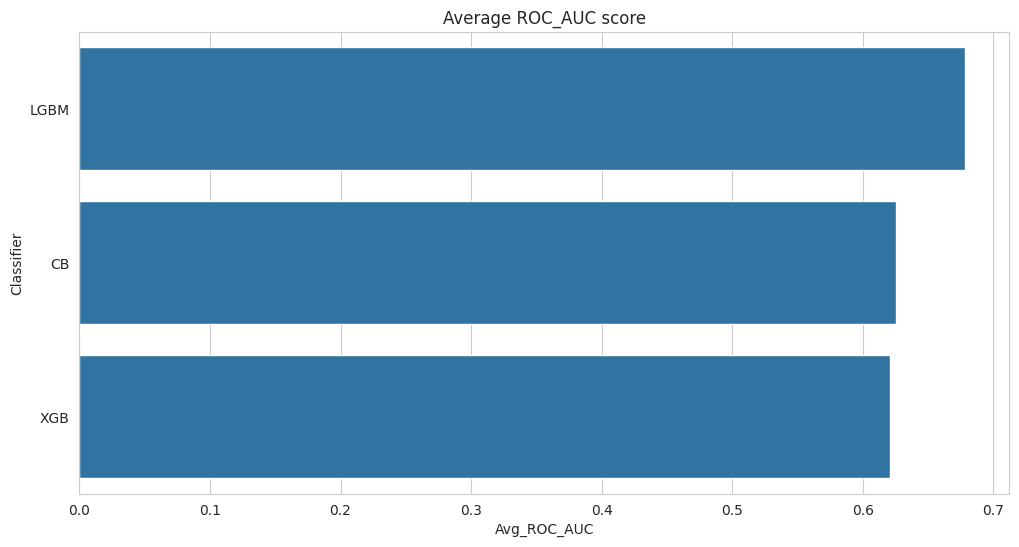

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=results, x="Avg_ROC_AUC", y="Classifier")
plt.title("Average ROC_AUC score")
plt.show()

Видим, что LightGBM справился лучше. Будем использовать его.

### Подбор гиперпараметров

#### Логистическая регрессия

In [ ]:
lr = LogisticRegression(random_state=33, class_weight='balanced')
params = {
    'C': [0.25, 0.5, 0.75],
    'penalty': ['l1'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [250, 500]
}
grid_search = GridSearchCV(estimator=lr, param_grid=params,
                          cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
print("Best parameters:", grid_search.best_params_)
best_lr = grid_search.best_estimator_
cv_scores = cross_val_score(best_lr, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print("Cross-validation AUC scores:", cv_scores)
print("Mean CV AUC:", np.mean(cv_scores))
y_pred_proba = best_lr.predict_proba(X_test_scaled)[:, 1]
test_auc = roc_auc_score(y_test, y_pred_proba)
print("Test AUC:", test_auc)

Best parameters: {'C': 0.5, 'max_iter': 250, 'penalty': 'l1', 'solver': 'liblinear'}
Cross-validation AUC scores: [0.59674283 0.67252066 0.63817149 0.6402376  0.58039216]
Mean CV AUC: 0.6256129476584023
Test AUC: 0.753125


In [ ]:
lr = LogisticRegression(random_state=33, class_weight='balanced')
params = {
    'C': [0.25, 0.5, 0.75],
    'penalty': ['l1'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [250, 500]
}
grid_search = GridSearchCV(estimator=lr, param_grid=params,
                          cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
print("Best parameters:", grid_search.best_params_)
best_lr = grid_search.best_estimator_
cv_scores = cross_val_score(best_lr, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print("Cross-validation AUC scores:", cv_scores)
print("Mean CV AUC:", np.mean(cv_scores))
y_pred_proba = best_lr.predict_proba(X_test_scaled)[:, 1]
test_auc = roc_auc_score(y_test, y_pred_proba)
print("Test AUC:", test_auc)

Best parameters: {'C': 0.5, 'max_iter': 250, 'penalty': 'l1', 'solver': 'liblinear'}
Cross-validation AUC scores: [0.59674283 0.67252066 0.63817149 0.6402376  0.58039216]
Mean CV AUC: 0.6256129476584023
Test AUC: 0.7521381578947369


Best parameters: {'C': 0.5, 'max_iter': 250, 'penalty': 'l1', 'solver': 'liblinear'}
Cross-validation AUC scores: [0.59674283 0.67252066 0.63817149 0.6402376  0.58039216]
Mean CV AUC: 0.6256129476584023
Test AUC: 0.7521381578947369

#### Дерево решений

In [ ]:
dt = DecisionTreeClassifier(random_state=33, class_weight='balanced')
params = {
    'max_depth': [13, 15, 17],
    'min_samples_split': [8, 10, 12],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt', 0.33, 0.67]
}
grid_search = GridSearchCV(estimator=dt, param_grid=params,
                          cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
best_dt = grid_search.best_estimator_
cv_scores = cross_val_score(best_dt, X_train, y_train, cv=5, scoring='roc_auc')
print("Cross-validation AUC scores:", cv_scores)
print("Mean CV AUC:", np.mean(cv_scores))
y_pred_proba = best_dt.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_pred_proba)
print("Test AUC:", test_auc)

Best parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 10}
Cross-validation AUC scores: [0.66942149 0.68853306 0.59142562 0.45945248 0.55784314]
Mean CV AUC: 0.5933351563766003
Test AUC: 0.6756578947368421


Best parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 10}
Cross-validation AUC scores: [0.66942149 0.68853306 0.59142562 0.45945248 0.55784314]
Mean CV AUC: 0.5933351563766003
Test AUC: 0.6756578947368421

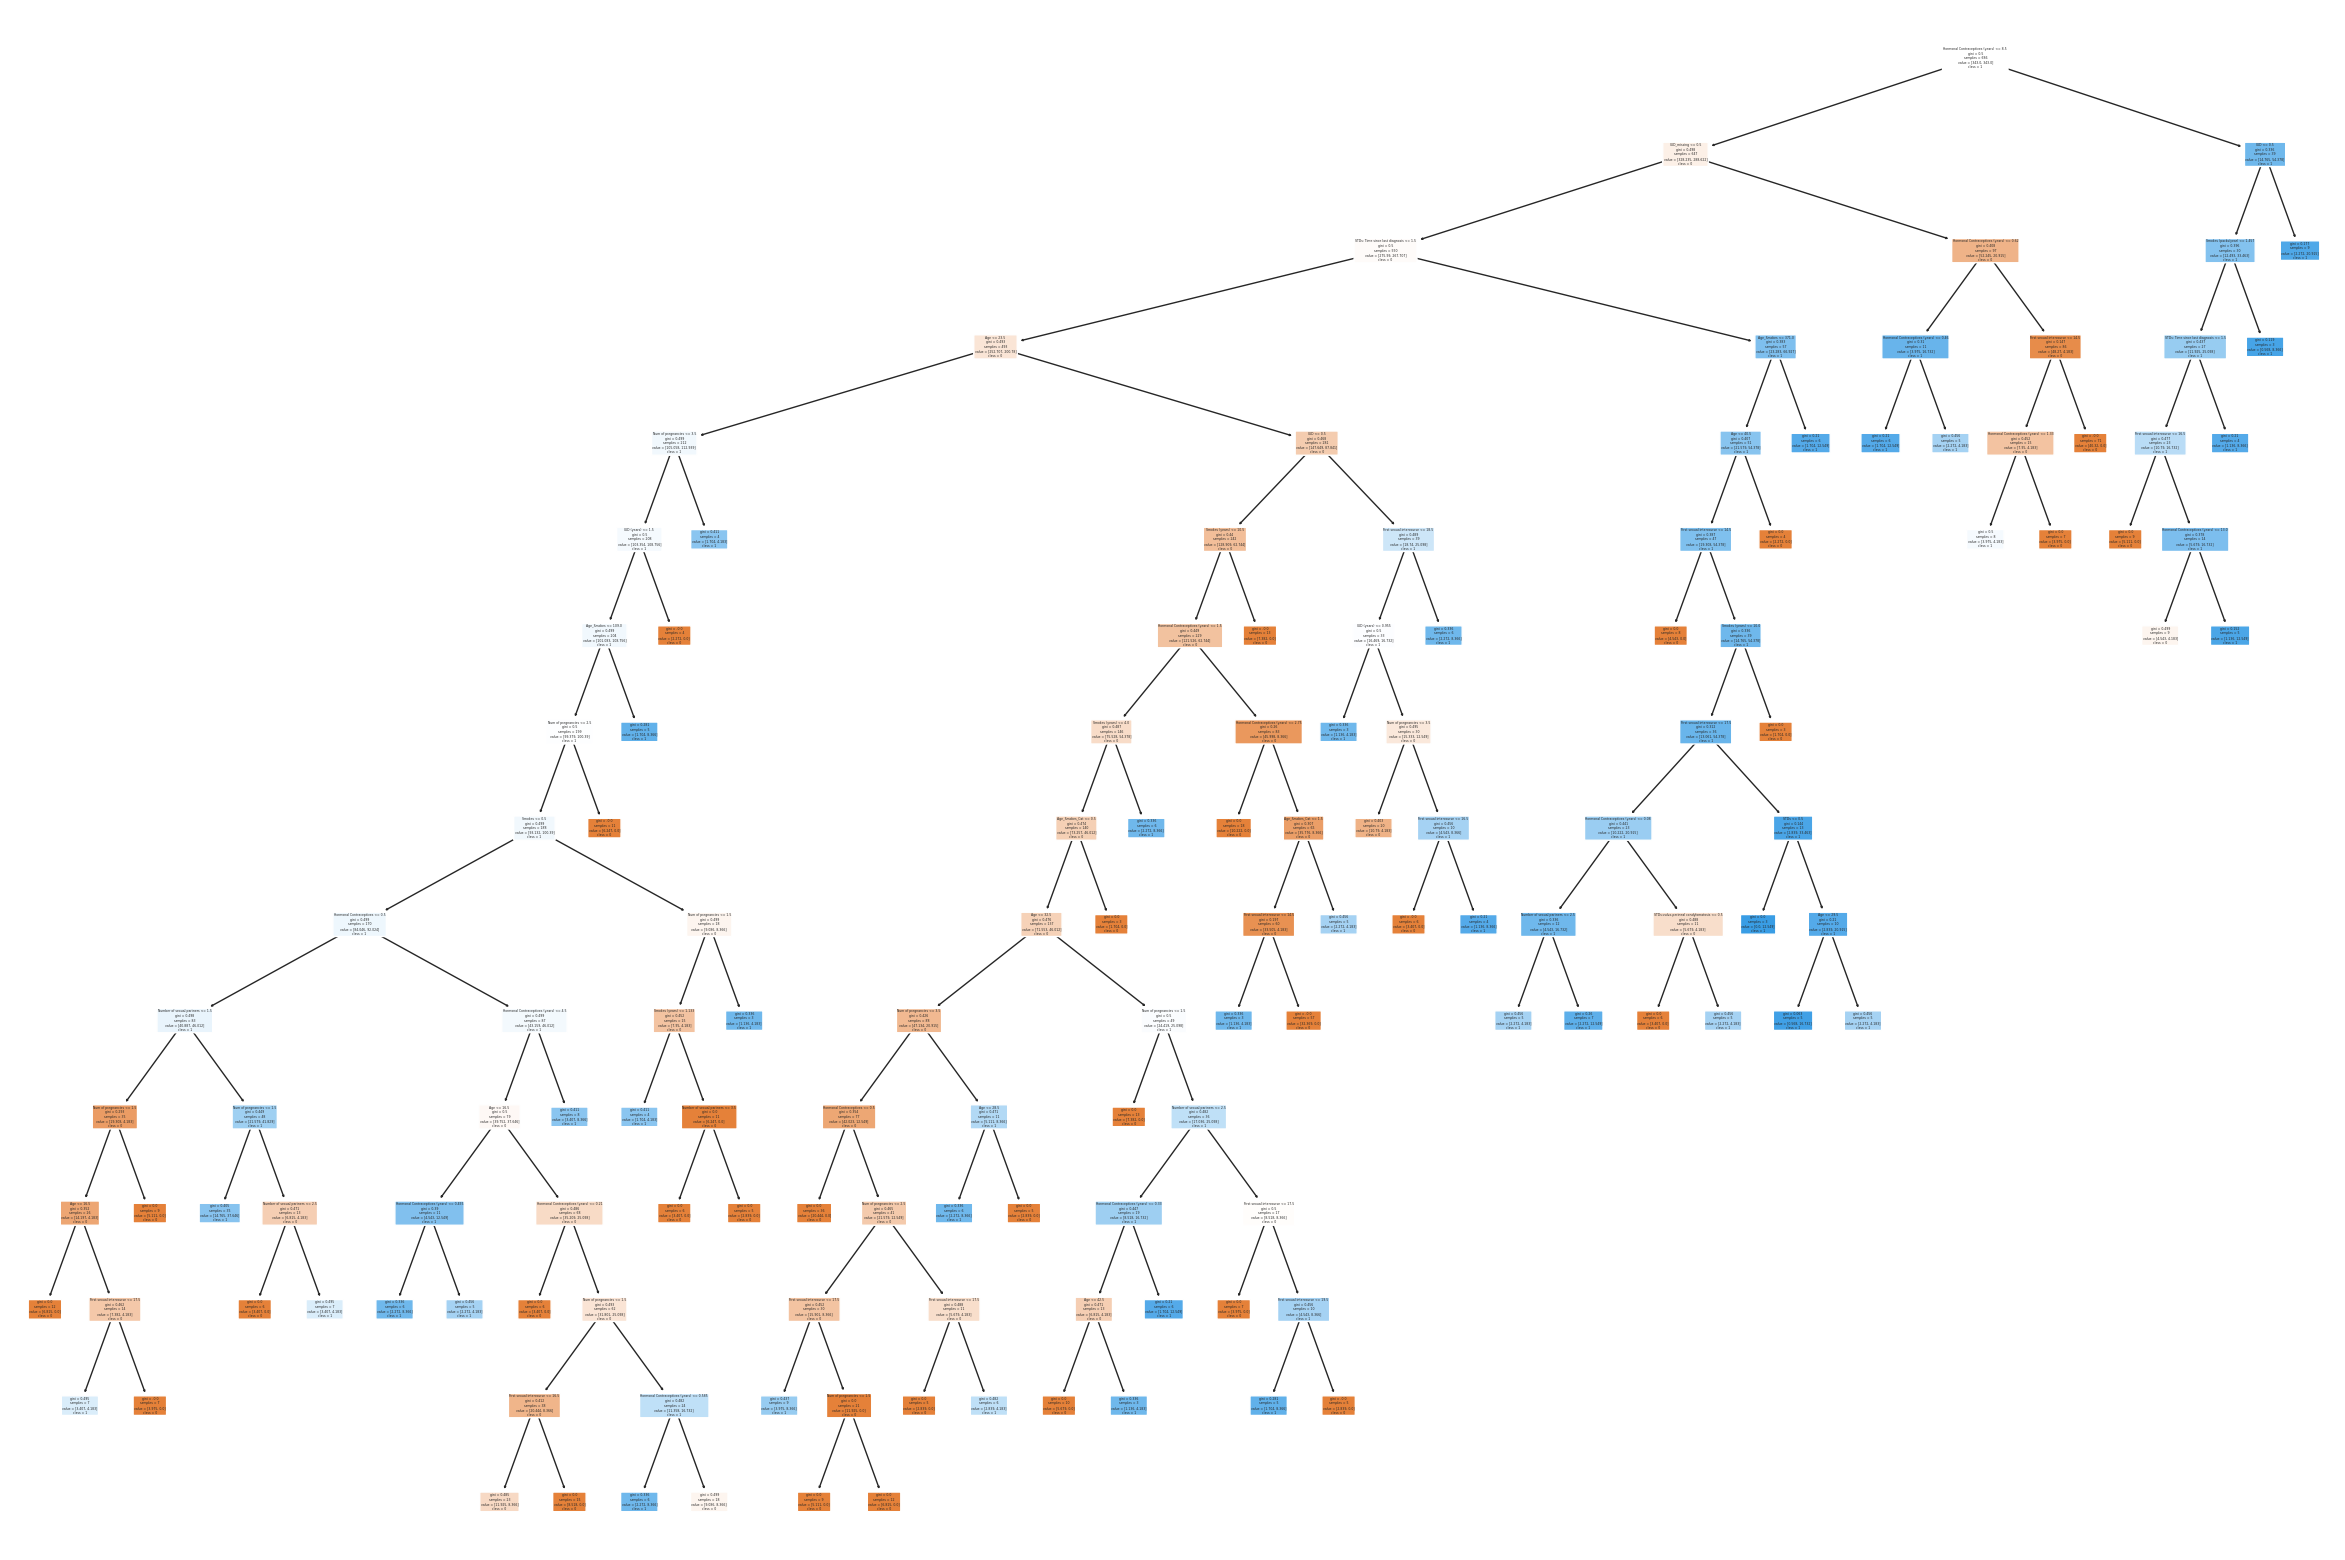

In [ ]:
plt.figure(figsize=(30, 20))
plot_tree(best_dt, feature_names=X.columns,
          class_names=[str(cls) for cls in best_dt.classes_],
          filled=True,
          rounded=True)
plt.show()

#### RandomForest






In [ ]:
rf = RandomForestClassifier(random_state=33, class_weight='balanced')
params = {
    'n_estimators': [75, 101, 125],
    'max_depth': [3, 4, 5],
    'min_samples_split': [10],
    'min_samples_leaf': [6, 9, 14],
    'max_features': [0.17],
}

grid_search = GridSearchCV(estimator=rf, param_grid=params,
                          cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='roc_auc')
print("Cross-validation AUC scores:", cv_scores)
print("Mean CV AUC:", np.mean(cv_scores))
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_pred_proba)
print("Test AUC:", test_auc)

Best parameters: {'max_depth': 3, 'max_features': 0.17, 'min_samples_leaf': 9, 'min_samples_split': 10, 'n_estimators': 101}
Cross-validation AUC scores: [0.63782207 0.69214876 0.67510331 0.66864669 0.65122549]
Mean CV AUC: 0.6649892643007617
Test AUC: 0.7144736842105264


Best parameters: {'max_depth': 3, 'max_features': 0.17, 'min_samples_leaf': 9, 'min_samples_split': 20, 'n_estimators': 101}
Cross-validation AUC scores: [0.63587749 0.69421488 0.67252066 0.66916322 0.65318627]
Mean CV AUC: 0.6649925052665694
Test AUC: 0.7131578947368421

Best parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 0.17, 'min_samples_leaf': 9, 'min_samples_split': 2, 'n_estimators': 101}
Cross-validation AUC scores: [0.63782207 0.69214876 0.67510331 0.66864669 0.65122549]
Mean CV AUC: 0.6649892643007617
Test AUC: 0.7144736842105264

#### LightGBM

In [ ]:
X_train_r = X_train.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '_', x))
X_test_r = X_test.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '_', x))

In [ ]:
X_test_r.shape, X_train_r.shape

((172, 28), (686, 28))

In [ ]:
lgbm = LGBMClassifier(random_state=33, is_unbalance=True)
params = {
    'n_estimators': [33, 39, 79],
    'learning_rate': [0.0001, 0.001, 0.005],
    'max_depth': [2, 3, 5, -1],
    'num_leaves': [23, 25, 38],
    'min_child_samples': [7, 15, 18],
    'subsample': [0.32, 0.65, 0.83],
    'colsample_bytree': [0.45, 0.5, 1],
    'reg_alpha': [0.0001, 0.001, 0.003],
    'reg_lambda': [0.1, 0.5, 0.7]
}

grid_search = RandomizedSearchCV(estimator=lgbm, param_distributions=params,
                          cv=5, scoring='roc_auc', n_iter=10, n_jobs=-1)
grid_search.fit(X_train_r, y_train)
best_lgbm = grid_search.best_estimator_
cv_scores = cross_val_score(best_lgbm, X_train_r, y_train, cv=5, scoring='roc_auc')
print("Cross-validation AUC scores:", cv_scores)
print("Mean CV AUC:", np.mean(cv_scores))
y_pred_proba = best_lgbm.predict_proba(X_test_r)[:, 1]
test_auc = roc_auc_score(y_test, y_pred_proba)
print("Test AUC:", test_auc)
print("Best parameters:", grid_search.best_params_)

[LightGBM] [Info] Number of positive: 82, number of negative: 604
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000297 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 237
[LightGBM] [Info] Number of data points in the train set: 686, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119534 -> initscore=-1.996855
[LightGBM] [Info] Start training from score -1.996855
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Cross-validation AUC scores: [0.67744288 0.67846074 0.69085744 0.65599174 0.57352941]
Mean CV AUC: 0.655256441419543
Test AUC: 0.6848684210526316
Best parameters: {'subsample': 0.32, 'reg_lambda': 0.5, 'reg_alpha': 0.0001, 'num_leaves': 38, 'n_estimators': 39, 'min_child_samples': 18, 'max_depth': 3, 'learning_rate': 0.005, 'colsample_bytree': 0.45}

Cross-validation AUC scores: [0.65775401 0.67639463 0.65134298 0.59891529 0.56813725]
Mean CV AUC: 0.6305088316318264
Test AUC: 0.7067434210526317
Best parameters: {'subsample': 0.6, 'reg_lambda': 0.5, 'reg_alpha': 0, 'num_leaves': 25, 'n_estimators': 25, 'min_child_samples': 20, 'max_depth': 6, 'learning_rate': 0.001, 'colsample_bytree': 0.4}

In [ ]:
lgbm = LGBMClassifier(random_state=33, is_unbalance=True)
# params = {
#     'n_estimators': [31, 41, 51],
#     'learning_rate': [0.003, 0.005, 0.01],
#     'max_depth': [2, 3, 4],
#     'num_leaves': [30, 38, 45],
#     'min_child_samples': [10, 18, 25],
#     'subsample': [0.3, 0.32, 0.35],
#     'colsample_bytree': [0.4, 0.45, 0.5],
#     'reg_alpha': [0.0001, 0.001, 0.01],
#     'reg_lambda': [0.1, 0.5, 1.0]
# }
params = {
    'n_estimators': [15, 31],
    'learning_rate': [0.001, 0.01],
    'max_depth': [2, 3],
    'num_leaves': [15, 30],
    'min_child_samples': [9, 18],
    'subsample': [0.15, 0.3],
    'colsample_bytree': [0.22, 0.45],
    'reg_alpha': [0.01, 0.1],
    'reg_lambda': [0.1, 1]
}

grid_search = GridSearchCV(estimator=lgbm, param_grid=params,
                          cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_r, y_train)
best_lgbm = grid_search.best_estimator_
cv_scores = cross_val_score(best_lgbm, X_train_r, y_train, cv=5, scoring='roc_auc')
print("Cross-validation AUC scores:", cv_scores)
print("Mean CV AUC:", np.mean(cv_scores))
y_pred_proba = best_lgbm.predict_proba(X_test_r)[:, 1]
test_auc = roc_auc_score(y_test, y_pred_proba)
print("Test AUC:", test_auc)
print("Best parameters:", grid_search.best_params_)

[LightGBM] [Info] Number of positive: 82, number of negative: 604
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 237
[LightGBM] [Info] Number of data points in the train set: 686, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119534 -> initscore=-1.996855
[LightGBM] [Info] Start training from score -1.996855
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Cross-validation AUC scores: [0.6728245  0.69344008 0.69266529 0.66503099 0.60759804]
Mean CV AUC: 0.6663117809107113
Test AUC: 0.6758223684210526
Best parameters: {'colsample_bytree': 0.45, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_samples': 18, 'n_estimators': 31, 'num_leaves': 30, 'reg_alpha': 0.01, 'reg_lambda': 0.1, 'subsample': 0.3}

In [ ]:
X_test_r.shape

(172, 28)

In [ ]:
lgbm = LGBMClassifier(random_state=33, is_unbalance=True, objective='binary')
params = {
    'num_leaves': [7, 15, 30],
    'max_depth': [2, 3, 6],
    'learning_rate': [0.001, 0.01, 0.05],
    'n_estimators': [15, 31, 63],
    'min_child_samples': [9, 18, 36],
    'subsample': [0.07, 0.15, 0.3],
    'colsample_bytree': [0.225, 0.45, 0.9],
    'reg_alpha': [0.001, 0.01, 0.1],
    'reg_lambda': [0.01, 0.1, 1]
}

grid_search = GridSearchCV(estimator=lgbm, param_grid=params,
                          cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_r, y_train)
best_lgbm = grid_search.best_estimator_
cv_scores = cross_val_score(best_lgbm, X_train_r, y_train, cv=5, scoring='roc_auc')
print("Cross-validation AUC scores:", cv_scores)
print("Mean CV AUC:", np.mean(cv_scores))
y_pred_proba = best_lgbm.predict_proba(X_test_r)[:, 1]
test_auc = roc_auc_score(y_test, y_pred_proba)
print("Test AUC:", test_auc)
print("Best parameters:", grid_search.best_params_)

[LightGBM] [Info] Number of positive: 82, number of negative: 604
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 237
[LightGBM] [Info] Number of data points in the train set: 686, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119534 -> initscore=-1.996855
[LightGBM] [Info] Start training from score -1.996855
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Cross-validation AUC scores: [0.6728245  0.69344008 0.69266529 0.66503099 0.60759804]
Mean CV AUC: 0.6663117809107113
Test AUC: 0.6758223684210526
Best parameters: {'colsample_bytree': 0.45, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_samples': 18, 'n_estimators': 31, 'num_leaves': 15, 'reg_alpha': 0.01, 'reg_lambda': 0.1, 'subsample': 0.15}

(со всеми признаками) Cross-validation AUC scores: [0.65775401 0.67639463 0.65134298 0.59891529 0.56813725] Mean CV AUC: 0.6305088316318264 Test AUC: 0.7067434210526317 Best parameters: {'subsample': 0.6, 'reg_lambda': 0.5, 'reg_alpha': 0, 'num_leaves': 25, 'n_estimators': 25, 'min_child_samples': 20, 'max_depth': 6, 'learning_rate': 0.001, 'colsample_bytree': 0.4}

In [ ]:
lgbm = LGBMClassifier(random_state=33, is_unbalance=True, objective='binary', importance_type='gain')
params = {
    'num_leaves': [15, 25],
    'max_depth': [3, 6],
    'learning_rate': [0.001, 0.01],
    'n_estimators': [25, 31],
    'min_child_samples': [18, 20],
    'subsample': [0.15, 0.6],
    'colsample_bytree': [0.4, 0.45],
    'reg_alpha': [0, 0.01],
    'reg_lambda': [0.1, 0.5]
}

grid_search = GridSearchCV(estimator=lgbm, param_grid=params,
                          cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_r, y_train)
best_lgbm = grid_search.best_estimator_
cv_scores = cross_val_score(best_lgbm, X_train_r, y_train, cv=5, scoring='roc_auc')
print("Cross-validation AUC scores:", cv_scores)
print("Mean CV AUC:", np.mean(cv_scores))
y_pred_proba = best_lgbm.predict_proba(X_test_r)[:, 1]
test_auc = roc_auc_score(y_test, y_pred_proba)
print("Test AUC:", test_auc)
print("Best parameters:", grid_search.best_params_)

[LightGBM] [Info] Number of positive: 82, number of negative: 604
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 237
[LightGBM] [Info] Number of data points in the train set: 686, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.119534 -> initscore=-1.996855
[LightGBM] [Info] Start training from score -1.996855
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Cross-validation AUC scores: [0.6728245  0.69344008 0.69266529 0.66503099 0.60759804]
Mean CV AUC: 0.6663117809107113
Test AUC: 0.6758223684210526
Best parameters: {'colsample_bytree': 0.45, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_samples': 18, 'n_estimators': 31, 'num_leaves': 15, 'reg_alpha': 0.01, 'reg_lambda': 0.1, 'subsample': 0.15}

# 5. Выявление самых значащих признаков

Стоит посмотреть на важность признаков для логистической регрессии, случайного леса и градиентного бустинга.
Для дерева решений можно пропустить анализ важности признаков, так как модель показывает низкую производительность.

Обучаем модели на всех данных и посмотрим важность признаков

## Логистическая регрессия

In [ ]:
best_lr_params = best_lr.get_params()
best_lr_params

{'C': 0.5,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 250,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': 33,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
lr = LogisticRegression(**best_lr_params)
lr.fit(X_scaled, y)
cv_scores = cross_val_score(lr, X_scaled, y, cv=5, scoring='roc_auc')
print("Cross-validation AUC scores:", cv_scores)
print("Mean CV AUC:", np.mean(cv_scores))

Cross-validation AUC scores: [0.72598684 0.65610218 0.5187638  0.68725166 0.59850993]
Mean CV AUC: 0.6373228808776908


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    uint8  
 1   Number of sexual partners           858 non-null    uint8  
 2   First sexual intercourse            858 non-null    uint8  
 3   Num of pregnancies                  858 non-null    uint8  
 4   Smokes                              858 non-null    uint8  
 5   Smokes (years)                      858 non-null    float32
 6   Smokes (packs/year)                 858 non-null    float32
 7   Hormonal Contraceptives             858 non-null    uint8  
 8   Hormonal Contraceptives (years)     858 non-null    float32
 9   IUD                                 858 non-null    uint8  
 10  IUD (years)                         858 non-null    float32
 11  STDs                                858 non-n

In [ ]:
feature_importance = pd.DataFrame(lr.coef_, columns=X.columns)
feature_importance_series = feature_importance.loc[0].sort_values(ascending=False)
print(feature_importance_series)

Hormonal Contraceptives (years)       1.092748
STDs:HIV                              1.058884
Dx                                    1.046024
Dx:HPV                                0.892974
STDs:vulvo-perineal condylomatosis    0.861383
STDs:genital herpes                   0.536192
Smokes                                0.416585
IUD                                   0.389302
IUD (years)                           0.070561
Age_Smokes_Cat                        0.061082
STDs: Time since last diagnosis       0.050264
STDs: Time since first diagnosis      0.000000
STDs: Number of diagnosis             0.000000
Age_Smokes                            0.000000
Num of pregnancies                    0.000000
Dx:CIN                                0.000000
Dx:Cancer                             0.000000
STDs                                  0.000000
Age                                   0.000000
Smokes (years)                        0.000000
Smokes (packs/year)                   0.000000
STDs:syphilis

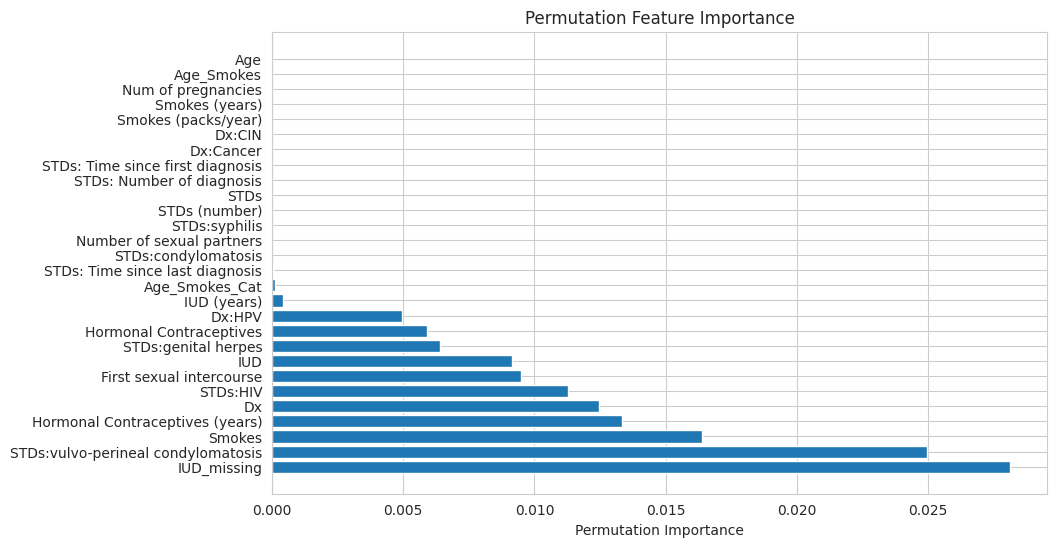

                               Feature  Importance
25                         IUD_missing    0.028119
14  STDs:vulvo-perineal condylomatosis    0.024966
4                               Smokes    0.016386
8      Hormonal Contraceptives (years)    0.013354
24                                  Dx    0.012475
17                            STDs:HIV    0.011261
2             First sexual intercourse    0.009472
9                                  IUD    0.009163
16                 STDs:genital herpes    0.006385
7              Hormonal Contraceptives    0.005899
23                              Dx:HPV    0.004954
10                         IUD (years)    0.000432
27                      Age_Smokes_Cat    0.000122
20     STDs: Time since last diagnosis    0.000045
13                 STDs:condylomatosis    0.000000
1            Number of sexual partners    0.000000
15                       STDs:syphilis    0.000000
12                       STDs (number)    0.000000
11                             

In [ ]:
result = permutation_importance(lr, X_scaled, y, n_repeats=33, random_state=33, n_jobs=-1, scoring='roc_auc')

importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": result.importances_mean
})

importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.xlabel("Permutation Importance")
plt.title("Permutation Feature Importance")
plt.show()

print(importance_df)

## RandomForest

In [ ]:
best_rf_params = best_rf.get_params()
best_rf_params

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 0.17,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 9,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 101,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 33,
 'verbose': 0,
 'warm_start': False}

In [ ]:
X.shape

(858, 28)

In [ ]:
rf = RandomForestClassifier(**best_rf_params)
rf.fit(X, y)
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='roc_auc')
print("Cross-validation AUC scores:", cv_scores)
print("Mean CV AUC:", np.mean(cv_scores))

Cross-validation AUC scores: [0.69342105 0.70671712 0.55329549 0.64966887 0.67168874]
Mean CV AUC: 0.6549582565685738


In [ ]:
importances = rf.feature_importances_
forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
forest_importances

STDs: Time since first diagnosis      0.152417
Hormonal Contraceptives (years)       0.131390
STDs: Time since last diagnosis       0.077532
First sexual intercourse              0.068950
Age                                   0.059903
Dx                                    0.058679
IUD (years)                           0.048831
STDs                                  0.032588
Dx:HPV                                0.032344
IUD_missing                           0.031187
STDs:vulvo-perineal condylomatosis    0.030454
Num of pregnancies                    0.028536
STDs: Number of diagnosis             0.028000
Smokes (packs/year)                   0.027825
Age_Smokes                            0.026990
Smokes (years)                        0.026768
Number of sexual partners             0.025949
STDs (number)                         0.024335
Dx:Cancer                             0.018918
STDs:condylomatosis                   0.014234
IUD                                   0.013213
Smokes                                0.012018
Age_Smokes_Cat                        0.011992
STDs:HIV                              0.010399
Hormonal Contraceptives               0.003626
STDs:syphilis                         0.002924
Dx:CIN                                0.000000
STDs:genital herpes                   0.000000
dtype: float64

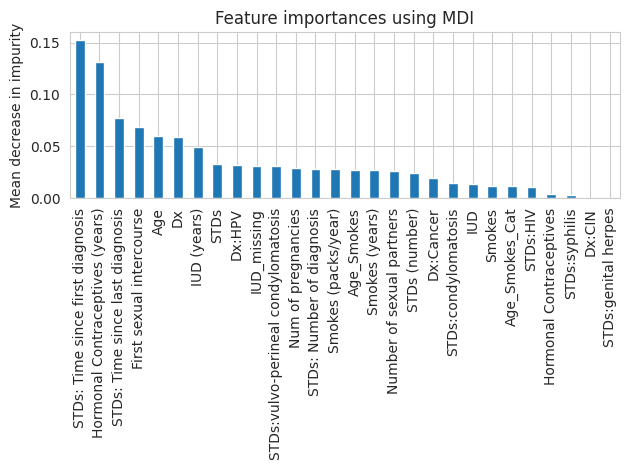

In [ ]:
importances = rf.feature_importances_
# std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

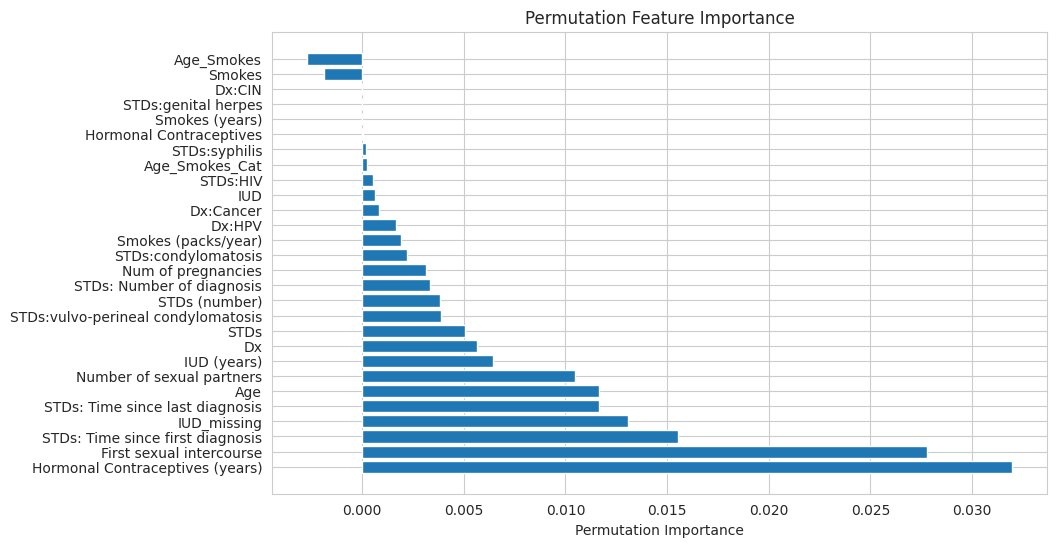

                               Feature  Importance
8      Hormonal Contraceptives (years)    0.031950
2             First sexual intercourse    0.027767
19    STDs: Time since first diagnosis    0.015526
25                         IUD_missing    0.013064
20     STDs: Time since last diagnosis    0.011658
0                                  Age    0.011629
1            Number of sexual partners    0.010463
10                         IUD (years)    0.006452
24                                  Dx    0.005668
11                                STDs    0.005080
14  STDs:vulvo-perineal condylomatosis    0.003883
12                       STDs (number)    0.003822
18           STDs: Number of diagnosis    0.003320
3                   Num of pregnancies    0.003131
13                 STDs:condylomatosis    0.002207
6                  Smokes (packs/year)    0.001926
23                              Dx:HPV    0.001695
21                           Dx:Cancer    0.000852
9                              

In [ ]:
result = permutation_importance(rf, X, y, n_repeats=23, random_state=33, n_jobs=-1, scoring='roc_auc')

importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": result.importances_mean
})

importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.xlabel("Permutation Importance")
plt.title("Permutation Feature Importance")
plt.show()

print(importance_df)

## LightGBM


In [ ]:
best_lgbm_params = best_lgbm.get_params()
best_lgbm_params

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 0.45,
 'importance_type': 'gain',
 'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_samples': 18,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 31,
 'n_jobs': None,
 'num_leaves': 15,
 'objective': 'binary',
 'random_state': 33,
 'reg_alpha': 0.01,
 'reg_lambda': 0.1,
 'subsample': 0.15,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'is_unbalance': True}

In [ ]:
X_r = X.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '_', x))

In [ ]:
X_r.shape

(858, 28)

In [ ]:
lgbm = LGBMClassifier(**best_lgbm_params)
lgbm.fit(X_r, y)
cv_scores = cross_val_score(lgbm, X_r, y, cv=5, scoring='roc_auc')
print("Cross-validation AUC scores:", cv_scores)
print("Mean CV AUC:", np.mean(cv_scores))

[LightGBM] [Info] Number of positive: 102, number of negative: 756
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000317 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 269
[LightGBM] [Info] Number of data points in the train set: 858, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118881 -> initscore=-2.003069
[LightGBM] [Info] Start training from score -2.003069
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

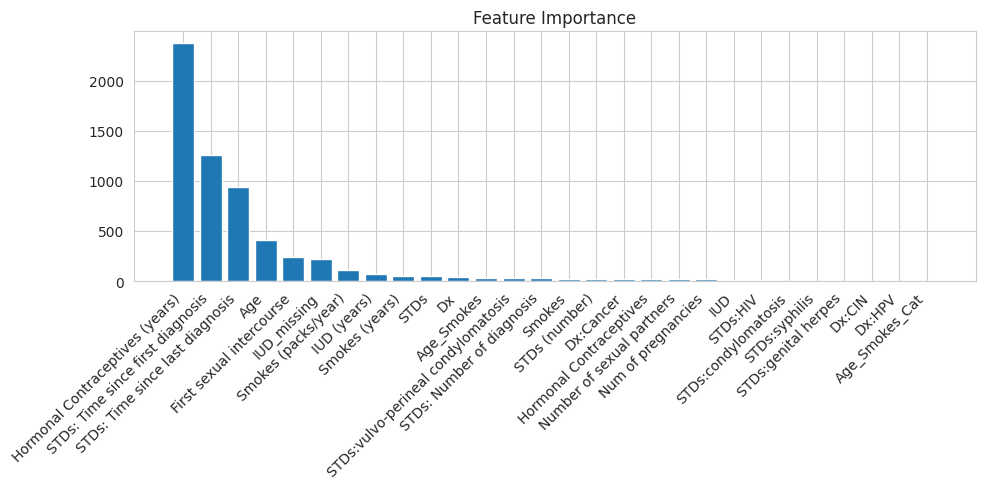

In [ ]:
importances = lgbm.feature_importances_

feature_names = X.columns

feature_imp = pd.DataFrame({'Value': importances, 'Feature': feature_names})

feature_imp = feature_imp.sort_values(by="Value", ascending=False)

plt.figure(figsize=(10, 5))
plt.title("Feature Importance")
plt.bar(feature_imp['Feature'], feature_imp['Value'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
feature_imp

Value                             Feature
8   2377.149955     Hormonal Contraceptives (years)
19  1263.198399    STDs: Time since first diagnosis
20   936.690102     STDs: Time since last diagnosis
0    414.003312                                 Age
2    240.329560            First sexual intercourse
25   218.839699                         IUD_missing
6    105.572001                 Smokes (packs/year)
10    67.254971                         IUD (years)
5     48.972198                      Smokes (years)
11    47.029120                                STDs
24    42.977878                                  Dx
26    35.024359                          Age_Smokes
14    29.453699  STDs:vulvo-perineal condylomatosis
18    27.369861           STDs: Number of diagnosis
4     22.332596                              Smokes
12    22.215200                       STDs (number)
21    21.066350                           Dx:Cancer
7     20.473210             Hormonal Contraceptives
1     18.768618           Number of sexual partners
3     16.697800                  Num of pregnancies
9     11.819300                                 IUD
17    11.111080                            STDs:HIV
13     0.000000                 STDs:condylomatosis
15     0.000000                       STDs:syphilis
16     0.000000                 STDs:genital herpes
22     0.000000                              Dx:CIN
23     0.000000                              Dx:HPV
27     0.000000                      Age_Smokes_Cat

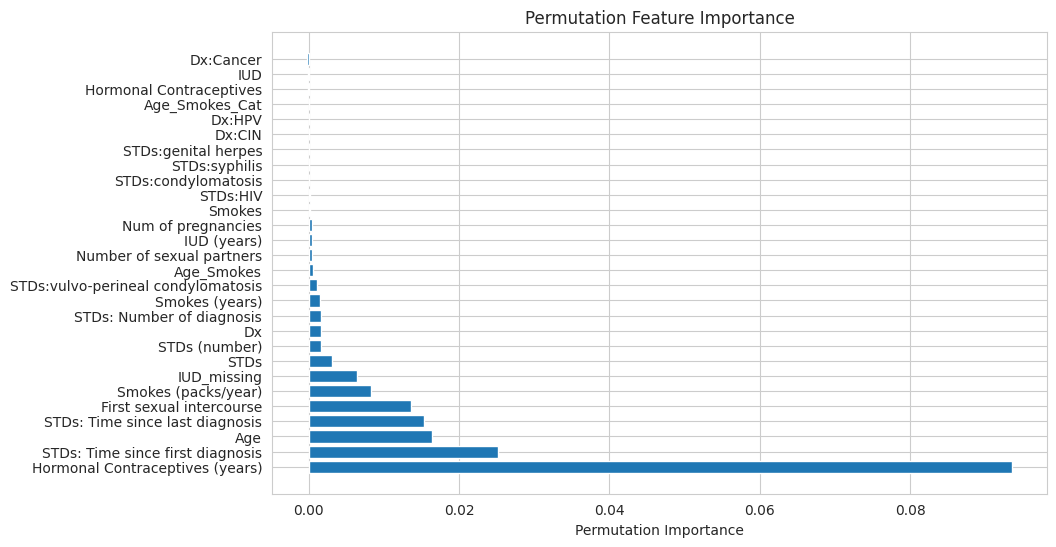

                               Feature  Importance
8      Hormonal Contraceptives (years)    0.093536
19    STDs: Time since first diagnosis    0.025231
0                                  Age    0.016384
20     STDs: Time since last diagnosis    0.015352
2             First sexual intercourse    0.013585
6                  Smokes (packs/year)    0.008306
25                         IUD_missing    0.006453
11                                STDs    0.003101
12                       STDs (number)    0.001679
24                                  Dx    0.001632
18           STDs: Number of diagnosis    0.001612
5                       Smokes (years)    0.001517
14  STDs:vulvo-perineal condylomatosis    0.001069
26                          Age_Smokes    0.000622
1            Number of sexual partners    0.000445
10                         IUD (years)    0.000438
3                   Num of pregnancies    0.000412
4                               Smokes    0.000153
17                            S

In [ ]:
result = permutation_importance(lgbm, X_r, y, n_repeats=16, random_state=33, n_jobs=-1, scoring='roc_auc')

importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": result.importances_mean
})

importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.xlabel("Permutation Importance")
plt.title("Permutation Feature Importance")
plt.show()

print(importance_df)